In [17]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

In [68]:
tf.__version__

'2.0.0'

In [21]:
df = pd.read_excel("data/Churn_Modelling.xlsx")

In [22]:
df = df[['CreditScore', 'Geography','Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']]

In [23]:
Geography_df = pd.get_dummies(df["Geography"], drop_first=True)
Gender_df = pd.get_dummies(df["Gender"], drop_first=True)

In [24]:
df = pd.concat([df,Geography_df,Gender_df], axis=1)

In [25]:
X = df[df.columns.difference(['Exited', 'Gender','Geography'])]
y = df['Exited']

In [26]:
scaler = StandardScaler()
X_trans = scaler.fit_transform(X)

In [27]:
X_trans.shape

(10000, 11)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X_trans, y, test_size=0.2, random_state=0)

In [32]:
def get_model():
    model = Sequential()
    model.add(Dense(6,kernel_initializer = 'uniform', activation = 'relu', input_dim=X_trans.shape[1]))
    model.add(Dropout(0.1))
    model.add(Dense(6,kernel_initializer = 'uniform', activation = 'relu'))
    model.add(Dropout(0.1))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    #model.summary()
    return model

In [33]:
model = get_model()
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 6)                 72        
_________________________________________________________________
dropout_5 (Dropout)          (None, 6)                 0         
_________________________________________________________________
dense_8 (Dense)              (None, 6)                 42        
_________________________________________________________________
dropout_6 (Dropout)          (None, 6)                 0         
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 7         
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


In [34]:
fit_history = model.fit(X_train, y_train, epochs=100, batch_size=10)

Epoch 1/100
8000/8000 [==============================] - 1s 83us/step - loss: 0.4931 - accuracy: 0.7951
Epoch 2/100
8000/8000 [==============================] - 1s 73us/step - loss: 0.4422 - accuracy: 0.7960
Epoch 3/100
8000/8000 [==============================] - 1s 73us/step - loss: 0.4395 - accuracy: 0.7960
Epoch 4/100
8000/8000 [==============================] - 1s 72us/step - loss: 0.4366 - accuracy: 0.7960
Epoch 5/100
8000/8000 [==============================] - 1s 73us/step - loss: 0.4346 - accuracy: 0.7960
Epoch 6/100
8000/8000 [==============================] - 1s 73us/step - loss: 0.4350 - accuracy: 0.7960 0s - loss: 0.4311 - ac
Epoch 7/100
8000/8000 [==============================] - 1s 74us/step - loss: 0.4349 - accuracy: 0.7960
Epoch 8/100
8000/8000 [==============================] - 1s 79us/step - loss: 0.4350 - accuracy: 0.7960
Epoch 9/100
8000/8000 [==============================] - 1s 75us/step - loss: 0.4317 - accuracy: 0.7960
Epoch 10/100
8000/8000 [=================

8000/8000 [==============================] - 1s 80us/step - loss: 0.4270 - accuracy: 0.8144
Epoch 79/100
8000/8000 [==============================] - 1s 77us/step - loss: 0.4269 - accuracy: 0.8253
Epoch 80/100
8000/8000 [==============================] - 1s 77us/step - loss: 0.4252 - accuracy: 0.8221
Epoch 81/100
8000/8000 [==============================] - 1s 77us/step - loss: 0.4341 - accuracy: 0.8196
Epoch 82/100
8000/8000 [==============================] - 1s 82us/step - loss: 0.4276 - accuracy: 0.8205
Epoch 83/100
8000/8000 [==============================] - 1s 87us/step - loss: 0.4250 - accuracy: 0.8231
Epoch 84/100
8000/8000 [==============================] - 1s 78us/step - loss: 0.4284 - accuracy: 0.8227
Epoch 85/100
8000/8000 [==============================] - 1s 78us/step - loss: 0.4280 - accuracy: 0.8248
Epoch 86/100
8000/8000 [==============================] - 1s 82us/step - loss: 0.4304 - accuracy: 0.8229
Epoch 87/100
8000/8000 [==============================] - 1s 97us/st

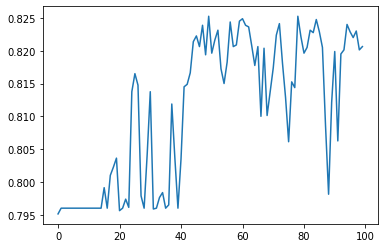

In [35]:
plt.plot(fit_history.history["accuracy"])
#plt.plot(fit_history.history["val_acc"])
plt.show()

In [36]:
y_pred = model.predict_classes(X_test)

In [37]:
y_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

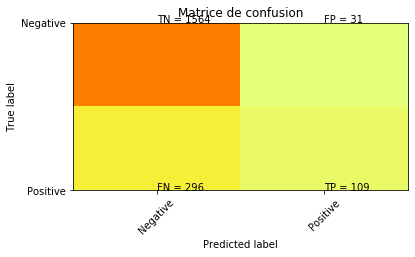

In [38]:
confusio_matrix(y_test, y_pred)

In [19]:
def confusio_matrix(y_test, y_predicted):
  cm = confusion_matrix(y_test, y_predicted)
  plt.clf()
  plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
  classNames = ['Negative','Positive']
  plt.title('Matrice de confusion')
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  tick_marks = np.arange(len(classNames))
  plt.xticks(tick_marks, classNames, rotation=45)
  plt.yticks(tick_marks, classNames)
  s = [['TN','FP'], ['FN', 'TP']]
  
  for i in range(2):
      for j in range(2):
          plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
  plt.show()

In [112]:
def build_classifier(optimizer='adam'):
    classifier = Sequential()
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 11))
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier

In [116]:
classifier = KerasClassifier(build_fn = build_classifier)
parameters = {'batch_size': [25, 32],
              'epochs': [100, 500],
              'optimizer': ['adam', 'rmsprop']}
grid_search = GridSearchCV(estimator = classifier, param_grid = parameters, scoring = 'accuracy', cv = 10)
grid_search = grid_search.fit(X_train, y_train)

Epoch 1/100
7200/7200 [==============================] - 1s 111us/step - loss: 0.5070 - accuracy: 0.8835
Epoch 2/100
7200/7200 [==============================] - 1s 75us/step - loss: 0.0567 - accuracy: 1.0000
Epoch 3/100
7200/7200 [==============================] - 1s 77us/step - loss: 0.0092 - accuracy: 1.0000
Epoch 4/100
7200/7200 [==============================] - 1s 86us/step - loss: 0.0035 - accuracy: 1.0000
Epoch 5/100
7200/7200 [==============================] - 1s 82us/step - loss: 0.0018 - accuracy: 1.0000
Epoch 6/100
7200/7200 [==============================] - 0s 47us/step - loss: 0.0011 - accuracy: 1.0000
Epoch 7/100
7200/7200 [==============================] - 1s 73us/step - loss: 7.3077e-04 - accuracy: 1.0000
Epoch 8/100
7200/7200 [==============================] - 0s 69us/step - loss: 5.0918e-04 - accuracy: 1.0000
Epoch 9/100
7200/7200 [==============================] - 1s 73us/step - loss: 3.6928e-04 - accuracy: 1.0000
Epoch 10/100
7200/7200 [===========================

7200/7200 [==============================] - 1s 75us/step - loss: 2.2806e-07 - accuracy: 1.0000
Epoch 52/100
7200/7200 [==============================] - 1s 74us/step - loss: 1.9650e-07 - accuracy: 1.0000
Epoch 53/100
7200/7200 [==============================] - 1s 75us/step - loss: 1.6881e-07 - accuracy: 1.0000
Epoch 54/100
7200/7200 [==============================] - 1s 75us/step - loss: 1.4396e-07 - accuracy: 1.0000
Epoch 55/100
7200/7200 [==============================] - 1s 70us/step - loss: 1.2170e-07 - accuracy: 1.0000
Epoch 56/100
7200/7200 [==============================] - 1s 70us/step - loss: 1.0188e-07 - accuracy: 1.0000
Epoch 57/100
7200/7200 [==============================] - 1s 79us/step - loss: 8.5372e-08 - accuracy: 1.0000
Epoch 58/100
7200/7200 [==============================] - 1s 77us/step - loss: 7.5032e-08 - accuracy: 1.0000
Epoch 59/100
7200/7200 [==============================] - 1s 77us/step - loss: 6.7536e-08 - accuracy: 1.0000
Epoch 60/100
7200/7200 [========

7200/7200 [==============================] - 1s 108us/step - loss: 0.5670 - accuracy: 0.8253
Epoch 2/100
7200/7200 [==============================] - 1s 70us/step - loss: 0.0944 - accuracy: 1.0000
Epoch 3/100
7200/7200 [==============================] - 1s 71us/step - loss: 0.0144 - accuracy: 1.0000
Epoch 4/100
7200/7200 [==============================] - 1s 74us/step - loss: 0.0053 - accuracy: 1.0000
Epoch 5/100
7200/7200 [==============================] - 1s 75us/step - loss: 0.0027 - accuracy: 1.0000
Epoch 6/100
7200/7200 [==============================] - 1s 75us/step - loss: 0.0016 - accuracy: 1.0000
Epoch 7/100
7200/7200 [==============================] - 1s 73us/step - loss: 0.0011 - accuracy: 1.0000
Epoch 8/100
7200/7200 [==============================] - 1s 71us/step - loss: 7.2782e-04 - accuracy: 1.0000
Epoch 9/100
7200/7200 [==============================] - 1s 71us/step - loss: 5.2389e-04 - accuracy: 1.0000
Epoch 10/100
7200/7200 [==============================] - 1s 70us/s

7200/7200 [==============================] - 0s 54us/step - loss: 3.2440e-04 - accuracy: 1.0000
Epoch 53/100
7200/7200 [==============================] - 0s 40us/step - loss: 2.8800e-04 - accuracy: 1.0000
Epoch 54/100
7200/7200 [==============================] - 1s 74us/step - loss: 2.5570e-04 - accuracy: 1.0000
Epoch 55/100
7200/7200 [==============================] - 0s 61us/step - loss: 2.2702e-04 - accuracy: 1.0000
Epoch 56/100
7200/7200 [==============================] - 0s 63us/step - loss: 2.0156e-04 - accuracy: 1.0000
Epoch 57/100
7200/7200 [==============================] - 1s 73us/step - loss: 1.7894e-04 - accuracy: 1.0000
Epoch 58/100
7200/7200 [==============================] - 0s 62us/step - loss: 1.5886e-04 - accuracy: 1.0000
Epoch 59/100
7200/7200 [==============================] - 0s 54us/step - loss: 1.4104e-04 - accuracy: 1.0000
Epoch 60/100
7200/7200 [==============================] - 1s 75us/step - loss: 1.2523e-04 - accuracy: 1.0000
Epoch 61/100
7200/7200 [========

7200/7200 [==============================] - 1s 71us/step - loss: 0.2864 - accuracy: 1.0000
Epoch 3/100
7200/7200 [==============================] - 1s 71us/step - loss: 0.2093 - accuracy: 1.0000
Epoch 4/100
7200/7200 [==============================] - 1s 69us/step - loss: 0.1663 - accuracy: 1.0000
Epoch 5/100
7200/7200 [==============================] - 1s 72us/step - loss: 0.1353 - accuracy: 1.0000
Epoch 6/100
7200/7200 [==============================] - 1s 71us/step - loss: 0.1117 - accuracy: 1.0000
Epoch 7/100
7200/7200 [==============================] - 1s 73us/step - loss: 0.0933 - accuracy: 1.0000
Epoch 8/100
7200/7200 [==============================] - 1s 74us/step - loss: 0.0786 - accuracy: 1.0000
Epoch 9/100
7200/7200 [==============================] - 1s 77us/step - loss: 0.0668 - accuracy: 1.0000
Epoch 10/100
7200/7200 [==============================] - 1s 73us/step - loss: 0.0570 - accuracy: 1.0000
Epoch 11/100
7200/7200 [==============================] - 1s 71us/step - lo

7200/7200 [==============================] - 1s 73us/step - loss: 8.5017e-08 - accuracy: 1.0000
Epoch 54/100
7200/7200 [==============================] - 1s 73us/step - loss: 7.1753e-08 - accuracy: 1.0000
Epoch 55/100
7200/7200 [==============================] - 1s 73us/step - loss: 6.4297e-08 - accuracy: 1.0000
Epoch 56/100
7200/7200 [==============================] - 1s 73us/step - loss: 5.8540e-08 - accuracy: 1.0000
Epoch 57/100
7200/7200 [==============================] - 1s 72us/step - loss: 5.3680e-08 - accuracy: 1.0000
Epoch 58/100
7200/7200 [==============================] - 1s 75us/step - loss: 4.9573e-08 - accuracy: 1.0000
Epoch 59/100
7200/7200 [==============================] - 0s 69us/step - loss: 4.6103e-08 - accuracy: 1.0000
Epoch 60/100
7200/7200 [==============================] - 0s 45us/step - loss: 4.3150e-08 - accuracy: 1.0000 0s - loss: 4.4106e-08 - accura
Epoch 61/100
7200/7200 [==============================] - 0s 64us/step - loss: 4.0625e-08 - accuracy: 1.0000
E

7200/7200 [==============================] - 1s 71us/step - loss: 0.0048 - accuracy: 1.0000
Epoch 30/100
7200/7200 [==============================] - 1s 71us/step - loss: 0.0042 - accuracy: 1.0000
Epoch 31/100
7200/7200 [==============================] - 1s 71us/step - loss: 0.0037 - accuracy: 1.0000
Epoch 32/100
7200/7200 [==============================] - 1s 71us/step - loss: 0.0033 - accuracy: 1.0000
Epoch 33/100
7200/7200 [==============================] - 1s 71us/step - loss: 0.0029 - accuracy: 1.0000
Epoch 34/100
7200/7200 [==============================] - 1s 72us/step - loss: 0.0026 - accuracy: 1.0000
Epoch 35/100
7200/7200 [==============================] - 1s 77us/step - loss: 0.0023 - accuracy: 1.0000
Epoch 36/100
7200/7200 [==============================] - 1s 76us/step - loss: 0.0020 - accuracy: 1.0000
Epoch 37/100
7200/7200 [==============================] - 1s 74us/step - loss: 0.0018 - accuracy: 1.0000
Epoch 38/100
7200/7200 [==============================] - 1s 72us/st

Epoch 5/100
7200/7200 [==============================] - 1s 72us/step - loss: 0.1434 - accuracy: 1.0000
Epoch 6/100
7200/7200 [==============================] - 1s 73us/step - loss: 0.1187 - accuracy: 1.0000
Epoch 7/100
7200/7200 [==============================] - 1s 72us/step - loss: 0.0992 - accuracy: 1.0000
Epoch 8/100
7200/7200 [==============================] - 1s 72us/step - loss: 0.0837 - accuracy: 1.0000
Epoch 9/100
7200/7200 [==============================] - 1s 73us/step - loss: 0.0711 - accuracy: 1.0000
Epoch 10/100
7200/7200 [==============================] - 1s 75us/step - loss: 0.0608 - accuracy: 1.0000
Epoch 11/100
7200/7200 [==============================] - 1s 75us/step - loss: 0.0522 - accuracy: 1.0000
Epoch 12/100
7200/7200 [==============================] - 1s 76us/step - loss: 0.0451 - accuracy: 1.0000
Epoch 13/100
7200/7200 [==============================] - 1s 75us/step - loss: 0.0391 - accuracy: 1.0000
Epoch 14/100
7200/7200 [==============================] - 0s

7200/7200 [==============================] - ETA: 0s - loss: 1.5361e-07 - accuracy: 1.00 - 1s 70us/step - loss: 1.5262e-07 - accuracy: 1.0000
Epoch 58/100
7200/7200 [==============================] - 0s 26us/step - loss: 1.2886e-07 - accuracy: 1.0000
Epoch 59/100
7200/7200 [==============================] - 0s 61us/step - loss: 1.1117e-07 - accuracy: 1.0000
Epoch 60/100
7200/7200 [==============================] - 0s 66us/step - loss: 9.6387e-08 - accuracy: 1.0000
Epoch 61/100
7200/7200 [==============================] - 0s 68us/step - loss: 8.3517e-08 - accuracy: 1.0000
Epoch 62/100
7200/7200 [==============================] - 0s 69us/step - loss: 7.3573e-08 - accuracy: 1.0000
Epoch 63/100
7200/7200 [==============================] - 0s 38us/step - loss: 6.6798e-08 - accuracy: 1.0000
Epoch 64/100
7200/7200 [==============================] - 0s 69us/step - loss: 6.0715e-08 - accuracy: 1.0000
Epoch 65/100
7200/7200 [==============================] - 1s 70us/step - loss: 5.5172e-08 - acc

7200/7200 [==============================] - 1s 69us/step - loss: 2.1632e-08 - accuracy: 1.0000
Epoch 33/100
7200/7200 [==============================] - 0s 69us/step - loss: 2.1633e-08 - accuracy: 1.0000
Epoch 34/100
7200/7200 [==============================] - 0s 69us/step - loss: 2.1634e-08 - accuracy: 1.0000
Epoch 35/100
7200/7200 [==============================] - 0s 69us/step - loss: 2.1635e-08 - accuracy: 1.0000
Epoch 36/100
7200/7200 [==============================] - 1s 70us/step - loss: 2.1637e-08 - accuracy: 1.0000
Epoch 37/100
7200/7200 [==============================] - 1s 70us/step - loss: 2.1638e-08 - accuracy: 1.0000
Epoch 38/100
7200/7200 [==============================] - 1s 75us/step - loss: 2.1639e-08 - accuracy: 1.0000
Epoch 39/100
7200/7200 [==============================] - 1s 71us/step - loss: 2.1640e-08 - accuracy: 1.0000
Epoch 40/100
7200/7200 [==============================] - 1s 70us/step - loss: 2.1641e-08 - accuracy: 1.0000
Epoch 41/100
7200/7200 [========

7200/7200 [==============================] - 0s 68us/step - loss: 2.4077e-08 - accuracy: 1.0000
Epoch 8/100
7200/7200 [==============================] - 0s 68us/step - loss: 2.3747e-08 - accuracy: 1.0000
Epoch 9/100
7200/7200 [==============================] - 0s 68us/step - loss: 2.3651e-08 - accuracy: 1.0000
Epoch 10/100
7200/7200 [==============================] - 1s 72us/step - loss: 2.3603e-08 - accuracy: 1.0000
Epoch 11/100
7200/7200 [==============================] - 1s 76us/step - loss: 2.3496e-08 - accuracy: 1.0000
Epoch 12/100
7200/7200 [==============================] - 1s 74us/step - loss: 2.3555e-08 - accuracy: 1.0000
Epoch 13/100
7200/7200 [==============================] - 0s 68us/step - loss: 2.3608e-08 - accuracy: 1.0000
Epoch 14/100
7200/7200 [==============================] - 0s 68us/step - loss: 2.3402e-08 - accuracy: 1.0000
Epoch 15/100
7200/7200 [==============================] - 0s 68us/step - loss: 2.3453e-08 - accuracy: 1.0000
Epoch 16/100
7200/7200 [==========

7200/7200 [==============================] - 0s 67us/step - loss: 1.8490e-07 - accuracy: 1.0000
Epoch 58/100
7200/7200 [==============================] - 1s 70us/step - loss: 1.6018e-07 - accuracy: 1.0000
Epoch 59/100
7200/7200 [==============================] - 1s 70us/step - loss: 1.4038e-07 - accuracy: 1.0000
Epoch 60/100
7200/7200 [==============================] - 1s 70us/step - loss: 1.2449e-07 - accuracy: 1.0000
Epoch 61/100
7200/7200 [==============================] - 1s 70us/step - loss: 1.1184e-07 - accuracy: 1.0000
Epoch 62/100
7200/7200 [==============================] - 0s 69us/step - loss: 1.0143e-07 - accuracy: 1.0000
Epoch 63/100
7200/7200 [==============================] - 1s 70us/step - loss: 9.2833e-08 - accuracy: 1.0000
Epoch 64/100
7200/7200 [==============================] - 0s 52us/step - loss: 8.5614e-08 - accuracy: 1.0000
Epoch 65/100
7200/7200 [==============================] - 0s 26us/step - loss: 7.9612e-08 - accuracy: 1.0000
Epoch 66/100
7200/7200 [========

7200/7200 [==============================] - 0s 53us/step - loss: 0.0910 - accuracy: 1.0000
Epoch 8/100
7200/7200 [==============================] - 0s 67us/step - loss: 0.0699 - accuracy: 1.0000
Epoch 9/100
7200/7200 [==============================] - 0s 68us/step - loss: 0.0538 - accuracy: 1.0000
Epoch 10/100
7200/7200 [==============================] - 0s 68us/step - loss: 0.0410 - accuracy: 1.0000
Epoch 11/100
7200/7200 [==============================] - 1s 71us/step - loss: 0.0313 - accuracy: 1.0000
Epoch 12/100
7200/7200 [==============================] - 0s 69us/step - loss: 0.0238 - accuracy: 1.0000
Epoch 13/100
7200/7200 [==============================] - 0s 68us/step - loss: 0.0181 - accuracy: 1.0000
Epoch 14/100
7200/7200 [==============================] - 0s 67us/step - loss: 0.0137 - accuracy: 1.0000
Epoch 15/100
7200/7200 [==============================] - 0s 68us/step - loss: 0.0104 - accuracy: 1.0000
Epoch 16/100
7200/7200 [==============================] - 0s 68us/step

7200/7200 [==============================] - 1s 73us/step - loss: 2.2813e-08 - accuracy: 1.0000
Epoch 58/100
7200/7200 [==============================] - 1s 72us/step - loss: 2.2814e-08 - accuracy: 1.0000
Epoch 59/100
7200/7200 [==============================] - 1s 72us/step - loss: 2.2816e-08 - accuracy: 1.0000
Epoch 60/100
7200/7200 [==============================] - 0s 67us/step - loss: 2.2817e-08 - accuracy: 1.0000
Epoch 61/100
7200/7200 [==============================] - 1s 71us/step - loss: 2.2818e-08 - accuracy: 1.0000
Epoch 62/100
7200/7200 [==============================] - 1s 71us/step - loss: 2.2819e-08 - accuracy: 1.0000
Epoch 63/100
7200/7200 [==============================] - 1s 71us/step - loss: 2.2819e-08 - accuracy: 1.0000
Epoch 64/100
7200/7200 [==============================] - 1s 70us/step - loss: 2.2820e-08 - accuracy: 1.0000
Epoch 65/100
7200/7200 [==============================] - 1s 72us/step - loss: 2.2821e-08 - accuracy: 1.0000
Epoch 66/100
7200/7200 [========

7200/7200 [==============================] - 0s 68us/step - loss: 2.3269e-08 - accuracy: 1.0000
Epoch 8/100
7200/7200 [==============================] - 0s 68us/step - loss: 2.2935e-08 - accuracy: 1.0000
Epoch 9/100
7200/7200 [==============================] - 0s 68us/step - loss: 2.2858e-08 - accuracy: 1.0000
Epoch 10/100
7200/7200 [==============================] - 0s 68us/step - loss: 2.2828e-08 - accuracy: 1.0000
Epoch 11/100
7200/7200 [==============================] - 0s 67us/step - loss: 2.2827e-08 - accuracy: 1.0000
Epoch 12/100
7200/7200 [==============================] - 0s 66us/step - loss: 2.2829e-08 - accuracy: 1.0000
Epoch 13/100
7200/7200 [==============================] - 0s 67us/step - loss: 2.2834e-08 - accuracy: 1.0000
Epoch 14/100
7200/7200 [==============================] - 0s 67us/step - loss: 2.2840e-08 - accuracy: 1.0000
Epoch 15/100
7200/7200 [==============================] - 0s 67us/step - loss: 2.2845e-08 - accuracy: 1.0000
Epoch 16/100
7200/7200 [==========

7200/7200 [==============================] - 0s 59us/step - loss: 2.4763e-08 - accuracy: 1.0000
Epoch 58/100
7200/7200 [==============================] - 1s 70us/step - loss: 2.4778e-08 - accuracy: 1.0000
Epoch 59/100
7200/7200 [==============================] - 0s 68us/step - loss: 2.4792e-08 - accuracy: 1.0000
Epoch 60/100
7200/7200 [==============================] - 1s 76us/step - loss: 2.4806e-08 - accuracy: 1.0000
Epoch 61/100
7200/7200 [==============================] - 1s 75us/step - loss: 2.4820e-08 - accuracy: 1.0000
Epoch 62/100
7200/7200 [==============================] - 0s 68us/step - loss: 2.4834e-08 - accuracy: 1.0000
Epoch 63/100
7200/7200 [==============================] - 1s 72us/step - loss: 2.4848e-08 - accuracy: 1.0000
Epoch 64/100
7200/7200 [==============================] - 0s 53us/step - loss: 2.4861e-08 - accuracy: 1.0000
Epoch 65/100
7200/7200 [==============================] - 0s 52us/step - loss: 2.4874e-08 - accuracy: 1.0000
Epoch 66/100
7200/7200 [========

7200/7200 [==============================] - 1s 76us/step - loss: 4.4454e-07 - accuracy: 1.0000
Epoch 109/500
7200/7200 [==============================] - 1s 76us/step - loss: 4.0022e-07 - accuracy: 1.0000
Epoch 110/500
7200/7200 [==============================] - 1s 76us/step - loss: 3.6079e-07 - accuracy: 1.0000
Epoch 111/500
7200/7200 [==============================] - 1s 77us/step - loss: 3.2572e-07 - accuracy: 1.0000
Epoch 112/500
7200/7200 [==============================] - 1s 78us/step - loss: 2.9467e-07 - accuracy: 1.0000
Epoch 113/500
7200/7200 [==============================] - 1s 75us/step - loss: 2.6691e-07 - accuracy: 1.0000
Epoch 114/500
7200/7200 [==============================] - 1s 81us/step - loss: 2.4218e-07 - accuracy: 1.0000
Epoch 115/500
7200/7200 [==============================] - 1s 73us/step - loss: 2.2061e-07 - accuracy: 1.0000
Epoch 116/500
7200/7200 [==============================] - 1s 76us/step - loss: 2.0119e-07 - accuracy: 1.0000
Epoch 117/500
7200/7200 

7200/7200 [==============================] - 1s 76us/step - loss: 2.7137e-08 - accuracy: 1.0000
Epoch 257/500
7200/7200 [==============================] - 1s 76us/step - loss: 2.7307e-08 - accuracy: 1.0000
Epoch 258/500
7200/7200 [==============================] - 1s 77us/step - loss: 2.7233e-08 - accuracy: 1.0000
Epoch 259/500
7200/7200 [==============================] - 1s 72us/step - loss: 2.7210e-08 - accuracy: 1.0000
Epoch 260/500
7200/7200 [==============================] - 1s 77us/step - loss: 2.7378e-08 - accuracy: 1.0000
Epoch 261/500
7200/7200 [==============================] - 1s 76us/step - loss: 2.7544e-08 - accuracy: 1.0000
Epoch 262/500
7200/7200 [==============================] - 1s 76us/step - loss: 2.7173e-08 - accuracy: 1.0000
Epoch 263/500
7200/7200 [==============================] - 1s 77us/step - loss: 2.7018e-08 - accuracy: 1.0000
Epoch 264/500
7200/7200 [==============================] - 0s 66us/step - loss: 2.7176e-08 - accuracy: 1.0000
Epoch 265/500
7200/7200 

7200/7200 [==============================] - 1s 76us/step - loss: 2.5901e-08 - accuracy: 1.0000
Epoch 405/500
7200/7200 [==============================] - 1s 78us/step - loss: 2.5989e-08 - accuracy: 1.0000
Epoch 406/500
7200/7200 [==============================] - 1s 76us/step - loss: 2.5637e-08 - accuracy: 1.0000
Epoch 407/500
7200/7200 [==============================] - 1s 76us/step - loss: 2.5709e-08 - accuracy: 1.0000
Epoch 408/500
7200/7200 [==============================] - 1s 76us/step - loss: 2.5794e-08 - accuracy: 1.0000
Epoch 409/500
7200/7200 [==============================] - 1s 76us/step - loss: 2.5879e-08 - accuracy: 1.0000
Epoch 410/500
7200/7200 [==============================] - 1s 75us/step - loss: 2.5965e-08 - accuracy: 1.0000
Epoch 411/500
7200/7200 [==============================] - 1s 76us/step - loss: 2.5880e-08 - accuracy: 1.0000
Epoch 412/500
7200/7200 [==============================] - 1s 76us/step - loss: 2.5683e-08 - accuracy: 1.0000
Epoch 413/500
7200/7200 

7200/7200 [==============================] - 0s 69us/step - loss: 2.0465e-07 - accuracy: 1.0000
Epoch 54/500
7200/7200 [==============================] - 1s 70us/step - loss: 1.7238e-07 - accuracy: 1.0000
Epoch 55/500
7200/7200 [==============================] - 1s 71us/step - loss: 1.4827e-07 - accuracy: 1.0000
Epoch 56/500
7200/7200 [==============================] - 1s 71us/step - loss: 1.2984e-07 - accuracy: 1.0000
Epoch 57/500
7200/7200 [==============================] - 1s 71us/step - loss: 1.1427e-07 - accuracy: 1.0000
Epoch 58/500
7200/7200 [==============================] - 1s 71us/step - loss: 1.0104e-07 - accuracy: 1.0000
Epoch 59/500
7200/7200 [==============================] - 1s 71us/step - loss: 8.9791e-08 - accuracy: 1.0000
Epoch 60/500
7200/7200 [==============================] - 1s 70us/step - loss: 8.0203e-08 - accuracy: 1.0000
Epoch 61/500
7200/7200 [==============================] - 1s 71us/step - loss: 7.2048e-08 - accuracy: 1.0000
Epoch 62/500
7200/7200 [========

7200/7200 [==============================] - 1s 74us/step - loss: 2.4550e-08 - accuracy: 1.0000
Epoch 129/500
7200/7200 [==============================] - 1s 74us/step - loss: 2.4586e-08 - accuracy: 1.0000
Epoch 130/500
7200/7200 [==============================] - 1s 73us/step - loss: 2.4620e-08 - accuracy: 1.0000
Epoch 131/500
7200/7200 [==============================] - 1s 74us/step - loss: 2.4654e-08 - accuracy: 1.0000
Epoch 132/500
7200/7200 [==============================] - 1s 74us/step - loss: 2.4687e-08 - accuracy: 1.0000
Epoch 133/500
7200/7200 [==============================] - 1s 73us/step - loss: 2.4719e-08 - accuracy: 1.0000
Epoch 134/500
7200/7200 [==============================] - 0s 55us/step - loss: 2.4750e-08 - accuracy: 1.0000
Epoch 135/500
7200/7200 [==============================] - 1s 74us/step - loss: 2.4782e-08 - accuracy: 1.0000
Epoch 136/500
7200/7200 [==============================] - 1s 74us/step - loss: 2.4739e-08 - accuracy: 1.0000
Epoch 137/500
7200/7200 

7200/7200 [==============================] - 1s 75us/step - loss: 2.4803e-08 - accuracy: 1.0000
Epoch 277/500
7200/7200 [==============================] - 1s 74us/step - loss: 2.4811e-08 - accuracy: 1.0000
Epoch 278/500
7200/7200 [==============================] - 1s 75us/step - loss: 2.4820e-08 - accuracy: 1.0000
Epoch 279/500
7200/7200 [==============================] - 1s 75us/step - loss: 2.4827e-08 - accuracy: 1.0000
Epoch 280/500
7200/7200 [==============================] - 1s 75us/step - loss: 2.4835e-08 - accuracy: 1.0000
Epoch 281/500
7200/7200 [==============================] - 1s 73us/step - loss: 2.4842e-08 - accuracy: 1.0000
Epoch 282/500
7200/7200 [==============================] - 0s 58us/step - loss: 2.4849e-08 - accuracy: 1.0000
Epoch 283/500
7200/7200 [==============================] - 0s 59us/step - loss: 2.4856e-08 - accuracy: 1.0000
Epoch 284/500
7200/7200 [==============================] - 1s 75us/step - loss: 2.4862e-08 - accuracy: 1.0000
Epoch 285/500
7200/7200 

7200/7200 [==============================] - 1s 74us/step - loss: 2.4836e-08 - accuracy: 1.0000
Epoch 425/500
7200/7200 [==============================] - 1s 74us/step - loss: 2.4842e-08 - accuracy: 1.0000
Epoch 426/500
7200/7200 [==============================] - 1s 74us/step - loss: 2.4847e-08 - accuracy: 1.0000
Epoch 427/500
7200/7200 [==============================] - 1s 71us/step - loss: 2.4853e-08 - accuracy: 1.0000
Epoch 428/500
7200/7200 [==============================] - 0s 67us/step - loss: 2.4858e-08 - accuracy: 1.0000
Epoch 429/500
7200/7200 [==============================] - 1s 74us/step - loss: 2.4863e-08 - accuracy: 1.0000
Epoch 430/500
7200/7200 [==============================] - 1s 81us/step - loss: 2.4868e-08 - accuracy: 1.0000
Epoch 431/500
7200/7200 [==============================] - 1s 85us/step - loss: 2.4874e-08 - accuracy: 1.0000
Epoch 432/500
7200/7200 [==============================] - 0s 59us/step - loss: 2.4879e-08 - accuracy: 1.0000
Epoch 433/500
7200/7200 

7200/7200 [==============================] - 1s 75us/step - loss: 2.7471e-08 - accuracy: 1.0000
Epoch 74/500
7200/7200 [==============================] - 0s 65us/step - loss: 2.7022e-08 - accuracy: 1.0000
Epoch 75/500
7200/7200 [==============================] - 0s 50us/step - loss: 2.6632e-08 - accuracy: 1.0000
Epoch 76/500
7200/7200 [==============================] - 0s 40us/step - loss: 2.6318e-08 - accuracy: 1.0000
Epoch 77/500
7200/7200 [==============================] - 0s 34us/step - loss: 2.6012e-08 - accuracy: 1.0000
Epoch 78/500
7200/7200 [==============================] - 0s 33us/step - loss: 2.5782e-08 - accuracy: 1.0000
Epoch 79/500
7200/7200 [==============================] - 0s 33us/step - loss: 2.5555e-08 - accuracy: 1.0000
Epoch 80/500
7200/7200 [==============================] - 0s 51us/step - loss: 2.5389e-08 - accuracy: 1.0000
Epoch 81/500
7200/7200 [==============================] - 0s 58us/step - loss: 2.5281e-08 - accuracy: 1.0000
Epoch 82/500
7200/7200 [========

7200/7200 [==============================] - 1s 75us/step - loss: 2.4717e-08 - accuracy: 1.0000
Epoch 222/500
7200/7200 [==============================] - 1s 75us/step - loss: 2.4722e-08 - accuracy: 1.0000
Epoch 223/500
7200/7200 [==============================] - 1s 75us/step - loss: 2.4727e-08 - accuracy: 1.0000
Epoch 224/500
7200/7200 [==============================] - 1s 74us/step - loss: 2.4732e-08 - accuracy: 1.0000
Epoch 225/500
7200/7200 [==============================] - 1s 71us/step - loss: 2.4737e-08 - accuracy: 1.0000
Epoch 226/500
7200/7200 [==============================] - 1s 76us/step - loss: 2.4741e-08 - accuracy: 1.0000
Epoch 227/500
7200/7200 [==============================] - 1s 77us/step - loss: 2.4746e-08 - accuracy: 1.0000
Epoch 228/500
7200/7200 [==============================] - 1s 77us/step - loss: 2.4751e-08 - accuracy: 1.0000
Epoch 229/500
7200/7200 [==============================] - 1s 76us/step - loss: 2.4755e-08 - accuracy: 1.0000
Epoch 230/500
7200/7200 

7200/7200 [==============================] - 0s 61us/step - loss: 2.4888e-08 - accuracy: 1.0000
Epoch 370/500
7200/7200 [==============================] - 0s 62us/step - loss: 2.4890e-08 - accuracy: 1.0000
Epoch 371/500
7200/7200 [==============================] - 0s 59us/step - loss: 2.4891e-08 - accuracy: 1.0000
Epoch 372/500
7200/7200 [==============================] - 0s 56us/step - loss: 2.4892e-08 - accuracy: 1.0000
Epoch 373/500
7200/7200 [==============================] - 0s 56us/step - loss: 2.4893e-08 - accuracy: 1.0000
Epoch 374/500
7200/7200 [==============================] - 1s 74us/step - loss: 2.4894e-08 - accuracy: 1.0000
Epoch 375/500
7200/7200 [==============================] - 1s 72us/step - loss: 2.4895e-08 - accuracy: 1.0000
Epoch 376/500
7200/7200 [==============================] - 0s 67us/step - loss: 2.4896e-08 - accuracy: 1.0000
Epoch 377/500
7200/7200 [==============================] - 0s 69us/step - loss: 2.4897e-08 - accuracy: 1.0000
Epoch 378/500
7200/7200 

7200/7200 [==============================] - 0s 62us/step - loss: 7.4173e-05 - accuracy: 1.0000
Epoch 18/500
7200/7200 [==============================] - 1s 73us/step - loss: 6.0688e-05 - accuracy: 1.0000
Epoch 19/500
7200/7200 [==============================] - 1s 75us/step - loss: 4.9899e-05 - accuracy: 1.0000
Epoch 20/500
7200/7200 [==============================] - 1s 77us/step - loss: 4.1197e-05 - accuracy: 1.0000
Epoch 21/500
7200/7200 [==============================] - 1s 78us/step - loss: 3.4139e-05 - accuracy: 1.0000
Epoch 22/500
7200/7200 [==============================] - 1s 85us/step - loss: 2.8372e-05 - accuracy: 1.0000
Epoch 23/500
7200/7200 [==============================] - 1s 76us/step - loss: 2.3645e-05 - accuracy: 1.0000
Epoch 24/500
7200/7200 [==============================] - 1s 73us/step - loss: 1.9751e-05 - accuracy: 1.0000
Epoch 25/500
7200/7200 [==============================] - 0s 66us/step - loss: 1.6532e-05 - accuracy: 1.0000
Epoch 26/500
7200/7200 [========

7200/7200 [==============================] - 0s 39us/step - loss: 2.2458e-08 - accuracy: 1.0000
Epoch 167/500
7200/7200 [==============================] - 0s 64us/step - loss: 2.2465e-08 - accuracy: 1.0000
Epoch 168/500
7200/7200 [==============================] - 1s 74us/step - loss: 2.2472e-08 - accuracy: 1.0000
Epoch 169/500
7200/7200 [==============================] - 1s 74us/step - loss: 2.2478e-08 - accuracy: 1.0000
Epoch 170/500
7200/7200 [==============================] - 1s 74us/step - loss: 2.2485e-08 - accuracy: 1.0000
Epoch 171/500
7200/7200 [==============================] - 1s 74us/step - loss: 2.2491e-08 - accuracy: 1.0000
Epoch 172/500
7200/7200 [==============================] - 1s 74us/step - loss: 2.2497e-08 - accuracy: 1.0000
Epoch 173/500
7200/7200 [==============================] - 1s 74us/step - loss: 2.2503e-08 - accuracy: 1.0000
Epoch 174/500
7200/7200 [==============================] - 1s 70us/step - loss: 2.2509e-08 - accuracy: 1.0000
Epoch 175/500
7200/7200 

7200/7200 [==============================] - 1s 76us/step - loss: 2.2449e-08 - accuracy: 1.0000
Epoch 315/500
7200/7200 [==============================] - 1s 75us/step - loss: 2.2451e-08 - accuracy: 1.0000
Epoch 316/500
7200/7200 [==============================] - 1s 75us/step - loss: 2.2454e-08 - accuracy: 1.0000
Epoch 317/500
7200/7200 [==============================] - 1s 71us/step - loss: 2.2457e-08 - accuracy: 1.0000
Epoch 318/500
7200/7200 [==============================] - 1s 72us/step - loss: 2.2459e-08 - accuracy: 1.0000
Epoch 319/500
7200/7200 [==============================] - 1s 73us/step - loss: 2.2462e-08 - accuracy: 1.0000
Epoch 320/500
7200/7200 [==============================] - 1s 74us/step - loss: 2.2464e-08 - accuracy: 1.0000
Epoch 321/500
7200/7200 [==============================] - 1s 73us/step - loss: 2.2467e-08 - accuracy: 1.0000
Epoch 322/500
7200/7200 [==============================] - 1s 74us/step - loss: 2.2469e-08 - accuracy: 1.0000
Epoch 323/500
7200/7200 

7200/7200 [==============================] - 1s 77us/step - loss: 2.2558e-08 - accuracy: 1.0000
Epoch 463/500
7200/7200 [==============================] - 1s 76us/step - loss: 2.2560e-08 - accuracy: 1.0000
Epoch 464/500
7200/7200 [==============================] - 1s 75us/step - loss: 2.2561e-08 - accuracy: 1.0000
Epoch 465/500
7200/7200 [==============================] - 1s 73us/step - loss: 2.2563e-08 - accuracy: 1.0000
Epoch 466/500
7200/7200 [==============================] - 1s 74us/step - loss: 2.2564e-08 - accuracy: 1.0000
Epoch 467/500
7200/7200 [==============================] - 0s 65us/step - loss: 2.2566e-08 - accuracy: 1.0000
Epoch 468/500
7200/7200 [==============================] - 1s 75us/step - loss: 2.2567e-08 - accuracy: 1.0000
Epoch 469/500
7200/7200 [==============================] - 1s 75us/step - loss: 2.2568e-08 - accuracy: 1.0000
Epoch 470/500
7200/7200 [==============================] - 1s 71us/step - loss: 2.2570e-08 - accuracy: 1.0000
Epoch 471/500
7200/7200 

7200/7200 [==============================] - 1s 72us/step - loss: 2.4830e-08 - accuracy: 1.0000
Epoch 113/500
7200/7200 [==============================] - 1s 71us/step - loss: 2.4874e-08 - accuracy: 1.0000
Epoch 114/500
7200/7200 [==============================] - 0s 62us/step - loss: 2.4916e-08 - accuracy: 1.0000
Epoch 115/500
7200/7200 [==============================] - 1s 72us/step - loss: 2.4956e-08 - accuracy: 1.0000
Epoch 116/500
7200/7200 [==============================] - 1s 71us/step - loss: 2.4995e-08 - accuracy: 1.0000
Epoch 117/500
7200/7200 [==============================] - 1s 70us/step - loss: 2.5033e-08 - accuracy: 1.0000
Epoch 118/500
7200/7200 [==============================] - 1s 72us/step - loss: 2.4828e-08 - accuracy: 1.0000
Epoch 119/500
7200/7200 [==============================] - 1s 72us/step - loss: 2.4650e-08 - accuracy: 1.0000
Epoch 120/500
7200/7200 [==============================] - 1s 71us/step - loss: 2.4626e-08 - accuracy: 1.0000
Epoch 121/500
7200/7200 

7200/7200 [==============================] - 1s 74us/step - loss: 2.4662e-08 - accuracy: 1.0000
Epoch 261/500
7200/7200 [==============================] - 1s 73us/step - loss: 2.4668e-08 - accuracy: 1.0000
Epoch 262/500
7200/7200 [==============================] - 1s 74us/step - loss: 2.4674e-08 - accuracy: 1.0000
Epoch 263/500
7200/7200 [==============================] - 1s 75us/step - loss: 2.4679e-08 - accuracy: 1.0000
Epoch 264/500
7200/7200 [==============================] - 1s 74us/step - loss: 2.4685e-08 - accuracy: 1.0000
Epoch 265/500
7200/7200 [==============================] - 1s 75us/step - loss: 2.4691e-08 - accuracy: 1.0000
Epoch 266/500
7200/7200 [==============================] - 1s 76us/step - loss: 2.4696e-08 - accuracy: 1.0000
Epoch 267/500
7200/7200 [==============================] - 1s 75us/step - loss: 2.4702e-08 - accuracy: 1.0000
Epoch 268/500
7200/7200 [==============================] - 1s 74us/step - loss: 2.4708e-08 - accuracy: 1.0000
Epoch 269/500
7200/7200 

7200/7200 [==============================] - 1s 70us/step - loss: 2.4699e-08 - accuracy: 1.0000
Epoch 409/500
7200/7200 [==============================] - 1s 74us/step - loss: 2.4701e-08 - accuracy: 1.0000
Epoch 410/500
7200/7200 [==============================] - 1s 77us/step - loss: 2.4703e-08 - accuracy: 1.0000
Epoch 411/500
7200/7200 [==============================] - 0s 68us/step - loss: 2.4705e-08 - accuracy: 1.0000
Epoch 412/500
7200/7200 [==============================] - 1s 72us/step - loss: 2.4707e-08 - accuracy: 1.0000
Epoch 413/500
7200/7200 [==============================] - 1s 70us/step - loss: 2.4708e-08 - accuracy: 1.0000
Epoch 414/500
7200/7200 [==============================] - 1s 79us/step - loss: 2.4709e-08 - accuracy: 1.0000
Epoch 415/500
7200/7200 [==============================] - 0s 61us/step - loss: 2.4711e-08 - accuracy: 1.0000
Epoch 416/500
7200/7200 [==============================] - 1s 76us/step - loss: 2.4712e-08 - accuracy: 1.0000
Epoch 417/500
7200/7200 

7200/7200 [==============================] - 1s 77us/step - loss: 6.5673e-08 - accuracy: 1.0000
Epoch 58/500
7200/7200 [==============================] - 1s 75us/step - loss: 5.4055e-08 - accuracy: 1.0000
Epoch 59/500
7200/7200 [==============================] - 1s 72us/step - loss: 4.5049e-08 - accuracy: 1.0000
Epoch 60/500
7200/7200 [==============================] - 1s 71us/step - loss: 4.0837e-08 - accuracy: 1.0000
Epoch 61/500
7200/7200 [==============================] - 1s 73us/step - loss: 3.8366e-08 - accuracy: 1.0000
Epoch 62/500
7200/7200 [==============================] - 1s 71us/step - loss: 3.6313e-08 - accuracy: 1.0000
Epoch 63/500
7200/7200 [==============================] - 1s 72us/step - loss: 3.4568e-08 - accuracy: 1.0000
Epoch 64/500
7200/7200 [==============================] - 0s 54us/step - loss: 3.3083e-08 - accuracy: 1.0000
Epoch 65/500
7200/7200 [==============================] - 1s 72us/step - loss: 3.1822e-08 - accuracy: 1.0000
Epoch 66/500
7200/7200 [========

Epoch 132/500
7200/7200 [==============================] - 1s 81us/step - loss: 2.4291e-08 - accuracy: 1.0000
Epoch 133/500
7200/7200 [==============================] - 1s 80us/step - loss: 2.4292e-08 - accuracy: 1.0000
Epoch 134/500
7200/7200 [==============================] - 1s 75us/step - loss: 2.4293e-08 - accuracy: 1.0000
Epoch 135/500
7200/7200 [==============================] - 1s 82us/step - loss: 2.4295e-08 - accuracy: 1.0000
Epoch 136/500
7200/7200 [==============================] - 1s 78us/step - loss: 2.4296e-08 - accuracy: 1.0000
Epoch 137/500
7200/7200 [==============================] - 1s 75us/step - loss: 2.4297e-08 - accuracy: 1.0000
Epoch 138/500
7200/7200 [==============================] - 1s 75us/step - loss: 2.4298e-08 - accuracy: 1.0000
Epoch 139/500
7200/7200 [==============================] - 1s 75us/step - loss: 2.4299e-08 - accuracy: 1.0000
Epoch 140/500
7200/7200 [==============================] - 1s 76us/step - loss: 2.4301e-08 - accuracy: 1.0000
Epoch 141/

7200/7200 [==============================] - 1s 75us/step - loss: 2.4394e-08 - accuracy: 1.0000
Epoch 281/500
7200/7200 [==============================] - 1s 76us/step - loss: 2.4395e-08 - accuracy: 1.0000
Epoch 282/500
7200/7200 [==============================] - 1s 74us/step - loss: 2.4395e-08 - accuracy: 1.0000
Epoch 283/500
7200/7200 [==============================] - 1s 76us/step - loss: 2.4396e-08 - accuracy: 1.0000
Epoch 284/500
7200/7200 [==============================] - 1s 74us/step - loss: 2.4396e-08 - accuracy: 1.0000
Epoch 285/500
7200/7200 [==============================] - 1s 75us/step - loss: 2.4397e-08 - accuracy: 1.0000
Epoch 286/500
7200/7200 [==============================] - 1s 73us/step - loss: 2.4397e-08 - accuracy: 1.0000
Epoch 287/500
7200/7200 [==============================] - 1s 75us/step - loss: 2.4398e-08 - accuracy: 1.0000
Epoch 288/500
7200/7200 [==============================] - 1s 75us/step - loss: 2.4398e-08 - accuracy: 1.0000
Epoch 289/500
7200/7200 

7200/7200 [==============================] - 0s 69us/step - loss: 2.4435e-08 - accuracy: 1.0000
Epoch 429/500
7200/7200 [==============================] - 1s 81us/step - loss: 2.4435e-08 - accuracy: 1.0000
Epoch 430/500
7200/7200 [==============================] - 0s 68us/step - loss: 2.4435e-08 - accuracy: 1.0000
Epoch 431/500
7200/7200 [==============================] - 0s 68us/step - loss: 2.4435e-08 - accuracy: 1.0000
Epoch 432/500
7200/7200 [==============================] - 1s 75us/step - loss: 2.4436e-08 - accuracy: 1.0000
Epoch 433/500
7200/7200 [==============================] - 1s 77us/step - loss: 2.4436e-08 - accuracy: 1.0000
Epoch 434/500
7200/7200 [==============================] - 1s 74us/step - loss: 2.4436e-08 - accuracy: 1.0000
Epoch 435/500
7200/7200 [==============================] - 1s 75us/step - loss: 2.4436e-08 - accuracy: 1.0000
Epoch 436/500
7200/7200 [==============================] - 0s 57us/step - loss: 2.4437e-08 - accuracy: 1.0000
Epoch 437/500
7200/7200 

7200/7200 [==============================] - 1s 72us/step - loss: 1.5258e-08 - accuracy: 1.0000
Epoch 78/500
7200/7200 [==============================] - 0s 68us/step - loss: 1.4935e-08 - accuracy: 1.0000
Epoch 79/500
7200/7200 [==============================] - 0s 68us/step - loss: 1.4551e-08 - accuracy: 1.0000
Epoch 80/500
7200/7200 [==============================] - 1s 70us/step - loss: 1.4242e-08 - accuracy: 1.0000
Epoch 81/500
7200/7200 [==============================] - 1s 73us/step - loss: 1.3948e-08 - accuracy: 1.0000
Epoch 82/500
7200/7200 [==============================] - 1s 70us/step - loss: 1.3717e-08 - accuracy: 1.0000
Epoch 83/500
7200/7200 [==============================] - 1s 71us/step - loss: 1.3488e-08 - accuracy: 1.0000
Epoch 84/500
7200/7200 [==============================] - 0s 68us/step - loss: 1.3225e-08 - accuracy: 1.0000
Epoch 85/500
7200/7200 [==============================] - 1s 73us/step - loss: 1.3101e-08 - accuracy: 1.0000
Epoch 86/500
7200/7200 [========

7200/7200 [==============================] - 0s 68us/step - loss: 1.1300e-08 - accuracy: 1.0000
Epoch 226/500
7200/7200 [==============================] - 1s 76us/step - loss: 1.1306e-08 - accuracy: 1.0000
Epoch 227/500
7200/7200 [==============================] - 1s 83us/step - loss: 1.1311e-08 - accuracy: 1.0000
Epoch 228/500
7200/7200 [==============================] - 1s 81us/step - loss: 1.1317e-08 - accuracy: 1.0000
Epoch 229/500
7200/7200 [==============================] - 1s 73us/step - loss: 1.1322e-08 - accuracy: 1.0000
Epoch 230/500
7200/7200 [==============================] - 1s 72us/step - loss: 1.1328e-08 - accuracy: 1.0000
Epoch 231/500
7200/7200 [==============================] - 0s 66us/step - loss: 1.1334e-08 - accuracy: 1.0000
Epoch 232/500
7200/7200 [==============================] - 1s 74us/step - loss: 1.1339e-08 - accuracy: 1.0000
Epoch 233/500
7200/7200 [==============================] - 1s 84us/step - loss: 1.1345e-08 - accuracy: 1.0000
Epoch 234/500
7200/7200 

7200/7200 [==============================] - 1s 75us/step - loss: 1.1296e-08 - accuracy: 1.0000
Epoch 374/500
7200/7200 [==============================] - 1s 73us/step - loss: 1.1202e-08 - accuracy: 1.0000
Epoch 375/500
7200/7200 [==============================] - 1s 76us/step - loss: 1.1203e-08 - accuracy: 1.0000
Epoch 376/500
7200/7200 [==============================] - 0s 63us/step - loss: 1.1205e-08 - accuracy: 1.0000
Epoch 377/500
7200/7200 [==============================] - 0s 63us/step - loss: 1.1207e-08 - accuracy: 1.0000
Epoch 378/500
7200/7200 [==============================] - 1s 72us/step - loss: 1.1209e-08 - accuracy: 1.0000
Epoch 379/500
7200/7200 [==============================] - 1s 76us/step - loss: 1.1211e-08 - accuracy: 1.0000
Epoch 380/500
7200/7200 [==============================] - 1s 75us/step - loss: 1.1213e-08 - accuracy: 1.0000
Epoch 381/500
7200/7200 [==============================] - 1s 75us/step - loss: 1.1215e-08 - accuracy: 1.0000
Epoch 382/500
7200/7200 

7200/7200 [==============================] - 1s 73us/step - loss: 2.3733e-05 - accuracy: 1.0000
Epoch 23/500
7200/7200 [==============================] - 1s 72us/step - loss: 1.9817e-05 - accuracy: 1.0000
Epoch 24/500
7200/7200 [==============================] - 1s 71us/step - loss: 1.6585e-05 - accuracy: 1.0000
Epoch 25/500
7200/7200 [==============================] - 1s 70us/step - loss: 1.3907e-05 - accuracy: 1.0000
Epoch 26/500
7200/7200 [==============================] - 1s 72us/step - loss: 1.1681e-05 - accuracy: 1.0000
Epoch 27/500
7200/7200 [==============================] - 1s 72us/step - loss: 9.8271e-06 - accuracy: 1.0000
Epoch 28/500
7200/7200 [==============================] - 1s 71us/step - loss: 8.2783e-06 - accuracy: 1.0000
Epoch 29/500
7200/7200 [==============================] - 1s 70us/step - loss: 6.9821e-06 - accuracy: 1.0000
Epoch 30/500
7200/7200 [==============================] - 1s 72us/step - loss: 5.8950e-06 - accuracy: 1.0000
Epoch 31/500
7200/7200 [========

7200/7200 [==============================] - 1s 73us/step - loss: 2.4005e-08 - accuracy: 1.0000
Epoch 172/500
7200/7200 [==============================] - 1s 72us/step - loss: 2.4007e-08 - accuracy: 1.0000
Epoch 173/500
7200/7200 [==============================] - 1s 73us/step - loss: 2.4009e-08 - accuracy: 1.0000
Epoch 174/500
7200/7200 [==============================] - 1s 73us/step - loss: 2.4011e-08 - accuracy: 1.0000
Epoch 175/500
7200/7200 [==============================] - 1s 73us/step - loss: 2.4014e-08 - accuracy: 1.0000
Epoch 176/500
7200/7200 [==============================] - 1s 73us/step - loss: 2.4017e-08 - accuracy: 1.0000
Epoch 177/500
7200/7200 [==============================] - 1s 72us/step - loss: 2.4020e-08 - accuracy: 1.0000
Epoch 178/500
7200/7200 [==============================] - 1s 73us/step - loss: 2.4023e-08 - accuracy: 1.0000
Epoch 179/500
7200/7200 [==============================] - 1s 73us/step - loss: 2.4025e-08 - accuracy: 1.0000
Epoch 180/500
7200/7200 

7200/7200 [==============================] - 1s 74us/step - loss: 2.3861e-08 - accuracy: 1.0000
Epoch 320/500
7200/7200 [==============================] - 1s 74us/step - loss: 2.3862e-08 - accuracy: 1.0000
Epoch 321/500
7200/7200 [==============================] - 1s 74us/step - loss: 2.3863e-08 - accuracy: 1.0000
Epoch 322/500
7200/7200 [==============================] - 1s 74us/step - loss: 2.3865e-08 - accuracy: 1.0000
Epoch 323/500
7200/7200 [==============================] - 1s 74us/step - loss: 2.3866e-08 - accuracy: 1.0000
Epoch 324/500
7200/7200 [==============================] - 1s 74us/step - loss: 2.3867e-08 - accuracy: 1.0000
Epoch 325/500
7200/7200 [==============================] - 1s 74us/step - loss: 2.3868e-08 - accuracy: 1.0000
Epoch 326/500
7200/7200 [==============================] - 1s 75us/step - loss: 2.3870e-08 - accuracy: 1.0000
Epoch 327/500
7200/7200 [==============================] - 1s 74us/step - loss: 2.3871e-08 - accuracy: 1.0000
Epoch 328/500
7200/7200 

7200/7200 [==============================] - 1s 75us/step - loss: 2.3887e-08 - accuracy: 1.0000
Epoch 468/500
7200/7200 [==============================] - 1s 72us/step - loss: 2.3887e-08 - accuracy: 1.0000
Epoch 469/500
7200/7200 [==============================] - 1s 73us/step - loss: 2.3887e-08 - accuracy: 1.0000
Epoch 470/500
7200/7200 [==============================] - 1s 73us/step - loss: 2.3886e-08 - accuracy: 1.0000
Epoch 471/500
7200/7200 [==============================] - 1s 72us/step - loss: 2.3886e-08 - accuracy: 1.0000
Epoch 472/500
7200/7200 [==============================] - 1s 73us/step - loss: 2.3886e-08 - accuracy: 1.0000
Epoch 473/500
7200/7200 [==============================] - 1s 72us/step - loss: 2.3886e-08 - accuracy: 1.0000
Epoch 474/500
7200/7200 [==============================] - 1s 73us/step - loss: 2.3886e-08 - accuracy: 1.0000
Epoch 475/500
7200/7200 [==============================] - 1s 73us/step - loss: 2.3886e-08 - accuracy: 1.0000
Epoch 476/500
7200/7200 

7200/7200 [==============================] - 1s 73us/step - loss: 1.7128e-08 - accuracy: 1.0000
Epoch 118/500
7200/7200 [==============================] - 1s 76us/step - loss: 1.7154e-08 - accuracy: 1.0000
Epoch 119/500
7200/7200 [==============================] - 1s 74us/step - loss: 1.7181e-08 - accuracy: 1.0000
Epoch 120/500
7200/7200 [==============================] - 1s 73us/step - loss: 1.7108e-08 - accuracy: 1.0000
Epoch 121/500
7200/7200 [==============================] - 0s 68us/step - loss: 1.7122e-08 - accuracy: 1.0000
Epoch 122/500
7200/7200 [==============================] - 1s 74us/step - loss: 1.7147e-08 - accuracy: 1.0000
Epoch 123/500
7200/7200 [==============================] - 1s 74us/step - loss: 1.7172e-08 - accuracy: 1.0000
Epoch 124/500
7200/7200 [==============================] - 1s 73us/step - loss: 1.7163e-08 - accuracy: 1.0000
Epoch 125/500
7200/7200 [==============================] - 1s 73us/step - loss: 1.7104e-08 - accuracy: 1.0000
Epoch 126/500
7200/7200 

7200/7200 [==============================] - 1s 73us/step - loss: 1.7069e-08 - accuracy: 1.0000
Epoch 266/500
7200/7200 [==============================] - 1s 74us/step - loss: 1.7074e-08 - accuracy: 1.0000
Epoch 267/500
7200/7200 [==============================] - 1s 71us/step - loss: 1.7079e-08 - accuracy: 1.0000
Epoch 268/500
7200/7200 [==============================] - 1s 74us/step - loss: 1.7084e-08 - accuracy: 1.0000
Epoch 269/500
7200/7200 [==============================] - 1s 76us/step - loss: 1.7089e-08 - accuracy: 1.0000
Epoch 270/500
7200/7200 [==============================] - 0s 64us/step - loss: 1.7094e-08 - accuracy: 1.0000
Epoch 271/500
7200/7200 [==============================] - 1s 74us/step - loss: 1.7099e-08 - accuracy: 1.0000
Epoch 272/500
7200/7200 [==============================] - 1s 72us/step - loss: 1.7104e-08 - accuracy: 1.0000
Epoch 273/500
7200/7200 [==============================] - 1s 73us/step - loss: 1.7109e-08 - accuracy: 1.0000
Epoch 274/500
7200/7200 

7200/7200 [==============================] - 0s 56us/step - loss: 1.7074e-08 - accuracy: 1.0000
Epoch 414/500
7200/7200 [==============================] - 0s 24us/step - loss: 1.7077e-08 - accuracy: 1.0000
Epoch 415/500
7200/7200 [==============================] - 0s 32us/step - loss: 1.7079e-08 - accuracy: 1.0000
Epoch 416/500
7200/7200 [==============================] - 1s 75us/step - loss: 1.7082e-08 - accuracy: 1.0000
Epoch 417/500
7200/7200 [==============================] - 0s 56us/step - loss: 1.7084e-08 - accuracy: 1.0000
Epoch 418/500
7200/7200 [==============================] - 1s 75us/step - loss: 1.7086e-08 - accuracy: 1.0000
Epoch 419/500
7200/7200 [==============================] - 1s 75us/step - loss: 1.7089e-08 - accuracy: 1.0000
Epoch 420/500
7200/7200 [==============================] - 0s 69us/step - loss: 1.7091e-08 - accuracy: 1.0000
Epoch 421/500
7200/7200 [==============================] - 0s 64us/step - loss: 1.7094e-08 - accuracy: 1.0000
Epoch 422/500
7200/7200 

7200/7200 [==============================] - 1s 75us/step - loss: 5.1592e-08 - accuracy: 1.0000
Epoch 63/500
7200/7200 [==============================] - 1s 75us/step - loss: 4.7599e-08 - accuracy: 1.0000
Epoch 64/500
7200/7200 [==============================] - 1s 75us/step - loss: 4.4198e-08 - accuracy: 1.0000
Epoch 65/500
7200/7200 [==============================] - 1s 75us/step - loss: 4.1304e-08 - accuracy: 1.0000
Epoch 66/500
7200/7200 [==============================] - 1s 75us/step - loss: 3.8844e-08 - accuracy: 1.0000
Epoch 67/500
7200/7200 [==============================] - 1s 75us/step - loss: 3.6730e-08 - accuracy: 1.0000
Epoch 68/500
7200/7200 [==============================] - 1s 70us/step - loss: 3.4937e-08 - accuracy: 1.0000
Epoch 69/500
7200/7200 [==============================] - 1s 74us/step - loss: 3.3417e-08 - accuracy: 1.0000
Epoch 70/500
7200/7200 [==============================] - 1s 75us/step - loss: 3.2110e-08 - accuracy: 1.0000
Epoch 71/500
7200/7200 [========

7200/7200 [==============================] - 1s 75us/step - loss: 2.3452e-08 - accuracy: 1.0000
Epoch 211/500
7200/7200 [==============================] - 1s 75us/step - loss: 2.3454e-08 - accuracy: 1.0000
Epoch 212/500
7200/7200 [==============================] - 1s 74us/step - loss: 2.3456e-08 - accuracy: 1.0000
Epoch 213/500
7200/7200 [==============================] - 1s 75us/step - loss: 2.3457e-08 - accuracy: 1.0000
Epoch 214/500
7200/7200 [==============================] - 1s 74us/step - loss: 2.3459e-08 - accuracy: 1.0000
Epoch 215/500
7200/7200 [==============================] - 1s 75us/step - loss: 2.3460e-08 - accuracy: 1.0000
Epoch 216/500
7200/7200 [==============================] - 1s 74us/step - loss: 2.3462e-08 - accuracy: 1.0000
Epoch 217/500
7200/7200 [==============================] - 1s 75us/step - loss: 2.3463e-08 - accuracy: 1.0000
Epoch 218/500
7200/7200 [==============================] - 1s 74us/step - loss: 2.3464e-08 - accuracy: 1.0000
Epoch 219/500
7200/7200 

7200/7200 [==============================] - 1s 74us/step - loss: 2.3589e-08 - accuracy: 1.0000
Epoch 359/500
7200/7200 [==============================] - 1s 74us/step - loss: 2.3590e-08 - accuracy: 1.0000
Epoch 360/500
7200/7200 [==============================] - 1s 75us/step - loss: 2.3591e-08 - accuracy: 1.0000
Epoch 361/500
7200/7200 [==============================] - 1s 74us/step - loss: 2.3592e-08 - accuracy: 1.0000
Epoch 362/500
7200/7200 [==============================] - 1s 75us/step - loss: 2.3593e-08 - accuracy: 1.0000
Epoch 363/500
7200/7200 [==============================] - 1s 75us/step - loss: 2.3594e-08 - accuracy: 1.0000
Epoch 364/500
7200/7200 [==============================] - 1s 74us/step - loss: 2.3595e-08 - accuracy: 1.0000
Epoch 365/500
7200/7200 [==============================] - 1s 74us/step - loss: 2.3596e-08 - accuracy: 1.0000
Epoch 366/500
7200/7200 [==============================] - 1s 74us/step - loss: 2.3597e-08 - accuracy: 1.0000
Epoch 367/500
7200/7200 

7200/7200 [==============================] - 0s 69us/step - loss: 1.3065e-05 - accuracy: 1.0000
Epoch 7/500
7200/7200 [==============================] - 0s 68us/step - loss: 1.5074e-07 - accuracy: 1.0000
Epoch 8/500
7200/7200 [==============================] - 0s 68us/step - loss: 2.9065e-08 - accuracy: 1.0000
Epoch 9/500
7200/7200 [==============================] - 0s 66us/step - loss: 2.6103e-08 - accuracy: 1.0000
Epoch 10/500
7200/7200 [==============================] - 0s 54us/step - loss: 2.5593e-08 - accuracy: 1.0000
Epoch 11/500
7200/7200 [==============================] - 1s 71us/step - loss: 2.5156e-08 - accuracy: 1.0000
Epoch 12/500
7200/7200 [==============================] - 1s 71us/step - loss: 2.5062e-08 - accuracy: 1.0000
Epoch 13/500
7200/7200 [==============================] - 0s 68us/step - loss: 2.5078e-08 - accuracy: 1.0000
Epoch 14/500
7200/7200 [==============================] - 0s 69us/step - loss: 2.5038e-08 - accuracy: 1.0000
Epoch 15/500
7200/7200 [===========

7200/7200 [==============================] - 1s 72us/step - loss: 2.4680e-08 - accuracy: 1.0000
Epoch 156/500
7200/7200 [==============================] - 1s 71us/step - loss: 2.4691e-08 - accuracy: 1.0000
Epoch 157/500
7200/7200 [==============================] - 1s 71us/step - loss: 2.4702e-08 - accuracy: 1.0000
Epoch 158/500
7200/7200 [==============================] - 1s 71us/step - loss: 2.4712e-08 - accuracy: 1.0000
Epoch 159/500
7200/7200 [==============================] - 1s 71us/step - loss: 2.4723e-08 - accuracy: 1.0000
Epoch 160/500
7200/7200 [==============================] - 1s 71us/step - loss: 2.4733e-08 - accuracy: 1.0000
Epoch 161/500
7200/7200 [==============================] - 1s 71us/step - loss: 2.4744e-08 - accuracy: 1.0000
Epoch 162/500
7200/7200 [==============================] - 1s 71us/step - loss: 2.4755e-08 - accuracy: 1.0000
Epoch 163/500
7200/7200 [==============================] - 1s 72us/step - loss: 2.4765e-08 - accuracy: 1.0000
Epoch 164/500
7200/7200 

7200/7200 [==============================] - 1s 71us/step - loss: 2.4793e-08 - accuracy: 1.0000
Epoch 304/500
7200/7200 [==============================] - 1s 72us/step - loss: 2.4798e-08 - accuracy: 1.0000
Epoch 305/500
7200/7200 [==============================] - 1s 72us/step - loss: 2.4804e-08 - accuracy: 1.0000
Epoch 306/500
7200/7200 [==============================] - 1s 72us/step - loss: 2.4809e-08 - accuracy: 1.0000
Epoch 307/500
7200/7200 [==============================] - 1s 73us/step - loss: 2.4815e-08 - accuracy: 1.0000
Epoch 308/500
7200/7200 [==============================] - 1s 73us/step - loss: 2.4820e-08 - accuracy: 1.0000
Epoch 309/500
7200/7200 [==============================] - 0s 67us/step - loss: 2.4598e-08 - accuracy: 1.0000
Epoch 310/500
7200/7200 [==============================] - 1s 73us/step - loss: 2.4503e-08 - accuracy: 1.0000
Epoch 311/500
7200/7200 [==============================] - 1s 70us/step - loss: 2.4508e-08 - accuracy: 1.0000
Epoch 312/500
7200/7200 

7200/7200 [==============================] - 1s 71us/step - loss: 2.4614e-08 - accuracy: 1.0000
Epoch 452/500
7200/7200 [==============================] - 1s 72us/step - loss: 2.4615e-08 - accuracy: 1.0000
Epoch 453/500
7200/7200 [==============================] - 1s 72us/step - loss: 2.4617e-08 - accuracy: 1.0000
Epoch 454/500
7200/7200 [==============================] - 1s 71us/step - loss: 2.4618e-08 - accuracy: 1.0000
Epoch 455/500
7200/7200 [==============================] - 1s 73us/step - loss: 2.4619e-08 - accuracy: 1.0000
Epoch 456/500
7200/7200 [==============================] - 1s 72us/step - loss: 2.4620e-08 - accuracy: 1.0000
Epoch 457/500
7200/7200 [==============================] - 1s 72us/step - loss: 2.4622e-08 - accuracy: 1.0000
Epoch 458/500
7200/7200 [==============================] - 1s 72us/step - loss: 2.4623e-08 - accuracy: 1.0000
Epoch 459/500
7200/7200 [==============================] - 1s 72us/step - loss: 2.4625e-08 - accuracy: 1.0000
Epoch 460/500
7200/7200 

7200/7200 [==============================] - 1s 70us/step - loss: 2.3646e-08 - accuracy: 1.0000
Epoch 27/500
7200/7200 [==============================] - 1s 73us/step - loss: 2.3674e-08 - accuracy: 1.0000
Epoch 28/500
7200/7200 [==============================] - 1s 70us/step - loss: 2.3701e-08 - accuracy: 1.0000
Epoch 29/500
7200/7200 [==============================] - 0s 69us/step - loss: 2.3667e-08 - accuracy: 1.0000
Epoch 30/500
7200/7200 [==============================] - 1s 70us/step - loss: 2.3464e-08 - accuracy: 1.0000
Epoch 31/500
7200/7200 [==============================] - 1s 71us/step - loss: 2.3488e-08 - accuracy: 1.0000
Epoch 32/500
7200/7200 [==============================] - 1s 70us/step - loss: 2.3511e-08 - accuracy: 1.0000
Epoch 33/500
7200/7200 [==============================] - 0s 69us/step - loss: 2.3533e-08 - accuracy: 1.0000
Epoch 34/500
7200/7200 [==============================] - 1s 70us/step - loss: 2.3555e-08 - accuracy: 1.0000
Epoch 35/500
7200/7200 [========

7200/7200 [==============================] - 0s 68us/step - loss: 2.4149e-08 - accuracy: 1.0000
Epoch 176/500
7200/7200 [==============================] - 1s 74us/step - loss: 2.4153e-08 - accuracy: 1.0000
Epoch 177/500
7200/7200 [==============================] - 0s 56us/step - loss: 2.4157e-08 - accuracy: 1.0000
Epoch 178/500
7200/7200 [==============================] - 1s 71us/step - loss: 2.4162e-08 - accuracy: 1.0000
Epoch 179/500
7200/7200 [==============================] - 1s 70us/step - loss: 2.4166e-08 - accuracy: 1.0000
Epoch 180/500
7200/7200 [==============================] - 0s 69us/step - loss: 2.4169e-08 - accuracy: 1.0000
Epoch 181/500
7200/7200 [==============================] - 0s 69us/step - loss: 2.4173e-08 - accuracy: 1.0000
Epoch 182/500
7200/7200 [==============================] - 0s 67us/step - loss: 2.4176e-08 - accuracy: 1.0000
Epoch 183/500
7200/7200 [==============================] - 0s 67us/step - loss: 2.4180e-08 - accuracy: 1.0000
Epoch 184/500
7200/7200 

7200/7200 [==============================] - 0s 55us/step - loss: 2.4274e-08 - accuracy: 1.0000
Epoch 324/500
7200/7200 [==============================] - 1s 72us/step - loss: 2.4276e-08 - accuracy: 1.0000
Epoch 325/500
7200/7200 [==============================] - 0s 62us/step - loss: 2.4279e-08 - accuracy: 1.0000
Epoch 326/500
7200/7200 [==============================] - 1s 73us/step - loss: 2.4281e-08 - accuracy: 1.0000
Epoch 327/500
7200/7200 [==============================] - 1s 74us/step - loss: 2.4283e-08 - accuracy: 1.0000
Epoch 328/500
7200/7200 [==============================] - 1s 74us/step - loss: 2.4285e-08 - accuracy: 1.0000
Epoch 329/500
7200/7200 [==============================] - 1s 73us/step - loss: 2.4288e-08 - accuracy: 1.0000
Epoch 330/500
7200/7200 [==============================] - 1s 73us/step - loss: 2.4290e-08 - accuracy: 1.0000
Epoch 331/500
7200/7200 [==============================] - 1s 73us/step - loss: 2.4292e-08 - accuracy: 1.0000
Epoch 332/500
7200/7200 

7200/7200 [==============================] - 1s 73us/step - loss: 2.4254e-08 - accuracy: 1.0000
Epoch 472/500
7200/7200 [==============================] - 1s 72us/step - loss: 2.4256e-08 - accuracy: 1.0000
Epoch 473/500
7200/7200 [==============================] - 1s 72us/step - loss: 2.4258e-08 - accuracy: 1.0000
Epoch 474/500
7200/7200 [==============================] - 0s 69us/step - loss: 2.4260e-08 - accuracy: 1.0000
Epoch 475/500
7200/7200 [==============================] - 1s 72us/step - loss: 2.4262e-08 - accuracy: 1.0000
Epoch 476/500
7200/7200 [==============================] - 1s 72us/step - loss: 2.4265e-08 - accuracy: 1.0000
Epoch 477/500
7200/7200 [==============================] - 1s 72us/step - loss: 2.4267e-08 - accuracy: 1.0000
Epoch 478/500
7200/7200 [==============================] - 1s 72us/step - loss: 2.4269e-08 - accuracy: 1.0000
Epoch 479/500
7200/7200 [==============================] - 1s 72us/step - loss: 2.4271e-08 - accuracy: 1.0000
Epoch 480/500
7200/7200 

7200/7200 [==============================] - 1s 71us/step - loss: 2.4649e-08 - accuracy: 1.0000
Epoch 121/500
7200/7200 [==============================] - 1s 70us/step - loss: 2.4662e-08 - accuracy: 1.0000
Epoch 122/500
7200/7200 [==============================] - 1s 72us/step - loss: 2.4675e-08 - accuracy: 1.0000
Epoch 123/500
7200/7200 [==============================] - 1s 71us/step - loss: 2.4688e-08 - accuracy: 1.0000
Epoch 124/500
7200/7200 [==============================] - 1s 72us/step - loss: 2.4701e-08 - accuracy: 1.0000
Epoch 125/500
7200/7200 [==============================] - 1s 73us/step - loss: 2.4714e-08 - accuracy: 1.0000
Epoch 126/500
7200/7200 [==============================] - 1s 74us/step - loss: 2.4727e-08 - accuracy: 1.0000
Epoch 127/500
7200/7200 [==============================] - 1s 71us/step - loss: 2.4739e-08 - accuracy: 1.0000
Epoch 128/500
7200/7200 [==============================] - 1s 71us/step - loss: 2.4751e-08 - accuracy: 1.0000
Epoch 129/500
7200/7200 

7200/7200 [==============================] - 1s 74us/step - loss: 2.4473e-08 - accuracy: 1.0000
Epoch 269/500
7200/7200 [==============================] - 1s 74us/step - loss: 2.4478e-08 - accuracy: 1.0000
Epoch 270/500
7200/7200 [==============================] - 1s 73us/step - loss: 2.4484e-08 - accuracy: 1.0000
Epoch 271/500
7200/7200 [==============================] - 1s 74us/step - loss: 2.4490e-08 - accuracy: 1.0000
Epoch 272/500
7200/7200 [==============================] - 1s 74us/step - loss: 2.4496e-08 - accuracy: 1.0000
Epoch 273/500
7200/7200 [==============================] - 1s 77us/step - loss: 2.4502e-08 - accuracy: 1.0000
Epoch 274/500
7200/7200 [==============================] - 1s 79us/step - loss: 2.4508e-08 - accuracy: 1.0000
Epoch 275/500
7200/7200 [==============================] - 1s 79us/step - loss: 2.4514e-08 - accuracy: 1.0000
Epoch 276/500
7200/7200 [==============================] - 1s 74us/step - loss: 2.4520e-08 - accuracy: 1.0000
Epoch 277/500
7200/7200 

7200/7200 [==============================] - 1s 74us/step - loss: 2.4804e-08 - accuracy: 1.0000
Epoch 417/500
7200/7200 [==============================] - 1s 74us/step - loss: 2.4808e-08 - accuracy: 1.0000
Epoch 418/500
7200/7200 [==============================] - 1s 73us/step - loss: 2.4811e-08 - accuracy: 1.0000
Epoch 419/500
7200/7200 [==============================] - 1s 73us/step - loss: 2.4815e-08 - accuracy: 1.0000
Epoch 420/500
7200/7200 [==============================] - 1s 73us/step - loss: 2.4818e-08 - accuracy: 1.0000
Epoch 421/500
7200/7200 [==============================] - 1s 79us/step - loss: 2.4822e-08 - accuracy: 1.0000
Epoch 422/500
7200/7200 [==============================] - 1s 75us/step - loss: 2.4826e-08 - accuracy: 1.0000
Epoch 423/500
7200/7200 [==============================] - 1s 76us/step - loss: 2.4829e-08 - accuracy: 1.0000
Epoch 424/500
7200/7200 [==============================] - 1s 75us/step - loss: 2.4832e-08 - accuracy: 1.0000
Epoch 425/500
7200/7200 

7200/7200 [==============================] - 1s 73us/step - loss: 2.2384e-08 - accuracy: 1.0000
Epoch 66/500
7200/7200 [==============================] - 1s 75us/step - loss: 2.2384e-08 - accuracy: 1.0000
Epoch 67/500
7200/7200 [==============================] - 1s 71us/step - loss: 2.2385e-08 - accuracy: 1.0000
Epoch 68/500
7200/7200 [==============================] - 1s 72us/step - loss: 2.2386e-08 - accuracy: 1.0000
Epoch 69/500
7200/7200 [==============================] - 1s 71us/step - loss: 2.2387e-08 - accuracy: 1.0000
Epoch 70/500
7200/7200 [==============================] - 1s 73us/step - loss: 2.2388e-08 - accuracy: 1.0000
Epoch 71/500
7200/7200 [==============================] - 1s 71us/step - loss: 2.2389e-08 - accuracy: 1.0000
Epoch 72/500
7200/7200 [==============================] - 1s 71us/step - loss: 2.2389e-08 - accuracy: 1.0000
Epoch 73/500
7200/7200 [==============================] - 1s 80us/step - loss: 2.2390e-08 - accuracy: 1.0000
Epoch 74/500
7200/7200 [========

7200/7200 [==============================] - 1s 72us/step - loss: 2.2458e-08 - accuracy: 1.0000
Epoch 214/500
7200/7200 [==============================] - 1s 71us/step - loss: 2.2458e-08 - accuracy: 1.0000
Epoch 215/500
7200/7200 [==============================] - 1s 74us/step - loss: 2.2458e-08 - accuracy: 1.0000
Epoch 216/500
7200/7200 [==============================] - 1s 76us/step - loss: 2.2459e-08 - accuracy: 1.0000
Epoch 217/500
7200/7200 [==============================] - 1s 71us/step - loss: 2.2459e-08 - accuracy: 1.0000
Epoch 218/500
7200/7200 [==============================] - 1s 73us/step - loss: 2.2459e-08 - accuracy: 1.0000
Epoch 219/500
7200/7200 [==============================] - 1s 73us/step - loss: 2.2460e-08 - accuracy: 1.0000
Epoch 220/500
7200/7200 [==============================] - 1s 73us/step - loss: 2.2460e-08 - accuracy: 1.0000
Epoch 221/500
7200/7200 [==============================] - 0s 69us/step - loss: 2.2460e-08 - accuracy: 1.0000
Epoch 222/500
7200/7200 

7200/7200 [==============================] - 1s 73us/step - loss: 2.2500e-08 - accuracy: 1.0000
Epoch 362/500
7200/7200 [==============================] - 1s 73us/step - loss: 2.2500e-08 - accuracy: 1.0000
Epoch 363/500
7200/7200 [==============================] - 1s 72us/step - loss: 2.2501e-08 - accuracy: 1.0000
Epoch 364/500
7200/7200 [==============================] - 1s 73us/step - loss: 2.2501e-08 - accuracy: 1.0000
Epoch 365/500
7200/7200 [==============================] - 1s 72us/step - loss: 2.2501e-08 - accuracy: 1.0000
Epoch 366/500
7200/7200 [==============================] - 1s 73us/step - loss: 2.2501e-08 - accuracy: 1.0000
Epoch 367/500
7200/7200 [==============================] - 1s 72us/step - loss: 2.2501e-08 - accuracy: 1.0000
Epoch 368/500
7200/7200 [==============================] - 1s 73us/step - loss: 2.2501e-08 - accuracy: 1.0000
Epoch 369/500
7200/7200 [==============================] - 1s 75us/step - loss: 2.2502e-08 - accuracy: 1.0000
Epoch 370/500
7200/7200 

7200/7200 [==============================] - 0s 47us/step - loss: 0.0503 - accuracy: 1.0000
Epoch 10/500
7200/7200 [==============================] - 0s 28us/step - loss: 0.0386 - accuracy: 1.0000
Epoch 11/500
7200/7200 [==============================] - 0s 43us/step - loss: 0.0295 - accuracy: 1.0000
Epoch 12/500
7200/7200 [==============================] - 0s 69us/step - loss: 0.0225 - accuracy: 1.0000
Epoch 13/500
7200/7200 [==============================] - 0s 51us/step - loss: 0.0171 - accuracy: 1.0000
Epoch 14/500
7200/7200 [==============================] - 0s 46us/step - loss: 0.0130 - accuracy: 1.0000
Epoch 15/500
7200/7200 [==============================] - 1s 70us/step - loss: 0.0099 - accuracy: 1.0000
Epoch 16/500
7200/7200 [==============================] - 1s 70us/step - loss: 0.0075 - accuracy: 1.0000
Epoch 17/500
7200/7200 [==============================] - 1s 70us/step - loss: 0.0057 - accuracy: 1.0000
Epoch 18/500
7200/7200 [==============================] - 1s 71us/st

7200/7200 [==============================] - 1s 73us/step - loss: 2.8412e-08 - accuracy: 1.0000
Epoch 159/500
7200/7200 [==============================] - 1s 73us/step - loss: 2.8484e-08 - accuracy: 1.0000
Epoch 160/500
7200/7200 [==============================] - 1s 74us/step - loss: 2.8330e-08 - accuracy: 1.0000
Epoch 161/500
7200/7200 [==============================] - 1s 73us/step - loss: 2.8245e-08 - accuracy: 1.0000
Epoch 162/500
7200/7200 [==============================] - 1s 73us/step - loss: 2.8157e-08 - accuracy: 1.0000
Epoch 163/500
7200/7200 [==============================] - 1s 74us/step - loss: 2.8370e-08 - accuracy: 1.0000
Epoch 164/500
7200/7200 [==============================] - 1s 73us/step - loss: 2.8399e-08 - accuracy: 1.0000
Epoch 165/500
7200/7200 [==============================] - 1s 78us/step - loss: 2.8162e-08 - accuracy: 1.0000
Epoch 166/500
7200/7200 [==============================] - 1s 74us/step - loss: 2.8242e-08 - accuracy: 1.0000
Epoch 167/500
7200/7200 

7200/7200 [==============================] - 0s 26us/step - loss: 2.6063e-08 - accuracy: 1.0000
Epoch 307/500
7200/7200 [==============================] - 0s 26us/step - loss: 2.5938e-08 - accuracy: 1.0000
Epoch 308/500
7200/7200 [==============================] - 0s 26us/step - loss: 2.6035e-08 - accuracy: 1.0000
Epoch 309/500
7200/7200 [==============================] - 0s 26us/step - loss: 2.6002e-08 - accuracy: 1.0000
Epoch 310/500
7200/7200 [==============================] - 0s 25us/step - loss: 2.5834e-08 - accuracy: 1.0000
Epoch 311/500
7200/7200 [==============================] - 0s 26us/step - loss: 2.5930e-08 - accuracy: 1.0000
Epoch 312/500
7200/7200 [==============================] - 0s 25us/step - loss: 2.6026e-08 - accuracy: 1.0000
Epoch 313/500
7200/7200 [==============================] - 0s 25us/step - loss: 2.6121e-08 - accuracy: 1.0000
Epoch 314/500
7200/7200 [==============================] - 0s 25us/step - loss: 2.6217e-08 - accuracy: 1.0000
Epoch 315/500
7200/7200 

Epoch 380/500
7200/7200 [==============================] - 0s 34us/step - loss: 2.5501e-08 - accuracy: 1.0000
Epoch 381/500
7200/7200 [==============================] - 0s 33us/step - loss: 2.5577e-08 - accuracy: 1.0000
Epoch 382/500
7200/7200 [==============================] - 0s 36us/step - loss: 2.5654e-08 - accuracy: 1.0000
Epoch 383/500
7200/7200 [==============================] - 0s 35us/step - loss: 2.5732e-08 - accuracy: 1.0000
Epoch 384/500
7200/7200 [==============================] - 0s 35us/step - loss: 2.5743e-08 - accuracy: 1.0000
Epoch 385/500
7200/7200 [==============================] - 0s 30us/step - loss: 2.5486e-08 - accuracy: 1.0000
Epoch 386/500
7200/7200 [==============================] - 0s 30us/step - loss: 2.5564e-08 - accuracy: 1.0000
Epoch 387/500
7200/7200 [==============================] - 0s 29us/step - loss: 2.5641e-08 - accuracy: 1.0000
Epoch 388/500
7200/7200 [==============================] - 0s 29us/step - loss: 2.5717e-08 - accuracy: 1.0000
Epoch 389/

7200/7200 [==============================] - 0s 29us/step - loss: 2.1073e-04 - accuracy: 1.0000
Epoch 30/500
7200/7200 [==============================] - 0s 29us/step - loss: 1.5961e-04 - accuracy: 1.0000
Epoch 31/500
7200/7200 [==============================] - 0s 29us/step - loss: 1.2085e-04 - accuracy: 1.0000
Epoch 32/500
7200/7200 [==============================] - 0s 29us/step - loss: 9.1382e-05 - accuracy: 1.0000
Epoch 33/500
7200/7200 [==============================] - 0s 29us/step - loss: 6.9259e-05 - accuracy: 1.0000
Epoch 34/500
7200/7200 [==============================] - 0s 29us/step - loss: 5.2491e-05 - accuracy: 1.0000
Epoch 35/500
7200/7200 [==============================] - 0s 29us/step - loss: 3.9708e-05 - accuracy: 1.0000
Epoch 36/500
7200/7200 [==============================] - 0s 29us/step - loss: 3.0034e-05 - accuracy: 1.0000
Epoch 37/500
7200/7200 [==============================] - 0s 29us/step - loss: 2.2737e-05 - accuracy: 1.0000
Epoch 38/500
7200/7200 [========

7200/7200 [==============================] - 0s 31us/step - loss: 2.8161e-08 - accuracy: 1.0000
Epoch 179/500
7200/7200 [==============================] - 0s 38us/step - loss: 2.7960e-08 - accuracy: 1.0000
Epoch 180/500
7200/7200 [==============================] - 0s 41us/step - loss: 2.7962e-08 - accuracy: 1.0000
Epoch 181/500
7200/7200 [==============================] - 0s 48us/step - loss: 2.7944e-08 - accuracy: 1.0000
Epoch 182/500
7200/7200 [==============================] - 0s 38us/step - loss: 2.7926e-08 - accuracy: 1.0000
Epoch 183/500
7200/7200 [==============================] - 0s 38us/step - loss: 2.7923e-08 - accuracy: 1.0000
Epoch 184/500
7200/7200 [==============================] - 0s 39us/step - loss: 2.7867e-08 - accuracy: 1.0000
Epoch 185/500
7200/7200 [==============================] - 0s 36us/step - loss: 2.7893e-08 - accuracy: 1.0000
Epoch 186/500
7200/7200 [==============================] - 0s 36us/step - loss: 2.7692e-08 - accuracy: 1.0000
Epoch 187/500
7200/7200 

7200/7200 [==============================] - 0s 30us/step - loss: 2.6351e-08 - accuracy: 1.0000
Epoch 327/500
7200/7200 [==============================] - 0s 30us/step - loss: 2.6086e-08 - accuracy: 1.0000
Epoch 328/500
7200/7200 [==============================] - 0s 31us/step - loss: 2.6137e-08 - accuracy: 1.0000
Epoch 329/500
7200/7200 [==============================] - 0s 30us/step - loss: 2.5884e-08 - accuracy: 1.0000
Epoch 330/500
7200/7200 [==============================] - 0s 30us/step - loss: 2.5916e-08 - accuracy: 1.0000
Epoch 331/500
7200/7200 [==============================] - 0s 30us/step - loss: 2.6006e-08 - accuracy: 1.0000
Epoch 332/500
7200/7200 [==============================] - 0s 31us/step - loss: 2.6095e-08 - accuracy: 1.0000
Epoch 333/500
7200/7200 [==============================] - 0s 31us/step - loss: 2.6185e-08 - accuracy: 1.0000
Epoch 334/500
7200/7200 [==============================] - 0s 30us/step - loss: 2.6273e-08 - accuracy: 1.0000
Epoch 335/500
7200/7200 

7200/7200 [==============================] - 0s 32us/step - loss: 2.5408e-08 - accuracy: 1.0000
Epoch 475/500
7200/7200 [==============================] - 0s 30us/step - loss: 2.5466e-08 - accuracy: 1.0000
Epoch 476/500
7200/7200 [==============================] - 0s 31us/step - loss: 2.5526e-08 - accuracy: 1.0000
Epoch 477/500
7200/7200 [==============================] - 0s 28us/step - loss: 2.5585e-08 - accuracy: 1.0000
Epoch 478/500
7200/7200 [==============================] - 0s 28us/step - loss: 2.5490e-08 - accuracy: 1.0000
Epoch 479/500
7200/7200 [==============================] - 0s 29us/step - loss: 2.5290e-08 - accuracy: 1.0000
Epoch 480/500
7200/7200 [==============================] - 0s 29us/step - loss: 2.5348e-08 - accuracy: 1.0000
Epoch 481/500
7200/7200 [==============================] - 0s 29us/step - loss: 2.5405e-08 - accuracy: 1.0000
Epoch 482/500
7200/7200 [==============================] - 0s 29us/step - loss: 2.5463e-08 - accuracy: 1.0000
Epoch 483/500
7200/7200 

7200/7200 [==============================] - 0s 34us/step - loss: 2.4641e-08 - accuracy: 1.0000
Epoch 125/500
7200/7200 [==============================] - 0s 32us/step - loss: 2.4649e-08 - accuracy: 1.0000
Epoch 126/500
7200/7200 [==============================] - 0s 40us/step - loss: 2.4657e-08 - accuracy: 1.0000
Epoch 127/500
7200/7200 [==============================] - 0s 38us/step - loss: 2.4665e-08 - accuracy: 1.0000
Epoch 128/500
7200/7200 [==============================] - 0s 38us/step - loss: 2.4673e-08 - accuracy: 1.0000
Epoch 129/500
7200/7200 [==============================] - 0s 42us/step - loss: 2.4680e-08 - accuracy: 1.0000
Epoch 130/500
7200/7200 [==============================] - 0s 44us/step - loss: 2.4688e-08 - accuracy: 1.0000
Epoch 131/500
7200/7200 [==============================] - 0s 43us/step - loss: 2.4695e-08 - accuracy: 1.0000
Epoch 132/500
7200/7200 [==============================] - ETA: 0s - loss: 2.4735e-08 - accuracy: 1.00 - 0s 46us/step - loss: 2.4703e-

7200/7200 [==============================] - 0s 30us/step - loss: 2.4812e-08 - accuracy: 1.0000
Epoch 272/500
7200/7200 [==============================] - 0s 31us/step - loss: 2.4816e-08 - accuracy: 1.0000
Epoch 273/500
7200/7200 [==============================] - 0s 31us/step - loss: 2.4819e-08 - accuracy: 1.0000
Epoch 274/500
7200/7200 [==============================] - 0s 30us/step - loss: 2.4822e-08 - accuracy: 1.0000
Epoch 275/500
7200/7200 [==============================] - 0s 30us/step - loss: 2.4826e-08 - accuracy: 1.0000
Epoch 276/500
7200/7200 [==============================] - 0s 30us/step - loss: 2.4829e-08 - accuracy: 1.0000
Epoch 277/500
7200/7200 [==============================] - 0s 31us/step - loss: 2.4832e-08 - accuracy: 1.0000
Epoch 278/500
7200/7200 [==============================] - 0s 31us/step - loss: 2.4836e-08 - accuracy: 1.0000
Epoch 279/500
7200/7200 [==============================] - 0s 30us/step - loss: 2.4839e-08 - accuracy: 1.0000
Epoch 280/500
7200/7200 

7200/7200 [==============================] - 0s 32us/step - loss: 2.4660e-08 - accuracy: 1.0000
Epoch 420/500
7200/7200 [==============================] - 0s 28us/step - loss: 2.4663e-08 - accuracy: 1.0000
Epoch 421/500
7200/7200 [==============================] - 0s 28us/step - loss: 2.4665e-08 - accuracy: 1.0000
Epoch 422/500
7200/7200 [==============================] - 0s 29us/step - loss: 2.4667e-08 - accuracy: 1.0000
Epoch 423/500
7200/7200 [==============================] - 0s 29us/step - loss: 2.4670e-08 - accuracy: 1.0000
Epoch 424/500
7200/7200 [==============================] - 0s 30us/step - loss: 2.4672e-08 - accuracy: 1.0000
Epoch 425/500
7200/7200 [==============================] - 0s 30us/step - loss: 2.4674e-08 - accuracy: 1.0000
Epoch 426/500
7200/7200 [==============================] - 0s 30us/step - loss: 2.4676e-08 - accuracy: 1.0000
Epoch 427/500
7200/7200 [==============================] - 0s 31us/step - loss: 2.4678e-08 - accuracy: 1.0000
Epoch 428/500
7200/7200 

7200/7200 [==============================] - 0s 31us/step - loss: 6.2599e-08 - accuracy: 1.0000
Epoch 70/500
7200/7200 [==============================] - 0s 31us/step - loss: 5.9771e-08 - accuracy: 1.0000
Epoch 71/500
7200/7200 [==============================] - 0s 31us/step - loss: 5.7157e-08 - accuracy: 1.0000
Epoch 72/500
7200/7200 [==============================] - 0s 32us/step - loss: 5.5258e-08 - accuracy: 1.0000
Epoch 73/500
7200/7200 [==============================] - 0s 32us/step - loss: 5.3337e-08 - accuracy: 1.0000
Epoch 74/500
7200/7200 [==============================] - 0s 31us/step - loss: 5.1557e-08 - accuracy: 1.0000
Epoch 75/500
7200/7200 [==============================] - 0s 31us/step - loss: 5.0100e-08 - accuracy: 1.0000
Epoch 76/500
7200/7200 [==============================] - 0s 33us/step - loss: 4.8642e-08 - accuracy: 1.0000
Epoch 77/500
7200/7200 [==============================] - 0s 34us/step - loss: 4.7398e-08 - accuracy: 1.0000
Epoch 78/500
7200/7200 [========

7200/7200 [==============================] - 0s 53us/step - loss: 2.6772e-08 - accuracy: 1.0000
Epoch 218/500
7200/7200 [==============================] - 0s 43us/step - loss: 2.6922e-08 - accuracy: 1.0000
Epoch 219/500
7200/7200 [==============================] - 0s 50us/step - loss: 2.7056e-08 - accuracy: 1.0000
Epoch 220/500
7200/7200 [==============================] - 0s 51us/step - loss: 2.6820e-08 - accuracy: 1.0000
Epoch 221/500
7200/7200 [==============================] - 0s 49us/step - loss: 2.6963e-08 - accuracy: 1.0000
Epoch 222/500
7200/7200 [==============================] - 0s 46us/step - loss: 2.7104e-08 - accuracy: 1.0000
Epoch 223/500
7200/7200 [==============================] - 0s 54us/step - loss: 2.7044e-08 - accuracy: 1.0000
Epoch 224/500
7200/7200 [==============================] - 0s 61us/step - loss: 2.6986e-08 - accuracy: 1.0000
Epoch 225/500
7200/7200 [==============================] - 0s 62us/step - loss: 2.6925e-08 - accuracy: 1.0000
Epoch 226/500
7200/7200 

7200/7200 [==============================] - 0s 35us/step - loss: 2.5891e-08 - accuracy: 1.0000
Epoch 366/500
7200/7200 [==============================] - 0s 32us/step - loss: 2.5701e-08 - accuracy: 1.0000
Epoch 367/500
7200/7200 [==============================] - 0s 33us/step - loss: 2.5643e-08 - accuracy: 1.0000
Epoch 368/500
7200/7200 [==============================] - 0s 34us/step - loss: 2.5720e-08 - accuracy: 1.0000
Epoch 369/500
7200/7200 [==============================] - 0s 31us/step - loss: 2.5797e-08 - accuracy: 1.0000
Epoch 370/500
7200/7200 [==============================] - 0s 32us/step - loss: 2.5874e-08 - accuracy: 1.0000
Epoch 371/500
7200/7200 [==============================] - 0s 35us/step - loss: 2.5885e-08 - accuracy: 1.0000
Epoch 372/500
7200/7200 [==============================] - 0s 32us/step - loss: 2.5628e-08 - accuracy: 1.0000
Epoch 373/500
7200/7200 [==============================] - 0s 31us/step - loss: 2.5705e-08 - accuracy: 1.0000
Epoch 374/500
7200/7200 

7200/7200 [==============================] - 0s 31us/step - loss: 2.5165e-08 - accuracy: 1.0000
Epoch 14/500
7200/7200 [==============================] - 0s 31us/step - loss: 2.5191e-08 - accuracy: 1.0000
Epoch 15/500
7200/7200 [==============================] - 0s 30us/step - loss: 2.5194e-08 - accuracy: 1.0000
Epoch 16/500
7200/7200 [==============================] - 0s 31us/step - loss: 2.5098e-08 - accuracy: 1.0000
Epoch 17/500
7200/7200 [==============================] - 0s 33us/step - loss: 2.5005e-08 - accuracy: 1.0000
Epoch 18/500
7200/7200 [==============================] - 0s 44us/step - loss: 2.4971e-08 - accuracy: 1.0000
Epoch 19/500
7200/7200 [==============================] - 0s 36us/step - loss: 2.5038e-08 - accuracy: 1.0000
Epoch 20/500
7200/7200 [==============================] - 0s 33us/step - loss: 2.5102e-08 - accuracy: 1.0000
Epoch 21/500
7200/7200 [==============================] - 0s 36us/step - loss: 2.5161e-08 - accuracy: 1.0000
Epoch 22/500
7200/7200 [========

7200/7200 [==============================] - 0s 33us/step - loss: 2.4779e-08 - accuracy: 1.0000
Epoch 163/500
7200/7200 [==============================] - 0s 34us/step - loss: 2.4682e-08 - accuracy: 1.0000
Epoch 164/500
7200/7200 [==============================] - 0s 34us/step - loss: 2.4688e-08 - accuracy: 1.0000
Epoch 165/500
7200/7200 [==============================] - 0s 35us/step - loss: 2.4694e-08 - accuracy: 1.0000
Epoch 166/500
7200/7200 [==============================] - 0s 37us/step - loss: 2.4700e-08 - accuracy: 1.0000
Epoch 167/500
7200/7200 [==============================] - 0s 41us/step - loss: 2.4705e-08 - accuracy: 1.0000
Epoch 168/500
7200/7200 [==============================] - 0s 46us/step - loss: 2.4711e-08 - accuracy: 1.0000
Epoch 169/500
7200/7200 [==============================] - 0s 49us/step - loss: 2.4716e-08 - accuracy: 1.0000
Epoch 170/500
7200/7200 [==============================] - 0s 56us/step - loss: 2.4722e-08 - accuracy: 1.0000
Epoch 171/500
7200/7200 

7200/7200 [==============================] - 0s 30us/step - loss: 2.4965e-08 - accuracy: 1.0000
Epoch 311/500
7200/7200 [==============================] - 0s 30us/step - loss: 2.4968e-08 - accuracy: 1.0000
Epoch 312/500
7200/7200 [==============================] - 0s 31us/step - loss: 2.4971e-08 - accuracy: 1.0000
Epoch 313/500
7200/7200 [==============================] - 0s 31us/step - loss: 2.4974e-08 - accuracy: 1.0000
Epoch 314/500
7200/7200 [==============================] - 0s 31us/step - loss: 2.4977e-08 - accuracy: 1.0000
Epoch 315/500
7200/7200 [==============================] - 0s 30us/step - loss: 2.4980e-08 - accuracy: 1.0000
Epoch 316/500
7200/7200 [==============================] - 0s 31us/step - loss: 2.4983e-08 - accuracy: 1.0000
Epoch 317/500
7200/7200 [==============================] - 0s 30us/step - loss: 2.4986e-08 - accuracy: 1.0000
Epoch 318/500
7200/7200 [==============================] - 0s 30us/step - loss: 2.4988e-08 - accuracy: 1.0000
Epoch 319/500
7200/7200 

7200/7200 [==============================] - 0s 30us/step - loss: 2.4749e-08 - accuracy: 1.0000
Epoch 459/500
7200/7200 [==============================] - 0s 30us/step - loss: 2.4751e-08 - accuracy: 1.0000
Epoch 460/500
7200/7200 [==============================] - 0s 31us/step - loss: 2.4752e-08 - accuracy: 1.0000
Epoch 461/500
7200/7200 [==============================] - 0s 30us/step - loss: 2.4754e-08 - accuracy: 1.0000
Epoch 462/500
7200/7200 [==============================] - 0s 32us/step - loss: 2.4756e-08 - accuracy: 1.0000
Epoch 463/500
7200/7200 [==============================] - 0s 30us/step - loss: 2.4758e-08 - accuracy: 1.0000
Epoch 464/500
7200/7200 [==============================] - 0s 31us/step - loss: 2.4760e-08 - accuracy: 1.0000
Epoch 465/500
7200/7200 [==============================] - 0s 31us/step - loss: 2.4762e-08 - accuracy: 1.0000
Epoch 466/500
7200/7200 [==============================] - 0s 28us/step - loss: 2.4763e-08 - accuracy: 1.0000
Epoch 467/500
7200/7200 

7200/7200 [==============================] - 0s 30us/step - loss: 1.8928e-08 - accuracy: 1.0000
Epoch 108/500
7200/7200 [==============================] - 0s 30us/step - loss: 1.8931e-08 - accuracy: 1.0000
Epoch 109/500
7200/7200 [==============================] - 0s 30us/step - loss: 1.8934e-08 - accuracy: 1.0000
Epoch 110/500
7200/7200 [==============================] - 0s 30us/step - loss: 1.8936e-08 - accuracy: 1.0000
Epoch 111/500
7200/7200 [==============================] - 0s 30us/step - loss: 1.8939e-08 - accuracy: 1.0000
Epoch 112/500
7200/7200 [==============================] - 0s 31us/step - loss: 1.8941e-08 - accuracy: 1.0000
Epoch 113/500
7200/7200 [==============================] - 0s 31us/step - loss: 1.8944e-08 - accuracy: 1.0000
Epoch 114/500
7200/7200 [==============================] - 0s 31us/step - loss: 1.8946e-08 - accuracy: 1.0000
Epoch 115/500
7200/7200 [==============================] - 0s 30us/step - loss: 1.8949e-08 - accuracy: 1.0000
Epoch 116/500
7200/7200 

7200/7200 [==============================] - 0s 30us/step - loss: 1.9041e-08 - accuracy: 1.0000
Epoch 256/500
7200/7200 [==============================] - 0s 31us/step - loss: 1.9042e-08 - accuracy: 1.0000
Epoch 257/500
7200/7200 [==============================] - 0s 30us/step - loss: 1.9043e-08 - accuracy: 1.0000
Epoch 258/500
7200/7200 [==============================] - 0s 30us/step - loss: 1.9045e-08 - accuracy: 1.0000
Epoch 259/500
7200/7200 [==============================] - 0s 30us/step - loss: 1.9046e-08 - accuracy: 1.0000
Epoch 260/500
7200/7200 [==============================] - 0s 30us/step - loss: 1.9047e-08 - accuracy: 1.0000
Epoch 261/500
7200/7200 [==============================] - 0s 30us/step - loss: 1.9048e-08 - accuracy: 1.0000
Epoch 262/500
7200/7200 [==============================] - 0s 30us/step - loss: 1.9049e-08 - accuracy: 1.0000
Epoch 263/500
7200/7200 [==============================] - 0s 33us/step - loss: 1.9050e-08 - accuracy: 1.0000
Epoch 264/500
7200/7200 

7200/7200 [==============================] - 0s 32us/step - loss: 1.9026e-08 - accuracy: 1.0000
Epoch 404/500
7200/7200 [==============================] - 0s 33us/step - loss: 1.9027e-08 - accuracy: 1.0000
Epoch 405/500
7200/7200 [==============================] - 0s 33us/step - loss: 1.9028e-08 - accuracy: 1.0000
Epoch 406/500
7200/7200 [==============================] - 0s 34us/step - loss: 1.9028e-08 - accuracy: 1.0000
Epoch 407/500
7200/7200 [==============================] - 0s 32us/step - loss: 1.9029e-08 - accuracy: 1.0000
Epoch 408/500
7200/7200 [==============================] - 0s 32us/step - loss: 1.9030e-08 - accuracy: 1.0000
Epoch 409/500
7200/7200 [==============================] - 0s 31us/step - loss: 1.9031e-08 - accuracy: 1.0000
Epoch 410/500
7200/7200 [==============================] - 0s 30us/step - loss: 1.9031e-08 - accuracy: 1.0000
Epoch 411/500
7200/7200 [==============================] - 0s 30us/step - loss: 1.9032e-08 - accuracy: 1.0000
Epoch 412/500
7200/7200 

7200/7200 [==============================] - 0s 26us/step - loss: 8.4719e-07 - accuracy: 1.0000
Epoch 53/100
7200/7200 [==============================] - 0s 27us/step - loss: 7.4635e-07 - accuracy: 1.0000
Epoch 54/100
7200/7200 [==============================] - 0s 28us/step - loss: 6.5764e-07 - accuracy: 1.0000
Epoch 55/100
7200/7200 [==============================] - 0s 27us/step - loss: 5.7959e-07 - accuracy: 1.0000
Epoch 56/100
7200/7200 [==============================] - 0s 27us/step - loss: 5.1093e-07 - accuracy: 1.0000
Epoch 57/100
7200/7200 [==============================] - 0s 28us/step - loss: 4.5050e-07 - accuracy: 1.0000
Epoch 58/100
7200/7200 [==============================] - 0s 28us/step - loss: 3.9729e-07 - accuracy: 1.0000
Epoch 59/100
7200/7200 [==============================] - 0s 27us/step - loss: 3.5044e-07 - accuracy: 1.0000
Epoch 60/100
7200/7200 [==============================] - 0s 27us/step - loss: 3.0915e-07 - accuracy: 1.0000
Epoch 61/100
7200/7200 [========

Epoch 2/100
7200/7200 [==============================] - 0s 24us/step - loss: 0.1645 - accuracy: 1.0000
Epoch 3/100
7200/7200 [==============================] - 0s 25us/step - loss: 0.0363 - accuracy: 1.0000
Epoch 4/100
7200/7200 [==============================] - 0s 25us/step - loss: 0.0120 - accuracy: 1.0000
Epoch 5/100
7200/7200 [==============================] - 0s 25us/step - loss: 0.0057 - accuracy: 1.0000
Epoch 6/100
7200/7200 [==============================] - 0s 25us/step - loss: 0.0032 - accuracy: 1.0000
Epoch 7/100
7200/7200 [==============================] - 0s 25us/step - loss: 0.0021 - accuracy: 1.0000
Epoch 8/100
7200/7200 [==============================] - 0s 25us/step - loss: 0.0014 - accuracy: 1.0000
Epoch 9/100
7200/7200 [==============================] - 0s 27us/step - loss: 0.0010 - accuracy: 1.0000
Epoch 10/100
7200/7200 [==============================] - 0s 28us/step - loss: 7.5197e-04 - accuracy: 1.0000
Epoch 11/100
7200/7200 [==============================] - 0

7200/7200 [==============================] - 0s 26us/step - loss: 5.1290e-08 - accuracy: 1.0000
Epoch 78/100
7200/7200 [==============================] - 0s 26us/step - loss: 4.6104e-08 - accuracy: 1.0000
Epoch 79/100
7200/7200 [==============================] - 0s 25us/step - loss: 4.1008e-08 - accuracy: 1.0000
Epoch 80/100
7200/7200 [==============================] - 0s 25us/step - loss: 3.6035e-08 - accuracy: 1.0000
Epoch 81/100
7200/7200 [==============================] - 0s 26us/step - loss: 3.1234e-08 - accuracy: 1.0000
Epoch 82/100
7200/7200 [==============================] - 0s 26us/step - loss: 2.6661e-08 - accuracy: 1.0000
Epoch 83/100
7200/7200 [==============================] - 0s 26us/step - loss: 2.2540e-08 - accuracy: 1.0000
Epoch 84/100
7200/7200 [==============================] - 0s 25us/step - loss: 2.0019e-08 - accuracy: 1.0000
Epoch 85/100
7200/7200 [==============================] - 0s 25us/step - loss: 1.9169e-08 - accuracy: 1.0000
Epoch 86/100
7200/7200 [========

7200/7200 [==============================] - 0s 26us/step - loss: 2.3006e-05 - accuracy: 1.0000
Epoch 28/100
7200/7200 [==============================] - 0s 26us/step - loss: 1.9960e-05 - accuracy: 1.0000
Epoch 29/100
7200/7200 [==============================] - 0s 26us/step - loss: 1.7344e-05 - accuracy: 1.0000
Epoch 30/100
7200/7200 [==============================] - 0s 25us/step - loss: 1.5091e-05 - accuracy: 1.0000
Epoch 31/100
7200/7200 [==============================] - 0s 25us/step - loss: 1.3147e-05 - accuracy: 1.0000
Epoch 32/100
7200/7200 [==============================] - 0s 25us/step - loss: 1.1467e-05 - accuracy: 1.0000
Epoch 33/100
7200/7200 [==============================] - 0s 25us/step - loss: 1.0012e-05 - accuracy: 1.0000
Epoch 34/100
7200/7200 [==============================] - 0s 26us/step - loss: 8.7489e-06 - accuracy: 1.0000
Epoch 35/100
7200/7200 [==============================] - 0s 26us/step - loss: 7.6517e-06 - accuracy: 1.0000
Epoch 36/100
7200/7200 [========

7200/7200 [==============================] - 0s 26us/step - loss: 4.2161e-08 - accuracy: 1.0000
Epoch 78/100
7200/7200 [==============================] - 0s 25us/step - loss: 3.6198e-08 - accuracy: 1.0000
Epoch 79/100
7200/7200 [==============================] - 0s 25us/step - loss: 3.1863e-08 - accuracy: 1.0000
Epoch 80/100
7200/7200 [==============================] - 0s 25us/step - loss: 2.9517e-08 - accuracy: 1.0000
Epoch 81/100
7200/7200 [==============================] - 0s 25us/step - loss: 2.7877e-08 - accuracy: 1.0000
Epoch 82/100
7200/7200 [==============================] - 0s 26us/step - loss: 2.6459e-08 - accuracy: 1.0000
Epoch 83/100
7200/7200 [==============================] - 0s 26us/step - loss: 2.5211e-08 - accuracy: 1.0000
Epoch 84/100
7200/7200 [==============================] - 0s 26us/step - loss: 2.4112e-08 - accuracy: 1.0000
Epoch 85/100
7200/7200 [==============================] - 0s 25us/step - loss: 2.3143e-08 - accuracy: 1.0000
Epoch 86/100
7200/7200 [========

7200/7200 [==============================] - 0s 26us/step - loss: 0.0109 - accuracy: 1.0000
Epoch 29/100
7200/7200 [==============================] - 0s 25us/step - loss: 0.0099 - accuracy: 1.0000
Epoch 30/100
7200/7200 [==============================] - 0s 26us/step - loss: 0.0090 - accuracy: 1.0000
Epoch 31/100
7200/7200 [==============================] - 0s 25us/step - loss: 0.0081 - accuracy: 1.0000
Epoch 32/100
7200/7200 [==============================] - 0s 26us/step - loss: 0.0074 - accuracy: 1.0000
Epoch 33/100
7200/7200 [==============================] - 0s 25us/step - loss: 0.0067 - accuracy: 1.0000
Epoch 34/100
7200/7200 [==============================] - 0s 25us/step - loss: 0.0061 - accuracy: 1.0000
Epoch 35/100
7200/7200 [==============================] - 0s 26us/step - loss: 0.0055 - accuracy: 1.0000
Epoch 36/100
7200/7200 [==============================] - 0s 27us/step - loss: 0.0050 - accuracy: 1.0000
Epoch 37/100
7200/7200 [==============================] - 0s 27us/st

7200/7200 [==============================] - 0s 26us/step - loss: 8.2515e-05 - accuracy: 1.0000
Epoch 81/100
7200/7200 [==============================] - 0s 26us/step - loss: 7.5199e-05 - accuracy: 1.0000
Epoch 82/100
7200/7200 [==============================] - 0s 25us/step - loss: 6.8536e-05 - accuracy: 1.0000
Epoch 83/100
7200/7200 [==============================] - 0s 26us/step - loss: 6.2463e-05 - accuracy: 1.0000
Epoch 84/100
7200/7200 [==============================] - 0s 26us/step - loss: 5.6927e-05 - accuracy: 1.0000
Epoch 85/100
7200/7200 [==============================] - 0s 26us/step - loss: 5.1884e-05 - accuracy: 1.0000
Epoch 86/100
7200/7200 [==============================] - 0s 27us/step - loss: 4.7288e-05 - accuracy: 1.0000
Epoch 87/100
7200/7200 [==============================] - 0s 29us/step - loss: 4.3097e-05 - accuracy: 1.0000
Epoch 88/100
7200/7200 [==============================] - 0s 31us/step - loss: 3.9282e-05 - accuracy: 1.0000
Epoch 89/100
7200/7200 [========

7200/7200 [==============================] - 0s 24us/step - loss: 5.8608e-04 - accuracy: 1.0000
Epoch 33/100
7200/7200 [==============================] - 0s 24us/step - loss: 4.7077e-04 - accuracy: 1.0000
Epoch 34/100
7200/7200 [==============================] - 0s 25us/step - loss: 3.7845e-04 - accuracy: 1.0000
Epoch 35/100
7200/7200 [==============================] - 0s 24us/step - loss: 3.0419e-04 - accuracy: 1.0000
Epoch 36/100
7200/7200 [==============================] - 0s 24us/step - loss: 2.4443e-04 - accuracy: 1.0000
Epoch 37/100
7200/7200 [==============================] - 0s 24us/step - loss: 1.9657e-04 - accuracy: 1.0000
Epoch 38/100
7200/7200 [==============================] - 0s 24us/step - loss: 1.5796e-04 - accuracy: 1.0000
Epoch 39/100
7200/7200 [==============================] - 0s 26us/step - loss: 1.2694e-04 - accuracy: 1.0000
Epoch 40/100
7200/7200 [==============================] - 0s 31us/step - loss: 1.0178e-04 - accuracy: 1.0000
Epoch 41/100
7200/7200 [========

7200/7200 [==============================] - 0s 25us/step - loss: 1.1021e-08 - accuracy: 1.0000
Epoch 8/100
7200/7200 [==============================] - 0s 24us/step - loss: 9.6696e-09 - accuracy: 1.0000
Epoch 9/100
7200/7200 [==============================] - 0s 24us/step - loss: 9.1592e-09 - accuracy: 1.0000
Epoch 10/100
7200/7200 [==============================] - 0s 24us/step - loss: 8.8729e-09 - accuracy: 1.0000
Epoch 11/100
7200/7200 [==============================] - 0s 25us/step - loss: 8.6993e-09 - accuracy: 1.0000
Epoch 12/100
7200/7200 [==============================] - 0s 24us/step - loss: 8.5472e-09 - accuracy: 1.0000
Epoch 13/100
7200/7200 [==============================] - 0s 24us/step - loss: 8.4558e-09 - accuracy: 1.0000
Epoch 14/100
7200/7200 [==============================] - 0s 24us/step - loss: 8.3707e-09 - accuracy: 1.0000
Epoch 15/100
7200/7200 [==============================] - 0s 26us/step - loss: 8.2814e-09 - accuracy: 1.0000
Epoch 16/100
7200/7200 [==========

7200/7200 [==============================] - 0s 24us/step - loss: 1.4605e-08 - accuracy: 1.0000
Epoch 58/100
7200/7200 [==============================] - 0s 24us/step - loss: 1.4618e-08 - accuracy: 1.0000
Epoch 59/100
7200/7200 [==============================] - 0s 24us/step - loss: 1.4631e-08 - accuracy: 1.0000
Epoch 60/100
7200/7200 [==============================] - 0s 24us/step - loss: 1.4644e-08 - accuracy: 1.0000
Epoch 61/100
7200/7200 [==============================] - 0s 24us/step - loss: 1.4605e-08 - accuracy: 1.0000
Epoch 62/100
7200/7200 [==============================] - 0s 24us/step - loss: 1.4583e-08 - accuracy: 1.0000
Epoch 63/100
7200/7200 [==============================] - 0s 24us/step - loss: 1.4595e-08 - accuracy: 1.0000
Epoch 64/100
7200/7200 [==============================] - 0s 24us/step - loss: 1.4607e-08 - accuracy: 1.0000
Epoch 65/100
7200/7200 [==============================] - 0s 25us/step - loss: 1.4618e-08 - accuracy: 1.0000
Epoch 66/100
7200/7200 [========

7200/7200 [==============================] - 0s 25us/step - loss: 1.6674e-08 - accuracy: 1.0000
Epoch 8/100
7200/7200 [==============================] - 0s 25us/step - loss: 1.5616e-08 - accuracy: 1.0000
Epoch 9/100
7200/7200 [==============================] - 0s 24us/step - loss: 1.5172e-08 - accuracy: 1.0000
Epoch 10/100
7200/7200 [==============================] - 0s 24us/step - loss: 1.4990e-08 - accuracy: 1.0000
Epoch 11/100
7200/7200 [==============================] - 0s 24us/step - loss: 1.4889e-08 - accuracy: 1.0000
Epoch 12/100
7200/7200 [==============================] - 0s 24us/step - loss: 1.4824e-08 - accuracy: 1.0000
Epoch 13/100
7200/7200 [==============================] - 0s 24us/step - loss: 1.4779e-08 - accuracy: 1.0000
Epoch 14/100
7200/7200 [==============================] - 0s 24us/step - loss: 1.4747e-08 - accuracy: 1.0000
Epoch 15/100
7200/7200 [==============================] - 0s 23us/step - loss: 1.4704e-08 - accuracy: 1.0000
Epoch 16/100
7200/7200 [==========

7200/7200 [==============================] - 0s 23us/step - loss: 1.4098e-08 - accuracy: 1.0000
Epoch 58/100
7200/7200 [==============================] - 0s 23us/step - loss: 1.4102e-08 - accuracy: 1.0000
Epoch 59/100
7200/7200 [==============================] - 0s 23us/step - loss: 1.4106e-08 - accuracy: 1.0000
Epoch 60/100
7200/7200 [==============================] - 0s 24us/step - loss: 1.4111e-08 - accuracy: 1.0000
Epoch 61/100
7200/7200 [==============================] - 0s 24us/step - loss: 1.4115e-08 - accuracy: 1.0000
Epoch 62/100
7200/7200 [==============================] - 0s 23us/step - loss: 1.4119e-08 - accuracy: 1.0000
Epoch 63/100
7200/7200 [==============================] - 0s 22us/step - loss: 1.4124e-08 - accuracy: 1.0000
Epoch 64/100
7200/7200 [==============================] - 0s 22us/step - loss: 1.4128e-08 - accuracy: 1.0000
Epoch 65/100
7200/7200 [==============================] - 0s 22us/step - loss: 1.4122e-08 - accuracy: 1.0000
Epoch 66/100
7200/7200 [========

7200/7200 [==============================] - 0s 23us/step - loss: 1.9102e-07 - accuracy: 1.0000
Epoch 7/100
7200/7200 [==============================] - 0s 24us/step - loss: 2.0214e-08 - accuracy: 1.0000
Epoch 8/100
7200/7200 [==============================] - 0s 24us/step - loss: 1.7374e-08 - accuracy: 1.0000
Epoch 9/100
7200/7200 [==============================] - 0s 24us/step - loss: 1.6782e-08 - accuracy: 1.0000
Epoch 10/100
7200/7200 [==============================] - 0s 24us/step - loss: 1.6577e-08 - accuracy: 1.0000
Epoch 11/100
7200/7200 [==============================] - 0s 23us/step - loss: 1.6417e-08 - accuracy: 1.0000
Epoch 12/100
7200/7200 [==============================] - 0s 23us/step - loss: 1.6375e-08 - accuracy: 1.0000
Epoch 13/100
7200/7200 [==============================] - 0s 23us/step - loss: 1.6241e-08 - accuracy: 1.0000
Epoch 14/100
7200/7200 [==============================] - 0s 23us/step - loss: 1.6207e-08 - accuracy: 1.0000
Epoch 15/100
7200/7200 [===========

7200/7200 [==============================] - 0s 23us/step - loss: 1.4371e-08 - accuracy: 1.0000
Epoch 57/100
7200/7200 [==============================] - 0s 23us/step - loss: 1.4371e-08 - accuracy: 1.0000
Epoch 58/100
7200/7200 [==============================] - 0s 22us/step - loss: 1.4371e-08 - accuracy: 1.0000
Epoch 59/100
7200/7200 [==============================] - 0s 22us/step - loss: 1.4372e-08 - accuracy: 1.0000
Epoch 60/100
7200/7200 [==============================] - 0s 22us/step - loss: 1.4372e-08 - accuracy: 1.0000
Epoch 61/100
7200/7200 [==============================] - 0s 23us/step - loss: 1.4373e-08 - accuracy: 1.0000
Epoch 62/100
7200/7200 [==============================] - 0s 23us/step - loss: 1.4373e-08 - accuracy: 1.0000
Epoch 63/100
7200/7200 [==============================] - 0s 23us/step - loss: 1.4374e-08 - accuracy: 1.0000
Epoch 64/100
7200/7200 [==============================] - 0s 22us/step - loss: 1.4374e-08 - accuracy: 1.0000
Epoch 65/100
7200/7200 [========

7200/7200 [==============================] - 0s 24us/step - loss: 0.1369 - accuracy: 1.0000
Epoch 7/500
7200/7200 [==============================] - 0s 24us/step - loss: 0.1177 - accuracy: 1.0000
Epoch 8/500
7200/7200 [==============================] - 0s 24us/step - loss: 0.1019 - accuracy: 1.0000
Epoch 9/500
7200/7200 [==============================] - 0s 24us/step - loss: 0.0887 - accuracy: 1.0000
Epoch 10/500
7200/7200 [==============================] - 0s 24us/step - loss: 0.0776 - accuracy: 1.0000
Epoch 11/500
7200/7200 [==============================] - 0s 24us/step - loss: 0.0683 - accuracy: 1.0000
Epoch 12/500
7200/7200 [==============================] - 0s 24us/step - loss: 0.0602 - accuracy: 1.0000
Epoch 13/500
7200/7200 [==============================] - 0s 24us/step - loss: 0.0533 - accuracy: 1.0000
Epoch 14/500
7200/7200 [==============================] - 0s 24us/step - loss: 0.0474 - accuracy: 1.0000
Epoch 15/500
7200/7200 [==============================] - 0s 27us/step 

7200/7200 [==============================] - 0s 26us/step - loss: 1.0906e-07 - accuracy: 1.0000
Epoch 157/500
7200/7200 [==============================] - 0s 25us/step - loss: 1.0265e-07 - accuracy: 1.0000
Epoch 158/500
7200/7200 [==============================] - 0s 25us/step - loss: 9.6731e-08 - accuracy: 1.0000
Epoch 159/500
7200/7200 [==============================] - 0s 26us/step - loss: 9.1363e-08 - accuracy: 1.0000
Epoch 160/500
7200/7200 [==============================] - 0s 25us/step - loss: 8.6372e-08 - accuracy: 1.0000
Epoch 161/500
7200/7200 [==============================] - 0s 25us/step - loss: 8.1845e-08 - accuracy: 1.0000
Epoch 162/500
7200/7200 [==============================] - 0s 25us/step - loss: 7.7723e-08 - accuracy: 1.0000
Epoch 163/500
7200/7200 [==============================] - 0s 25us/step - loss: 7.3927e-08 - accuracy: 1.0000
Epoch 164/500
7200/7200 [==============================] - 0s 25us/step - loss: 7.0372e-08 - accuracy: 1.0000
Epoch 165/500
7200/7200 

7200/7200 [==============================] - 0s 33us/step - loss: 1.9220e-08 - accuracy: 1.0000
Epoch 305/500
7200/7200 [==============================] - 0s 33us/step - loss: 1.9247e-08 - accuracy: 1.0000
Epoch 306/500
7200/7200 [==============================] - 0s 38us/step - loss: 1.9268e-08 - accuracy: 1.0000
Epoch 307/500
7200/7200 [==============================] - 0s 35us/step - loss: 1.9226e-08 - accuracy: 1.0000
Epoch 308/500
7200/7200 [==============================] - 0s 35us/step - loss: 1.9220e-08 - accuracy: 1.0000
Epoch 309/500
7200/7200 [==============================] - 0s 40us/step - loss: 1.9172e-08 - accuracy: 1.0000
Epoch 310/500
7200/7200 [==============================] - 0s 50us/step - loss: 1.9142e-08 - accuracy: 1.0000
Epoch 311/500
7200/7200 [==============================] - 0s 48us/step - loss: 1.9109e-08 - accuracy: 1.0000
Epoch 312/500
7200/7200 [==============================] - 0s 44us/step - loss: 1.9144e-08 - accuracy: 1.0000
Epoch 313/500
7200/7200 

7200/7200 [==============================] - 0s 27us/step - loss: 1.7515e-08 - accuracy: 1.0000
Epoch 453/500
7200/7200 [==============================] - 0s 28us/step - loss: 1.7566e-08 - accuracy: 1.0000
Epoch 454/500
7200/7200 [==============================] - 0s 27us/step - loss: 1.7547e-08 - accuracy: 1.0000
Epoch 455/500
7200/7200 [==============================] - 0s 29us/step - loss: 1.7516e-08 - accuracy: 1.0000
Epoch 456/500
7200/7200 [==============================] - 0s 29us/step - loss: 1.7567e-08 - accuracy: 1.0000
Epoch 457/500
7200/7200 [==============================] - 0s 26us/step - loss: 1.7506e-08 - accuracy: 1.0000
Epoch 458/500
7200/7200 [==============================] - 0s 26us/step - loss: 1.7519e-08 - accuracy: 1.0000
Epoch 459/500
7200/7200 [==============================] - 0s 25us/step - loss: 1.7440e-08 - accuracy: 1.0000
Epoch 460/500
7200/7200 [==============================] - 0s 25us/step - loss: 1.7468e-08 - accuracy: 1.0000
Epoch 461/500
7200/7200 

7200/7200 [==============================] - 0s 39us/step - loss: 1.6313e-08 - accuracy: 1.0000
Epoch 102/500
7200/7200 [==============================] - 0s 30us/step - loss: 1.6300e-08 - accuracy: 1.0000
Epoch 103/500
7200/7200 [==============================] - 0s 30us/step - loss: 1.6293e-08 - accuracy: 1.0000
Epoch 104/500
7200/7200 [==============================] - 0s 32us/step - loss: 1.6269e-08 - accuracy: 1.0000
Epoch 105/500
7200/7200 [==============================] - 0s 31us/step - loss: 1.6256e-08 - accuracy: 1.0000
Epoch 106/500
7200/7200 [==============================] - 0s 35us/step - loss: 1.6257e-08 - accuracy: 1.0000
Epoch 107/500
7200/7200 [==============================] - 0s 30us/step - loss: 1.6261e-08 - accuracy: 1.0000
Epoch 108/500
7200/7200 [==============================] - 0s 29us/step - loss: 1.6252e-08 - accuracy: 1.0000
Epoch 109/500
7200/7200 [==============================] - 0s 27us/step - loss: 1.6246e-08 - accuracy: 1.0000
Epoch 110/500
7200/7200 

7200/7200 [==============================] - 0s 25us/step - loss: 1.5984e-08 - accuracy: 1.0000
Epoch 250/500
7200/7200 [==============================] - 0s 28us/step - loss: 1.5987e-08 - accuracy: 1.0000
Epoch 251/500
7200/7200 [==============================] - 0s 27us/step - loss: 1.5989e-08 - accuracy: 1.0000
Epoch 252/500
7200/7200 [==============================] - 0s 28us/step - loss: 1.5991e-08 - accuracy: 1.0000
Epoch 253/500
7200/7200 [==============================] - 0s 27us/step - loss: 1.5993e-08 - accuracy: 1.0000
Epoch 254/500
7200/7200 [==============================] - 0s 26us/step - loss: 1.5995e-08 - accuracy: 1.0000
Epoch 255/500
7200/7200 [==============================] - 0s 26us/step - loss: 1.5997e-08 - accuracy: 1.0000
Epoch 256/500
7200/7200 [==============================] - 0s 26us/step - loss: 1.5998e-08 - accuracy: 1.0000
Epoch 257/500
7200/7200 [==============================] - 0s 26us/step - loss: 1.6000e-08 - accuracy: 1.0000
Epoch 258/500
7200/7200 

7200/7200 [==============================] - 0s 30us/step - loss: 1.6073e-08 - accuracy: 1.0000
Epoch 397/500
7200/7200 [==============================] - 0s 32us/step - loss: 1.6075e-08 - accuracy: 1.0000
Epoch 398/500
7200/7200 [==============================] - 0s 32us/step - loss: 1.6077e-08 - accuracy: 1.0000
Epoch 399/500
7200/7200 [==============================] - 0s 32us/step - loss: 1.6078e-08 - accuracy: 1.0000
Epoch 400/500
7200/7200 [==============================] - 0s 32us/step - loss: 1.6080e-08 - accuracy: 1.0000
Epoch 401/500
7200/7200 [==============================] - 0s 29us/step - loss: 1.6081e-08 - accuracy: 1.0000
Epoch 402/500
7200/7200 [==============================] - 0s 31us/step - loss: 1.6083e-08 - accuracy: 1.0000
Epoch 403/500
7200/7200 [==============================] - 0s 30us/step - loss: 1.6084e-08 - accuracy: 1.0000
Epoch 404/500
7200/7200 [==============================] - 0s 32us/step - loss: 1.6085e-08 - accuracy: 1.0000
Epoch 405/500
7200/7200 

7200/7200 [==============================] - 0s 26us/step - loss: 3.2676e-05 - accuracy: 1.0000
Epoch 46/500
7200/7200 [==============================] - 0s 26us/step - loss: 2.8728e-05 - accuracy: 1.0000
Epoch 47/500
7200/7200 [==============================] - 0s 26us/step - loss: 2.5266e-05 - accuracy: 1.0000
Epoch 48/500
7200/7200 [==============================] - 0s 26us/step - loss: 2.2230e-05 - accuracy: 1.0000
Epoch 49/500
7200/7200 [==============================] - 0s 26us/step - loss: 1.9566e-05 - accuracy: 1.0000
Epoch 50/500
7200/7200 [==============================] - 0s 26us/step - loss: 1.7226e-05 - accuracy: 1.0000
Epoch 51/500
7200/7200 [==============================] - 0s 26us/step - loss: 1.5172e-05 - accuracy: 1.0000
Epoch 52/500
7200/7200 [==============================] - 0s 26us/step - loss: 1.3366e-05 - accuracy: 1.0000
Epoch 53/500
7200/7200 [==============================] - 0s 26us/step - loss: 1.1780e-05 - accuracy: 1.0000
Epoch 54/500
7200/7200 [========

7200/7200 [==============================] - 0s 26us/step - loss: 1.6174e-08 - accuracy: 1.0000
Epoch 193/500
7200/7200 [==============================] - 0s 25us/step - loss: 1.6176e-08 - accuracy: 1.0000
Epoch 194/500
7200/7200 [==============================] - 0s 25us/step - loss: 1.6178e-08 - accuracy: 1.0000
Epoch 195/500
7200/7200 [==============================] - 0s 28us/step - loss: 1.6180e-08 - accuracy: 1.0000
Epoch 196/500
7200/7200 [==============================] - 0s 29us/step - loss: 1.6182e-08 - accuracy: 1.0000
Epoch 197/500
7200/7200 [==============================] - 0s 30us/step - loss: 1.6184e-08 - accuracy: 1.0000
Epoch 198/500
7200/7200 [==============================] - 0s 27us/step - loss: 1.6186e-08 - accuracy: 1.0000
Epoch 199/500
7200/7200 [==============================] - 0s 27us/step - loss: 1.6188e-08 - accuracy: 1.0000
Epoch 200/500
7200/7200 [==============================] - 0s 27us/step - loss: 1.6188e-08 - accuracy: 1.0000
Epoch 201/500
7200/7200 

7200/7200 [==============================] - 0s 24us/step - loss: 1.6126e-08 - accuracy: 1.0000
Epoch 341/500
7200/7200 [==============================] - 0s 24us/step - loss: 1.6126e-08 - accuracy: 1.0000
Epoch 342/500
7200/7200 [==============================] - 0s 25us/step - loss: 1.6127e-08 - accuracy: 1.0000
Epoch 343/500
7200/7200 [==============================] - 0s 25us/step - loss: 1.6127e-08 - accuracy: 1.0000
Epoch 344/500
7200/7200 [==============================] - 0s 25us/step - loss: 1.6128e-08 - accuracy: 1.0000
Epoch 345/500
7200/7200 [==============================] - 0s 25us/step - loss: 1.6129e-08 - accuracy: 1.0000
Epoch 346/500
7200/7200 [==============================] - 0s 25us/step - loss: 1.6129e-08 - accuracy: 1.0000
Epoch 347/500
7200/7200 [==============================] - 0s 24us/step - loss: 1.6130e-08 - accuracy: 1.0000
Epoch 348/500
7200/7200 [==============================] - 0s 25us/step - loss: 1.6130e-08 - accuracy: 1.0000
Epoch 349/500
7200/7200 

7200/7200 [==============================] - 0s 34us/step - loss: 1.6183e-08 - accuracy: 1.0000
Epoch 488/500
7200/7200 [==============================] - 0s 31us/step - loss: 1.6184e-08 - accuracy: 1.0000
Epoch 489/500
7200/7200 [==============================] - 0s 32us/step - loss: 1.6184e-08 - accuracy: 1.0000
Epoch 490/500
7200/7200 [==============================] - 0s 37us/step - loss: 1.6184e-08 - accuracy: 1.0000
Epoch 491/500
7200/7200 [==============================] - 0s 44us/step - loss: 1.6185e-08 - accuracy: 1.0000
Epoch 492/500
7200/7200 [==============================] - 0s 37us/step - loss: 1.6185e-08 - accuracy: 1.0000
Epoch 493/500
7200/7200 [==============================] - 0s 31us/step - loss: 1.6185e-08 - accuracy: 1.0000
Epoch 494/500
7200/7200 [==============================] - 0s 30us/step - loss: 1.6186e-08 - accuracy: 1.0000
Epoch 495/500
7200/7200 [==============================] - 0s 29us/step - loss: 1.6186e-08 - accuracy: 1.0000
Epoch 496/500
7200/7200 

7200/7200 [==============================] - 0s 26us/step - loss: 4.1928e-07 - accuracy: 1.0000
Epoch 139/500
7200/7200 [==============================] - 0s 25us/step - loss: 3.8557e-07 - accuracy: 1.0000
Epoch 140/500
7200/7200 [==============================] - 0s 25us/step - loss: 3.5492e-07 - accuracy: 1.0000
Epoch 141/500
7200/7200 [==============================] - 0s 25us/step - loss: 3.2694e-07 - accuracy: 1.0000
Epoch 142/500
7200/7200 [==============================] - 0s 25us/step - loss: 3.0143e-07 - accuracy: 1.0000
Epoch 143/500
7200/7200 [==============================] - 0s 26us/step - loss: 2.7817e-07 - accuracy: 1.0000
Epoch 144/500
7200/7200 [==============================] - 0s 30us/step - loss: 2.5695e-07 - accuracy: 1.0000
Epoch 145/500
7200/7200 [==============================] - 0s 30us/step - loss: 2.3759e-07 - accuracy: 1.0000
Epoch 146/500
7200/7200 [==============================] - 0s 27us/step - loss: 2.1990e-07 - accuracy: 1.0000
Epoch 147/500
7200/7200 

7200/7200 [==============================] - 0s 25us/step - loss: 1.9888e-08 - accuracy: 1.0000
Epoch 287/500
7200/7200 [==============================] - 0s 25us/step - loss: 1.9837e-08 - accuracy: 1.0000
Epoch 288/500
7200/7200 [==============================] - 0s 24us/step - loss: 1.9824e-08 - accuracy: 1.0000
Epoch 289/500
7200/7200 [==============================] - 0s 24us/step - loss: 1.9804e-08 - accuracy: 1.0000
Epoch 290/500
7200/7200 [==============================] - 0s 24us/step - loss: 1.9774e-08 - accuracy: 1.0000
Epoch 291/500
7200/7200 [==============================] - 0s 24us/step - loss: 1.9710e-08 - accuracy: 1.0000
Epoch 292/500
7200/7200 [==============================] - 0s 25us/step - loss: 1.9682e-08 - accuracy: 1.0000
Epoch 293/500
7200/7200 [==============================] - 0s 27us/step - loss: 1.9683e-08 - accuracy: 1.0000
Epoch 294/500
7200/7200 [==============================] - 0s 28us/step - loss: 1.9653e-08 - accuracy: 1.0000
Epoch 295/500
7200/7200 

7200/7200 [==============================] - 0s 26us/step - loss: 1.7744e-08 - accuracy: 1.0000
Epoch 435/500
7200/7200 [==============================] - 0s 25us/step - loss: 1.7709e-08 - accuracy: 1.0000
Epoch 436/500
7200/7200 [==============================] - 0s 26us/step - loss: 1.7764e-08 - accuracy: 1.0000
Epoch 437/500
7200/7200 [==============================] - 0s 26us/step - loss: 1.7736e-08 - accuracy: 1.0000
Epoch 438/500
7200/7200 [==============================] - 0s 25us/step - loss: 1.7729e-08 - accuracy: 1.0000
Epoch 439/500
7200/7200 [==============================] - 0s 25us/step - loss: 1.7691e-08 - accuracy: 1.0000
Epoch 440/500
7200/7200 [==============================] - 0s 25us/step - loss: 1.7692e-08 - accuracy: 1.0000
Epoch 441/500
7200/7200 [==============================] - 0s 26us/step - loss: 1.7746e-08 - accuracy: 1.0000
Epoch 442/500
7200/7200 [==============================] - 0s 26us/step - loss: 1.7736e-08 - accuracy: 1.0000
Epoch 443/500
7200/7200 

7200/7200 [==============================] - 0s 25us/step - loss: 6.4487e-04 - accuracy: 1.0000
Epoch 10/500
7200/7200 [==============================] - 0s 25us/step - loss: 4.8707e-04 - accuracy: 1.0000
Epoch 11/500
7200/7200 [==============================] - 0s 25us/step - loss: 3.7712e-04 - accuracy: 1.0000
Epoch 12/500
7200/7200 [==============================] - 0s 25us/step - loss: 2.9771e-04 - accuracy: 1.0000
Epoch 13/500
7200/7200 [==============================] - 0s 25us/step - loss: 2.3872e-04 - accuracy: 1.0000
Epoch 14/500
7200/7200 [==============================] - 0s 25us/step - loss: 1.9387e-04 - accuracy: 1.0000
Epoch 15/500
7200/7200 [==============================] - 0s 25us/step - loss: 1.5912e-04 - accuracy: 1.0000
Epoch 16/500
7200/7200 [==============================] - 0s 25us/step - loss: 1.3175e-04 - accuracy: 1.0000
Epoch 17/500
7200/7200 [==============================] - 0s 25us/step - loss: 1.0991e-04 - accuracy: 1.0000
Epoch 18/500
7200/7200 [========

7200/7200 [==============================] - 0s 25us/step - loss: 1.5863e-08 - accuracy: 1.0000
Epoch 158/500
7200/7200 [==============================] - 0s 25us/step - loss: 1.5875e-08 - accuracy: 1.0000
Epoch 159/500
7200/7200 [==============================] - 0s 25us/step - loss: 1.5888e-08 - accuracy: 1.0000
Epoch 160/500
7200/7200 [==============================] - 0s 25us/step - loss: 1.5898e-08 - accuracy: 1.0000
Epoch 161/500
7200/7200 [==============================] - 0s 25us/step - loss: 1.5827e-08 - accuracy: 1.0000
Epoch 162/500
7200/7200 [==============================] - 0s 25us/step - loss: 1.5838e-08 - accuracy: 1.0000
Epoch 163/500
7200/7200 [==============================] - 0s 26us/step - loss: 1.5850e-08 - accuracy: 1.0000
Epoch 164/500
7200/7200 [==============================] - 0s 25us/step - loss: 1.5861e-08 - accuracy: 1.0000
Epoch 165/500
7200/7200 [==============================] - 0s 25us/step - loss: 1.5873e-08 - accuracy: 1.0000
Epoch 166/500
7200/7200 

7200/7200 [==============================] - 0s 25us/step - loss: 1.5735e-08 - accuracy: 1.0000
Epoch 306/500
7200/7200 [==============================] - 0s 24us/step - loss: 1.5738e-08 - accuracy: 1.0000
Epoch 307/500
7200/7200 [==============================] - 0s 25us/step - loss: 1.5741e-08 - accuracy: 1.0000
Epoch 308/500
7200/7200 [==============================] - 0s 24us/step - loss: 1.5744e-08 - accuracy: 1.0000
Epoch 309/500
7200/7200 [==============================] - 0s 25us/step - loss: 1.5746e-08 - accuracy: 1.0000
Epoch 310/500
7200/7200 [==============================] - 0s 25us/step - loss: 1.5749e-08 - accuracy: 1.0000
Epoch 311/500
7200/7200 [==============================] - 0s 24us/step - loss: 1.5752e-08 - accuracy: 1.0000
Epoch 312/500
7200/7200 [==============================] - 0s 24us/step - loss: 1.5755e-08 - accuracy: 1.0000
Epoch 313/500
7200/7200 [==============================] - 0s 25us/step - loss: 1.5758e-08 - accuracy: 1.0000
Epoch 314/500
7200/7200 

7200/7200 [==============================] - 0s 25us/step - loss: 1.5651e-08 - accuracy: 1.0000
Epoch 454/500
7200/7200 [==============================] - 0s 25us/step - loss: 1.5653e-08 - accuracy: 1.0000
Epoch 455/500
7200/7200 [==============================] - 0s 25us/step - loss: 1.5655e-08 - accuracy: 1.0000
Epoch 456/500
7200/7200 [==============================] - 0s 25us/step - loss: 1.5657e-08 - accuracy: 1.0000
Epoch 457/500
7200/7200 [==============================] - 0s 24us/step - loss: 1.5659e-08 - accuracy: 1.0000
Epoch 458/500
7200/7200 [==============================] - 0s 25us/step - loss: 1.5661e-08 - accuracy: 1.0000
Epoch 459/500
7200/7200 [==============================] - 0s 25us/step - loss: 1.5663e-08 - accuracy: 1.0000
Epoch 460/500
7200/7200 [==============================] - 0s 25us/step - loss: 1.5665e-08 - accuracy: 1.0000
Epoch 461/500
7200/7200 [==============================] - 0s 25us/step - loss: 1.5667e-08 - accuracy: 1.0000
Epoch 462/500
7200/7200 

7200/7200 [==============================] - 0s 25us/step - loss: 1.6307e-08 - accuracy: 1.0000
Epoch 103/500
7200/7200 [==============================] - 0s 24us/step - loss: 1.6239e-08 - accuracy: 1.0000
Epoch 104/500
7200/7200 [==============================] - 0s 25us/step - loss: 1.6180e-08 - accuracy: 1.0000
Epoch 105/500
7200/7200 [==============================] - 0s 25us/step - loss: 1.6118e-08 - accuracy: 1.0000
Epoch 106/500
7200/7200 [==============================] - 0s 26us/step - loss: 1.6060e-08 - accuracy: 1.0000
Epoch 107/500
7200/7200 [==============================] - 0s 26us/step - loss: 1.6016e-08 - accuracy: 1.0000
Epoch 108/500
7200/7200 [==============================] - 0s 25us/step - loss: 1.5979e-08 - accuracy: 1.0000
Epoch 109/500
7200/7200 [==============================] - 0s 25us/step - loss: 1.5948e-08 - accuracy: 1.0000
Epoch 110/500
7200/7200 [==============================] - 0s 25us/step - loss: 1.5920e-08 - accuracy: 1.0000
Epoch 111/500
7200/7200 

7200/7200 [==============================] - 0s 25us/step - loss: 1.5633e-08 - accuracy: 1.0000
Epoch 250/500
7200/7200 [==============================] - 0s 25us/step - loss: 1.5633e-08 - accuracy: 1.0000
Epoch 251/500
7200/7200 [==============================] - 0s 24us/step - loss: 1.5634e-08 - accuracy: 1.0000
Epoch 252/500
7200/7200 [==============================] - 0s 24us/step - loss: 1.5634e-08 - accuracy: 1.0000
Epoch 253/500
7200/7200 [==============================] - 0s 24us/step - loss: 1.5634e-08 - accuracy: 1.0000
Epoch 254/500
7200/7200 [==============================] - 0s 25us/step - loss: 1.5634e-08 - accuracy: 1.0000
Epoch 255/500
7200/7200 [==============================] - 0s 24us/step - loss: 1.5635e-08 - accuracy: 1.0000
Epoch 256/500
7200/7200 [==============================] - 0s 25us/step - loss: 1.5635e-08 - accuracy: 1.0000
Epoch 257/500
7200/7200 [==============================] - 0s 27us/step - loss: 1.5635e-08 - accuracy: 1.0000
Epoch 258/500
7200/7200 

7200/7200 [==============================] - 0s 25us/step - loss: 1.5611e-08 - accuracy: 1.0000
Epoch 398/500
7200/7200 [==============================] - 0s 25us/step - loss: 1.5610e-08 - accuracy: 1.0000
Epoch 399/500
7200/7200 [==============================] - 0s 26us/step - loss: 1.5610e-08 - accuracy: 1.0000
Epoch 400/500
7200/7200 [==============================] - 0s 25us/step - loss: 1.5610e-08 - accuracy: 1.0000
Epoch 401/500
7200/7200 [==============================] - 0s 26us/step - loss: 1.5610e-08 - accuracy: 1.0000
Epoch 402/500
7200/7200 [==============================] - 0s 26us/step - loss: 1.5610e-08 - accuracy: 1.0000
Epoch 403/500
7200/7200 [==============================] - 0s 26us/step - loss: 1.5610e-08 - accuracy: 1.0000
Epoch 404/500
7200/7200 [==============================] - 0s 27us/step - loss: 1.5609e-08 - accuracy: 1.0000
Epoch 405/500
7200/7200 [==============================] - 0s 27us/step - loss: 1.5609e-08 - accuracy: 1.0000
Epoch 406/500
7200/7200 

7200/7200 [==============================] - 0s 28us/step - loss: 0.0019 - accuracy: 1.0000
Epoch 48/500
7200/7200 [==============================] - 0s 26us/step - loss: 0.0018 - accuracy: 1.0000
Epoch 49/500
7200/7200 [==============================] - 0s 28us/step - loss: 0.0016 - accuracy: 1.0000
Epoch 50/500
7200/7200 [==============================] - 0s 27us/step - loss: 0.0015 - accuracy: 1.0000
Epoch 51/500
7200/7200 [==============================] - 0s 27us/step - loss: 0.0013 - accuracy: 1.0000
Epoch 52/500
7200/7200 [==============================] - 0s 27us/step - loss: 0.0012 - accuracy: 1.0000
Epoch 53/500
7200/7200 [==============================] - 0s 28us/step - loss: 0.0011 - accuracy: 1.0000
Epoch 54/500
7200/7200 [==============================] - 0s 27us/step - loss: 0.0010 - accuracy: 1.0000
Epoch 55/500
7200/7200 [==============================] - 0s 27us/step - loss: 9.2294e-04 - accuracy: 1.0000
Epoch 56/500
7200/7200 [==============================] - 0s 27u

7200/7200 [==============================] - 0s 28us/step - loss: 1.6139e-08 - accuracy: 1.0000
Epoch 197/500
7200/7200 [==============================] - 0s 26us/step - loss: 1.6137e-08 - accuracy: 1.0000
Epoch 198/500
7200/7200 [==============================] - 0s 25us/step - loss: 1.6136e-08 - accuracy: 1.0000
Epoch 199/500
7200/7200 [==============================] - 0s 26us/step - loss: 1.6135e-08 - accuracy: 1.0000
Epoch 200/500
7200/7200 [==============================] - 0s 28us/step - loss: 1.6134e-08 - accuracy: 1.0000
Epoch 201/500
7200/7200 [==============================] - 0s 27us/step - loss: 1.6133e-08 - accuracy: 1.0000
Epoch 202/500
7200/7200 [==============================] - 0s 26us/step - loss: 1.6133e-08 - accuracy: 1.0000
Epoch 203/500
7200/7200 [==============================] - 0s 25us/step - loss: 1.6132e-08 - accuracy: 1.0000
Epoch 204/500
7200/7200 [==============================] - 0s 25us/step - loss: 1.6131e-08 - accuracy: 1.0000
Epoch 205/500
7200/7200 

7200/7200 [==============================] - 0s 27us/step - loss: 1.6111e-08 - accuracy: 1.0000
Epoch 345/500
7200/7200 [==============================] - 0s 27us/step - loss: 1.6111e-08 - accuracy: 1.0000
Epoch 346/500
7200/7200 [==============================] - 0s 26us/step - loss: 1.6111e-08 - accuracy: 1.0000
Epoch 347/500
7200/7200 [==============================] - 0s 23us/step - loss: 1.6111e-08 - accuracy: 1.0000
Epoch 348/500
7200/7200 [==============================] - 0s 24us/step - loss: 1.6111e-08 - accuracy: 1.0000
Epoch 349/500
7200/7200 [==============================] - 0s 25us/step - loss: 1.6111e-08 - accuracy: 1.0000
Epoch 350/500
7200/7200 [==============================] - 0s 25us/step - loss: 1.6111e-08 - accuracy: 1.0000
Epoch 351/500
7200/7200 [==============================] - 0s 29us/step - loss: 1.6111e-08 - accuracy: 1.0000
Epoch 352/500
7200/7200 [==============================] - 0s 38us/step - loss: 1.6111e-08 - accuracy: 1.0000
Epoch 353/500
7200/7200 

7200/7200 [==============================] - 0s 25us/step - loss: 1.6109e-08 - accuracy: 1.0000
Epoch 493/500
7200/7200 [==============================] - 0s 24us/step - loss: 1.6109e-08 - accuracy: 1.0000
Epoch 494/500
7200/7200 [==============================] - 0s 24us/step - loss: 1.6109e-08 - accuracy: 1.0000
Epoch 495/500
7200/7200 [==============================] - 0s 24us/step - loss: 1.6109e-08 - accuracy: 1.0000
Epoch 496/500
7200/7200 [==============================] - 0s 25us/step - loss: 1.6109e-08 - accuracy: 1.0000
Epoch 497/500
7200/7200 [==============================] - 0s 24us/step - loss: 1.6109e-08 - accuracy: 1.0000
Epoch 498/500
7200/7200 [==============================] - 0s 24us/step - loss: 1.6109e-08 - accuracy: 1.0000
Epoch 499/500
7200/7200 [==============================] - 0s 24us/step - loss: 1.6109e-08 - accuracy: 1.0000
Epoch 500/500
7200/7200 [==============================] - 0s 25us/step - loss: 1.6109e-08 - accuracy: 1.0000
Epoch 1/500
7200/7200 [=

7200/7200 [==============================] - 0s 24us/step - loss: 1.5903e-08 - accuracy: 1.0000
Epoch 142/500
7200/7200 [==============================] - 0s 25us/step - loss: 1.5926e-08 - accuracy: 1.0000
Epoch 143/500
7200/7200 [==============================] - 0s 25us/step - loss: 1.5948e-08 - accuracy: 1.0000
Epoch 144/500
7200/7200 [==============================] - 0s 24us/step - loss: 1.5970e-08 - accuracy: 1.0000
Epoch 145/500
7200/7200 [==============================] - 0s 25us/step - loss: 1.5992e-08 - accuracy: 1.0000
Epoch 146/500
7200/7200 [==============================] - 0s 25us/step - loss: 1.6013e-08 - accuracy: 1.0000
Epoch 147/500
7200/7200 [==============================] - 0s 24us/step - loss: 1.6032e-08 - accuracy: 1.0000
Epoch 148/500
7200/7200 [==============================] - 0s 25us/step - loss: 1.5993e-08 - accuracy: 1.0000
Epoch 149/500
7200/7200 [==============================] - 0s 25us/step - loss: 1.5966e-08 - accuracy: 1.0000
Epoch 150/500
7200/7200 

7200/7200 [==============================] - 0s 25us/step - loss: 1.5969e-08 - accuracy: 1.0000
Epoch 290/500
7200/7200 [==============================] - 0s 25us/step - loss: 1.5975e-08 - accuracy: 1.0000
Epoch 291/500
7200/7200 [==============================] - 0s 25us/step - loss: 1.5980e-08 - accuracy: 1.0000
Epoch 292/500
7200/7200 [==============================] - 0s 25us/step - loss: 1.5985e-08 - accuracy: 1.0000
Epoch 293/500
7200/7200 [==============================] - 0s 25us/step - loss: 1.5989e-08 - accuracy: 1.0000
Epoch 294/500
7200/7200 [==============================] - 0s 25us/step - loss: 1.5994e-08 - accuracy: 1.0000
Epoch 295/500
7200/7200 [==============================] - 0s 25us/step - loss: 1.5999e-08 - accuracy: 1.0000
Epoch 296/500
7200/7200 [==============================] - 0s 24us/step - loss: 1.6004e-08 - accuracy: 1.0000
Epoch 297/500
7200/7200 [==============================] - 0s 25us/step - loss: 1.6009e-08 - accuracy: 1.0000
Epoch 298/500
7200/7200 

7200/7200 [==============================] - 0s 25us/step - loss: 1.5995e-08 - accuracy: 1.0000
Epoch 438/500
7200/7200 [==============================] - 0s 25us/step - loss: 1.5998e-08 - accuracy: 1.0000 0s - loss: 1.5863e-08 - accuracy: 1.
Epoch 439/500
7200/7200 [==============================] - 0s 25us/step - loss: 1.6000e-08 - accuracy: 1.0000
Epoch 440/500
7200/7200 [==============================] - 0s 25us/step - loss: 1.6003e-08 - accuracy: 1.0000
Epoch 441/500
7200/7200 [==============================] - 0s 25us/step - loss: 1.6006e-08 - accuracy: 1.0000
Epoch 442/500
7200/7200 [==============================] - 0s 25us/step - loss: 1.6009e-08 - accuracy: 1.0000
Epoch 443/500
7200/7200 [==============================] - 0s 25us/step - loss: 1.6011e-08 - accuracy: 1.0000
Epoch 444/500
7200/7200 [==============================] - 0s 25us/step - loss: 1.6014e-08 - accuracy: 1.0000
Epoch 445/500
7200/7200 [==============================] - 0s 25us/step - loss: 1.6017e-08 - accu

7200/7200 [==============================] - 0s 25us/step - loss: 2.2295e-08 - accuracy: 1.0000
Epoch 87/500
7200/7200 [==============================] - 0s 25us/step - loss: 2.1545e-08 - accuracy: 1.0000
Epoch 88/500
7200/7200 [==============================] - 0s 25us/step - loss: 2.0887e-08 - accuracy: 1.0000
Epoch 89/500
7200/7200 [==============================] - 0s 25us/step - loss: 2.0301e-08 - accuracy: 1.0000
Epoch 90/500
7200/7200 [==============================] - 0s 25us/step - loss: 1.9788e-08 - accuracy: 1.0000
Epoch 91/500
7200/7200 [==============================] - 0s 25us/step - loss: 1.9334e-08 - accuracy: 1.0000
Epoch 92/500
7200/7200 [==============================] - 0s 25us/step - loss: 1.8925e-08 - accuracy: 1.0000
Epoch 93/500
7200/7200 [==============================] - 0s 24us/step - loss: 1.8570e-08 - accuracy: 1.0000
Epoch 94/500
7200/7200 [==============================] - 0s 25us/step - loss: 1.8256e-08 - accuracy: 1.0000
Epoch 95/500
7200/7200 [========

7200/7200 [==============================] - 0s 24us/step - loss: 1.5889e-08 - accuracy: 1.0000
Epoch 234/500
7200/7200 [==============================] - 0s 24us/step - loss: 1.5892e-08 - accuracy: 1.0000
Epoch 235/500
7200/7200 [==============================] - 0s 24us/step - loss: 1.5895e-08 - accuracy: 1.0000
Epoch 236/500
7200/7200 [==============================] - 0s 25us/step - loss: 1.5899e-08 - accuracy: 1.0000
Epoch 237/500
7200/7200 [==============================] - 0s 24us/step - loss: 1.5902e-08 - accuracy: 1.0000
Epoch 238/500
7200/7200 [==============================] - 0s 24us/step - loss: 1.5905e-08 - accuracy: 1.0000
Epoch 239/500
7200/7200 [==============================] - 0s 24us/step - loss: 1.5909e-08 - accuracy: 1.0000
Epoch 240/500
7200/7200 [==============================] - 0s 25us/step - loss: 1.5913e-08 - accuracy: 1.0000
Epoch 241/500
7200/7200 [==============================] - 0s 25us/step - loss: 1.5917e-08 - accuracy: 1.0000
Epoch 242/500
7200/7200 

7200/7200 [==============================] - 0s 25us/step - loss: 1.6003e-08 - accuracy: 1.0000
Epoch 382/500
7200/7200 [==============================] - 0s 25us/step - loss: 1.6002e-08 - accuracy: 1.0000
Epoch 383/500
7200/7200 [==============================] - 0s 24us/step - loss: 1.6002e-08 - accuracy: 1.0000
Epoch 384/500
7200/7200 [==============================] - 0s 25us/step - loss: 1.6002e-08 - accuracy: 1.0000
Epoch 385/500
7200/7200 [==============================] - 0s 25us/step - loss: 1.6002e-08 - accuracy: 1.0000 0s - loss: 1.6245e-08 - accuracy: 1.
Epoch 386/500
7200/7200 [==============================] - 0s 25us/step - loss: 1.6002e-08 - accuracy: 1.0000
Epoch 387/500
7200/7200 [==============================] - 0s 27us/step - loss: 1.6002e-08 - accuracy: 1.0000
Epoch 388/500
7200/7200 [==============================] - 0s 28us/step - loss: 1.6002e-08 - accuracy: 1.0000
Epoch 389/500
7200/7200 [==============================] - 0s 28us/step - loss: 1.6003e-08 - accu

7200/7200 [==============================] - 0s 25us/step - loss: 1.5883e-05 - accuracy: 1.0000
Epoch 30/500
7200/7200 [==============================] - 0s 25us/step - loss: 1.3822e-05 - accuracy: 1.0000
Epoch 31/500
7200/7200 [==============================] - 0s 25us/step - loss: 1.2043e-05 - accuracy: 1.0000
Epoch 32/500
7200/7200 [==============================] - 0s 25us/step - loss: 1.0505e-05 - accuracy: 1.0000
Epoch 33/500
7200/7200 [==============================] - 0s 24us/step - loss: 9.1721e-06 - accuracy: 1.0000
Epoch 34/500
7200/7200 [==============================] - 0s 24us/step - loss: 8.0159e-06 - accuracy: 1.0000
Epoch 35/500
7200/7200 [==============================] - 0s 25us/step - loss: 7.0113e-06 - accuracy: 1.0000
Epoch 36/500
7200/7200 [==============================] - 0s 25us/step - loss: 6.1374e-06 - accuracy: 1.0000
Epoch 37/500
7200/7200 [==============================] - 0s 25us/step - loss: 5.3761e-06 - accuracy: 1.0000
Epoch 38/500
7200/7200 [========

7200/7200 [==============================] - 0s 26us/step - loss: 1.5482e-08 - accuracy: 1.0000
Epoch 179/500
7200/7200 [==============================] - 0s 25us/step - loss: 1.5482e-08 - accuracy: 1.0000
Epoch 180/500
7200/7200 [==============================] - 0s 24us/step - loss: 1.5483e-08 - accuracy: 1.0000
Epoch 181/500
7200/7200 [==============================] - 0s 25us/step - loss: 1.5483e-08 - accuracy: 1.0000
Epoch 182/500
7200/7200 [==============================] - 0s 24us/step - loss: 1.5484e-08 - accuracy: 1.0000
Epoch 183/500
7200/7200 [==============================] - 0s 24us/step - loss: 1.5484e-08 - accuracy: 1.0000
Epoch 184/500
7200/7200 [==============================] - 0s 25us/step - loss: 1.5485e-08 - accuracy: 1.0000
Epoch 185/500
7200/7200 [==============================] - 0s 24us/step - loss: 1.5486e-08 - accuracy: 1.0000
Epoch 186/500
7200/7200 [==============================] - 0s 24us/step - loss: 1.5486e-08 - accuracy: 1.0000
Epoch 187/500
7200/7200 

7200/7200 [==============================] - 0s 25us/step - loss: 1.5423e-08 - accuracy: 1.0000
Epoch 327/500
7200/7200 [==============================] - 0s 25us/step - loss: 1.5423e-08 - accuracy: 1.0000
Epoch 328/500
7200/7200 [==============================] - 0s 24us/step - loss: 1.5424e-08 - accuracy: 1.0000
Epoch 329/500
7200/7200 [==============================] - 0s 25us/step - loss: 1.5424e-08 - accuracy: 1.0000
Epoch 330/500
7200/7200 [==============================] - 0s 27us/step - loss: 1.5424e-08 - accuracy: 1.0000
Epoch 331/500
7200/7200 [==============================] - 0s 28us/step - loss: 1.5425e-08 - accuracy: 1.0000
Epoch 332/500
7200/7200 [==============================] - 0s 28us/step - loss: 1.5425e-08 - accuracy: 1.0000
Epoch 333/500
7200/7200 [==============================] - 0s 27us/step - loss: 1.5425e-08 - accuracy: 1.0000
Epoch 334/500
7200/7200 [==============================] - 0s 26us/step - loss: 1.5426e-08 - accuracy: 1.0000
Epoch 335/500
7200/7200 

7200/7200 [==============================] - 0s 25us/step - loss: 1.5447e-08 - accuracy: 1.0000
Epoch 475/500
7200/7200 [==============================] - 0s 24us/step - loss: 1.5447e-08 - accuracy: 1.0000
Epoch 476/500
7200/7200 [==============================] - 0s 24us/step - loss: 1.5447e-08 - accuracy: 1.0000
Epoch 477/500
7200/7200 [==============================] - 0s 24us/step - loss: 1.5447e-08 - accuracy: 1.0000
Epoch 478/500
7200/7200 [==============================] - 0s 24us/step - loss: 1.5448e-08 - accuracy: 1.0000
Epoch 479/500
7200/7200 [==============================] - 0s 24us/step - loss: 1.5448e-08 - accuracy: 1.0000
Epoch 480/500
7200/7200 [==============================] - 0s 25us/step - loss: 1.5448e-08 - accuracy: 1.0000
Epoch 481/500
7200/7200 [==============================] - 0s 24us/step - loss: 1.5448e-08 - accuracy: 1.0000
Epoch 482/500
7200/7200 [==============================] - 0s 23us/step - loss: 1.5449e-08 - accuracy: 1.0000
Epoch 483/500
7200/7200 

7200/7200 [==============================] - 0s 22us/step - loss: 1.6140e-08 - accuracy: 1.0000
Epoch 126/500
7200/7200 [==============================] - 0s 22us/step - loss: 1.6140e-08 - accuracy: 1.0000
Epoch 127/500
7200/7200 [==============================] - 0s 22us/step - loss: 1.6139e-08 - accuracy: 1.0000
Epoch 128/500
7200/7200 [==============================] - 0s 23us/step - loss: 1.6139e-08 - accuracy: 1.0000
Epoch 129/500
7200/7200 [==============================] - 0s 23us/step - loss: 1.6138e-08 - accuracy: 1.0000
Epoch 130/500
7200/7200 [==============================] - 0s 23us/step - loss: 1.6137e-08 - accuracy: 1.0000
Epoch 131/500
7200/7200 [==============================] - 0s 23us/step - loss: 1.6137e-08 - accuracy: 1.0000
Epoch 132/500
7200/7200 [==============================] - 0s 23us/step - loss: 1.6136e-08 - accuracy: 1.0000
Epoch 133/500
7200/7200 [==============================] - 0s 23us/step - loss: 1.6136e-08 - accuracy: 1.0000
Epoch 134/500
7200/7200 

7200/7200 [==============================] - 0s 23us/step - loss: 1.6114e-08 - accuracy: 1.0000
Epoch 274/500
7200/7200 [==============================] - 0s 23us/step - loss: 1.6114e-08 - accuracy: 1.0000
Epoch 275/500
7200/7200 [==============================] - 0s 23us/step - loss: 1.6114e-08 - accuracy: 1.0000
Epoch 276/500
7200/7200 [==============================] - 0s 22us/step - loss: 1.6114e-08 - accuracy: 1.0000
Epoch 277/500
7200/7200 [==============================] - 0s 23us/step - loss: 1.6114e-08 - accuracy: 1.0000
Epoch 278/500
7200/7200 [==============================] - 0s 23us/step - loss: 1.6114e-08 - accuracy: 1.0000
Epoch 279/500
7200/7200 [==============================] - 0s 22us/step - loss: 1.6114e-08 - accuracy: 1.0000
Epoch 280/500
7200/7200 [==============================] - 0s 22us/step - loss: 1.6114e-08 - accuracy: 1.0000
Epoch 281/500
7200/7200 [==============================] - 0s 23us/step - loss: 1.6114e-08 - accuracy: 1.0000
Epoch 282/500
7200/7200 

7200/7200 [==============================] - 0s 23us/step - loss: 1.6108e-08 - accuracy: 1.0000
Epoch 422/500
7200/7200 [==============================] - 0s 23us/step - loss: 1.6108e-08 - accuracy: 1.0000
Epoch 423/500
7200/7200 [==============================] - 0s 22us/step - loss: 1.6108e-08 - accuracy: 1.0000
Epoch 424/500
7200/7200 [==============================] - 0s 23us/step - loss: 1.6108e-08 - accuracy: 1.0000
Epoch 425/500
7200/7200 [==============================] - 0s 23us/step - loss: 1.6108e-08 - accuracy: 1.0000
Epoch 426/500
7200/7200 [==============================] - 0s 22us/step - loss: 1.6108e-08 - accuracy: 1.0000
Epoch 427/500
7200/7200 [==============================] - 0s 22us/step - loss: 1.6108e-08 - accuracy: 1.0000
Epoch 428/500
7200/7200 [==============================] - 0s 26us/step - loss: 1.6108e-08 - accuracy: 1.0000
Epoch 429/500
7200/7200 [==============================] - 0s 26us/step - loss: 1.6108e-08 - accuracy: 1.0000
Epoch 430/500
7200/7200 

7200/7200 [==============================] - ETA: 0s - loss: 1.4294e-08 - accuracy: 1.00 - 0s 24us/step - loss: 1.4255e-08 - accuracy: 1.0000
Epoch 71/500
7200/7200 [==============================] - 0s 24us/step - loss: 1.4258e-08 - accuracy: 1.0000
Epoch 72/500
7200/7200 [==============================] - 0s 24us/step - loss: 1.4261e-08 - accuracy: 1.0000
Epoch 73/500
7200/7200 [==============================] - 0s 25us/step - loss: 1.4264e-08 - accuracy: 1.0000
Epoch 74/500
7200/7200 [==============================] - 0s 26us/step - loss: 1.4253e-08 - accuracy: 1.0000
Epoch 75/500
7200/7200 [==============================] - 0s 26us/step - loss: 1.4206e-08 - accuracy: 1.0000
Epoch 76/500
7200/7200 [==============================] - 0s 25us/step - loss: 1.4209e-08 - accuracy: 1.0000
Epoch 77/500
7200/7200 [==============================] - 0s 25us/step - loss: 1.4211e-08 - accuracy: 1.0000
Epoch 78/500
7200/7200 [==============================] - 0s 24us/step - loss: 1.4214e-08 - acc

7200/7200 [==============================] - 0s 23us/step - loss: 1.4172e-08 - accuracy: 1.0000
Epoch 145/500
7200/7200 [==============================] - 0s 23us/step - loss: 1.4174e-08 - accuracy: 1.0000
Epoch 146/500
7200/7200 [==============================] - 0s 23us/step - loss: 1.4176e-08 - accuracy: 1.0000
Epoch 147/500
7200/7200 [==============================] - 0s 23us/step - loss: 1.4139e-08 - accuracy: 1.0000
Epoch 148/500
7200/7200 [==============================] - 0s 23us/step - loss: 1.4114e-08 - accuracy: 1.0000
Epoch 149/500
7200/7200 [==============================] - 0s 23us/step - loss: 1.4116e-08 - accuracy: 1.0000
Epoch 150/500
7200/7200 [==============================] - 0s 22us/step - loss: 1.4118e-08 - accuracy: 1.0000
Epoch 151/500
7200/7200 [==============================] - 0s 22us/step - loss: 1.4120e-08 - accuracy: 1.0000
Epoch 152/500
7200/7200 [==============================] - 0s 23us/step - loss: 1.4122e-08 - accuracy: 1.0000
Epoch 153/500
7200/7200 

7200/7200 [==============================] - 0s 23us/step - loss: 1.4066e-08 - accuracy: 1.0000
Epoch 293/500
7200/7200 [==============================] - 0s 23us/step - loss: 1.4068e-08 - accuracy: 1.0000
Epoch 294/500
7200/7200 [==============================] - 0s 23us/step - loss: 1.4069e-08 - accuracy: 1.0000
Epoch 295/500
7200/7200 [==============================] - 0s 23us/step - loss: 1.4070e-08 - accuracy: 1.0000
Epoch 296/500
7200/7200 [==============================] - 0s 23us/step - loss: 1.4071e-08 - accuracy: 1.0000
Epoch 297/500
7200/7200 [==============================] - 0s 23us/step - loss: 1.4073e-08 - accuracy: 1.0000
Epoch 298/500
7200/7200 [==============================] - 0s 23us/step - loss: 1.4074e-08 - accuracy: 1.0000
Epoch 299/500
7200/7200 [==============================] - 0s 23us/step - loss: 1.4075e-08 - accuracy: 1.0000
Epoch 300/500
7200/7200 [==============================] - 0s 23us/step - loss: 1.4076e-08 - accuracy: 1.0000
Epoch 301/500
7200/7200 

7200/7200 [==============================] - 0s 22us/step - loss: 1.4014e-08 - accuracy: 1.0000
Epoch 441/500
7200/7200 [==============================] - 0s 23us/step - loss: 1.4016e-08 - accuracy: 1.0000
Epoch 442/500
7200/7200 [==============================] - 0s 23us/step - loss: 1.4017e-08 - accuracy: 1.0000
Epoch 443/500
7200/7200 [==============================] - 0s 23us/step - loss: 1.4018e-08 - accuracy: 1.0000
Epoch 444/500
7200/7200 [==============================] - 0s 25us/step - loss: 1.4019e-08 - accuracy: 1.0000
Epoch 445/500
7200/7200 [==============================] - 0s 24us/step - loss: 1.4020e-08 - accuracy: 1.0000
Epoch 446/500
7200/7200 [==============================] - 0s 25us/step - loss: 1.4022e-08 - accuracy: 1.0000
Epoch 447/500
7200/7200 [==============================] - 0s 24us/step - loss: 1.4023e-08 - accuracy: 1.0000
Epoch 448/500
7200/7200 [==============================] - 0s 24us/step - loss: 1.4024e-08 - accuracy: 1.0000
Epoch 449/500
7200/7200 

7200/7200 [==============================] - 0s 23us/step - loss: 1.6101e-08 - accuracy: 1.0000
Epoch 89/500
7200/7200 [==============================] - 0s 23us/step - loss: 1.6108e-08 - accuracy: 1.0000
Epoch 90/500
7200/7200 [==============================] - ETA: 0s - loss: 1.6128e-08 - accuracy: 1.00 - 0s 23us/step - loss: 1.6114e-08 - accuracy: 1.0000
Epoch 91/500
7200/7200 [==============================] - 0s 23us/step - loss: 1.6121e-08 - accuracy: 1.0000
Epoch 92/500
7200/7200 [==============================] - 0s 23us/step - loss: 1.6118e-08 - accuracy: 1.0000
Epoch 93/500
7200/7200 [==============================] - 0s 22us/step - loss: 1.5956e-08 - accuracy: 1.0000
Epoch 94/500
7200/7200 [==============================] - 0s 22us/step - loss: 1.5942e-08 - accuracy: 1.0000
Epoch 95/500
7200/7200 [==============================] - 0s 23us/step - loss: 1.5949e-08 - accuracy: 1.0000
Epoch 96/500
7200/7200 [==============================] - 0s 23us/step - loss: 1.5955e-08 - acc

7200/7200 [==============================] - 0s 22us/step - loss: 1.5959e-08 - accuracy: 1.0000
Epoch 237/500
7200/7200 [==============================] - 0s 22us/step - loss: 1.5961e-08 - accuracy: 1.0000
Epoch 238/500
7200/7200 [==============================] - 0s 24us/step - loss: 1.5964e-08 - accuracy: 1.0000
Epoch 239/500
7200/7200 [==============================] - 0s 23us/step - loss: 1.5966e-08 - accuracy: 1.0000
Epoch 240/500
7200/7200 [==============================] - 0s 23us/step - loss: 1.5968e-08 - accuracy: 1.0000
Epoch 241/500
7200/7200 [==============================] - 0s 24us/step - loss: 1.5971e-08 - accuracy: 1.0000
Epoch 242/500
7200/7200 [==============================] - 0s 26us/step - loss: 1.5973e-08 - accuracy: 1.0000
Epoch 243/500
7200/7200 [==============================] - 0s 26us/step - loss: 1.5975e-08 - accuracy: 1.0000
Epoch 244/500
7200/7200 [==============================] - 0s 28us/step - loss: 1.5977e-08 - accuracy: 1.0000
Epoch 245/500
7200/7200 

7200/7200 [==============================] - 0s 23us/step - loss: 1.6064e-08 - accuracy: 1.0000
Epoch 385/500
7200/7200 [==============================] - 0s 23us/step - loss: 1.6065e-08 - accuracy: 1.0000
Epoch 386/500
7200/7200 [==============================] - 0s 22us/step - loss: 1.6067e-08 - accuracy: 1.0000
Epoch 387/500
7200/7200 [==============================] - 0s 23us/step - loss: 1.6068e-08 - accuracy: 1.0000
Epoch 388/500
7200/7200 [==============================] - 0s 23us/step - loss: 1.6070e-08 - accuracy: 1.0000
Epoch 389/500
7200/7200 [==============================] - 0s 23us/step - loss: 1.6071e-08 - accuracy: 1.0000
Epoch 390/500
7200/7200 [==============================] - 0s 23us/step - loss: 1.6073e-08 - accuracy: 1.0000
Epoch 391/500
7200/7200 [==============================] - 0s 23us/step - loss: 1.6074e-08 - accuracy: 1.0000
Epoch 392/500
7200/7200 [==============================] - 0s 23us/step - loss: 1.6075e-08 - accuracy: 1.0000
Epoch 393/500
7200/7200 

7200/7200 [==============================] - 0s 23us/step - loss: 1.4117e-08 - accuracy: 1.0000
Epoch 34/500
7200/7200 [==============================] - 0s 22us/step - loss: 1.4132e-08 - accuracy: 1.0000
Epoch 35/500
7200/7200 [==============================] - 0s 22us/step - loss: 1.4146e-08 - accuracy: 1.0000
Epoch 36/500
7200/7200 [==============================] - 0s 22us/step - loss: 1.4143e-08 - accuracy: 1.0000
Epoch 37/500
7200/7200 [==============================] - 0s 22us/step - loss: 1.4122e-08 - accuracy: 1.0000
Epoch 38/500
7200/7200 [==============================] - 0s 22us/step - loss: 1.4135e-08 - accuracy: 1.0000
Epoch 39/500
7200/7200 [==============================] - 0s 22us/step - loss: 1.4148e-08 - accuracy: 1.0000
Epoch 40/500
7200/7200 [==============================] - 0s 22us/step - loss: 1.4107e-08 - accuracy: 1.0000
Epoch 41/500
7200/7200 [==============================] - 0s 22us/step - loss: 1.4118e-08 - accuracy: 1.0000
Epoch 42/500
7200/7200 [========

7200/7200 [==============================] - 0s 22us/step - loss: 1.4021e-08 - accuracy: 1.0000
Epoch 183/500
7200/7200 [==============================] - 0s 22us/step - loss: 1.4023e-08 - accuracy: 1.0000
Epoch 184/500
7200/7200 [==============================] - 0s 22us/step - loss: 1.4025e-08 - accuracy: 1.0000
Epoch 185/500
7200/7200 [==============================] - 0s 22us/step - loss: 1.4027e-08 - accuracy: 1.0000
Epoch 186/500
7200/7200 [==============================] - 0s 22us/step - loss: 1.4028e-08 - accuracy: 1.0000
Epoch 187/500
7200/7200 [==============================] - 0s 22us/step - loss: 1.4030e-08 - accuracy: 1.0000
Epoch 188/500
7200/7200 [==============================] - 0s 23us/step - loss: 1.4032e-08 - accuracy: 1.0000
Epoch 189/500
7200/7200 [==============================] - 0s 23us/step - loss: 1.4034e-08 - accuracy: 1.0000
Epoch 190/500
7200/7200 [==============================] - 0s 23us/step - loss: 1.3988e-08 - accuracy: 1.0000
Epoch 191/500
7200/7200 

7200/7200 [==============================] - 0s 22us/step - loss: 1.3969e-08 - accuracy: 1.0000
Epoch 331/500
7200/7200 [==============================] - 0s 22us/step - loss: 1.3970e-08 - accuracy: 1.0000
Epoch 332/500
7200/7200 [==============================] - 0s 22us/step - loss: 1.3971e-08 - accuracy: 1.0000
Epoch 333/500
7200/7200 [==============================] - 0s 22us/step - loss: 1.3972e-08 - accuracy: 1.0000
Epoch 334/500
7200/7200 [==============================] - 0s 23us/step - loss: 1.3973e-08 - accuracy: 1.0000
Epoch 335/500
7200/7200 [==============================] - 0s 22us/step - loss: 1.3974e-08 - accuracy: 1.0000
Epoch 336/500
7200/7200 [==============================] - 0s 22us/step - loss: 1.3975e-08 - accuracy: 1.0000
Epoch 337/500
7200/7200 [==============================] - 0s 22us/step - loss: 1.3976e-08 - accuracy: 1.0000
Epoch 338/500
7200/7200 [==============================] - 0s 22us/step - loss: 1.3977e-08 - accuracy: 1.0000
Epoch 339/500
7200/7200 

7200/7200 [==============================] - 0s 22us/step - loss: 1.3932e-08 - accuracy: 1.0000
Epoch 479/500
7200/7200 [==============================] - 0s 22us/step - loss: 1.3933e-08 - accuracy: 1.0000
Epoch 480/500
7200/7200 [==============================] - 0s 23us/step - loss: 1.3934e-08 - accuracy: 1.0000
Epoch 481/500
7200/7200 [==============================] - 0s 23us/step - loss: 1.3935e-08 - accuracy: 1.0000
Epoch 482/500
7200/7200 [==============================] - 0s 23us/step - loss: 1.3936e-08 - accuracy: 1.0000
Epoch 483/500
7200/7200 [==============================] - 0s 23us/step - loss: 1.3937e-08 - accuracy: 1.0000
Epoch 484/500
7200/7200 [==============================] - 0s 21us/step - loss: 1.3938e-08 - accuracy: 1.0000
Epoch 485/500
7200/7200 [==============================] - 0s 22us/step - loss: 1.3939e-08 - accuracy: 1.0000
Epoch 486/500
7200/7200 [==============================] - 0s 22us/step - loss: 1.3940e-08 - accuracy: 1.0000
Epoch 487/500
7200/7200 

7200/7200 [==============================] - 0s 22us/step - loss: 1.4369e-08 - accuracy: 1.0000
Epoch 128/500
7200/7200 [==============================] - 0s 22us/step - loss: 1.4369e-08 - accuracy: 1.0000
Epoch 129/500
7200/7200 [==============================] - 0s 22us/step - loss: 1.4370e-08 - accuracy: 1.0000
Epoch 130/500
7200/7200 [==============================] - 0s 22us/step - loss: 1.4370e-08 - accuracy: 1.0000
Epoch 131/500
7200/7200 [==============================] - 0s 23us/step - loss: 1.4370e-08 - accuracy: 1.0000
Epoch 132/500
7200/7200 [==============================] - 0s 23us/step - loss: 1.4371e-08 - accuracy: 1.0000
Epoch 133/500
7200/7200 [==============================] - 0s 23us/step - loss: 1.4371e-08 - accuracy: 1.0000
Epoch 134/500
7200/7200 [==============================] - 0s 23us/step - loss: 1.4371e-08 - accuracy: 1.0000
Epoch 135/500
7200/7200 [==============================] - 0s 22us/step - loss: 1.4371e-08 - accuracy: 1.0000
Epoch 136/500
7200/7200 

7200/7200 [==============================] - 0s 23us/step - loss: 1.4401e-08 - accuracy: 1.0000
Epoch 276/500
7200/7200 [==============================] - 0s 23us/step - loss: 1.4401e-08 - accuracy: 1.0000
Epoch 277/500
7200/7200 [==============================] - 0s 22us/step - loss: 1.4402e-08 - accuracy: 1.0000
Epoch 278/500
7200/7200 [==============================] - 0s 22us/step - loss: 1.4402e-08 - accuracy: 1.0000
Epoch 279/500
7200/7200 [==============================] - 0s 23us/step - loss: 1.4402e-08 - accuracy: 1.0000
Epoch 280/500
7200/7200 [==============================] - 0s 23us/step - loss: 1.4402e-08 - accuracy: 1.0000
Epoch 281/500
7200/7200 [==============================] - 0s 23us/step - loss: 1.4402e-08 - accuracy: 1.0000
Epoch 282/500
7200/7200 [==============================] - 0s 23us/step - loss: 1.4402e-08 - accuracy: 1.0000
Epoch 283/500
7200/7200 [==============================] - 0s 22us/step - loss: 1.4403e-08 - accuracy: 1.0000
Epoch 284/500
7200/7200 

7200/7200 [==============================] - 0s 22us/step - loss: 1.4380e-08 - accuracy: 1.0000
Epoch 424/500
7200/7200 [==============================] - 0s 22us/step - loss: 1.4380e-08 - accuracy: 1.0000
Epoch 425/500
7200/7200 [==============================] - 0s 22us/step - loss: 1.4381e-08 - accuracy: 1.0000
Epoch 426/500
7200/7200 [==============================] - 0s 22us/step - loss: 1.4381e-08 - accuracy: 1.0000
Epoch 427/500
7200/7200 [==============================] - 0s 22us/step - loss: 1.4381e-08 - accuracy: 1.0000
Epoch 428/500
7200/7200 [==============================] - 0s 22us/step - loss: 1.4381e-08 - accuracy: 1.0000
Epoch 429/500
7200/7200 [==============================] - 0s 22us/step - loss: 1.4381e-08 - accuracy: 1.0000
Epoch 430/500
7200/7200 [==============================] - 0s 22us/step - loss: 1.4381e-08 - accuracy: 1.0000
Epoch 431/500
7200/7200 [==============================] - 0s 22us/step - loss: 1.4381e-08 - accuracy: 1.0000
Epoch 432/500
7200/7200 

7200/7200 [==============================] - 0s 23us/step - loss: 1.5538e-08 - accuracy: 1.0000
Epoch 73/500
7200/7200 [==============================] - 0s 23us/step - loss: 1.5532e-08 - accuracy: 1.0000
Epoch 74/500
7200/7200 [==============================] - 0s 23us/step - loss: 1.5485e-08 - accuracy: 1.0000
Epoch 75/500
7200/7200 [==============================] - 0s 23us/step - loss: 1.5500e-08 - accuracy: 1.0000
Epoch 76/500
7200/7200 [==============================] - 0s 22us/step - loss: 1.5514e-08 - accuracy: 1.0000
Epoch 77/500
7200/7200 [==============================] - 0s 22us/step - loss: 1.5528e-08 - accuracy: 1.0000
Epoch 78/500
7200/7200 [==============================] - 0s 22us/step - loss: 1.5541e-08 - accuracy: 1.0000
Epoch 79/500
7200/7200 [==============================] - 0s 23us/step - loss: 1.5555e-08 - accuracy: 1.0000
Epoch 80/500
7200/7200 [==============================] - 0s 23us/step - loss: 1.5568e-08 - accuracy: 1.0000
Epoch 81/500
7200/7200 [========

7200/7200 [==============================] - 0s 23us/step - loss: 1.5719e-08 - accuracy: 1.0000
Epoch 221/500
7200/7200 [==============================] - 0s 23us/step - loss: 1.5724e-08 - accuracy: 1.0000
Epoch 222/500
7200/7200 [==============================] - 0s 23us/step - loss: 1.5729e-08 - accuracy: 1.0000
Epoch 223/500
7200/7200 [==============================] - 0s 22us/step - loss: 1.5734e-08 - accuracy: 1.0000
Epoch 224/500
7200/7200 [==============================] - 0s 22us/step - loss: 1.5739e-08 - accuracy: 1.0000
Epoch 225/500
7200/7200 [==============================] - 0s 23us/step - loss: 1.5744e-08 - accuracy: 1.0000
Epoch 226/500
7200/7200 [==============================] - 0s 23us/step - loss: 1.5748e-08 - accuracy: 1.0000
Epoch 227/500
7200/7200 [==============================] - 0s 22us/step - loss: 1.5753e-08 - accuracy: 1.0000
Epoch 228/500
7200/7200 [==============================] - 0s 23us/step - loss: 1.5736e-08 - accuracy: 1.0000
Epoch 229/500
7200/7200 

7200/7200 [==============================] - 0s 23us/step - loss: 1.5810e-08 - accuracy: 1.0000
Epoch 369/500
7200/7200 [==============================] - 0s 22us/step - loss: 1.5812e-08 - accuracy: 1.0000
Epoch 370/500
7200/7200 [==============================] - 0s 22us/step - loss: 1.5814e-08 - accuracy: 1.0000
Epoch 371/500
7200/7200 [==============================] - 0s 22us/step - loss: 1.5815e-08 - accuracy: 1.0000
Epoch 372/500
7200/7200 [==============================] - 0s 22us/step - loss: 1.5817e-08 - accuracy: 1.0000
Epoch 373/500
7200/7200 [==============================] - 0s 23us/step - loss: 1.5819e-08 - accuracy: 1.0000
Epoch 374/500
7200/7200 [==============================] - 0s 23us/step - loss: 1.5821e-08 - accuracy: 1.0000
Epoch 375/500
7200/7200 [==============================] - 0s 23us/step - loss: 1.5823e-08 - accuracy: 1.0000
Epoch 376/500
7200/7200 [==============================] - 0s 22us/step - loss: 1.5825e-08 - accuracy: 1.0000
Epoch 377/500
7200/7200 

7200/7200 [==============================] - 0s 22us/step - loss: 1.4198e-08 - accuracy: 1.0000
Epoch 17/500
7200/7200 [==============================] - 0s 22us/step - loss: 1.4131e-08 - accuracy: 1.0000
Epoch 18/500
7200/7200 [==============================] - 0s 23us/step - loss: 1.4093e-08 - accuracy: 1.0000
Epoch 19/500
7200/7200 [==============================] - 0s 23us/step - loss: 1.4085e-08 - accuracy: 1.0000
Epoch 20/500
7200/7200 [==============================] - 0s 23us/step - loss: 1.4045e-08 - accuracy: 1.0000
Epoch 21/500
7200/7200 [==============================] - 0s 23us/step - loss: 1.4025e-08 - accuracy: 1.0000
Epoch 22/500
7200/7200 [==============================] - 0s 23us/step - loss: 1.4020e-08 - accuracy: 1.0000
Epoch 23/500
7200/7200 [==============================] - 0s 23us/step - loss: 1.4016e-08 - accuracy: 1.0000
Epoch 24/500
7200/7200 [==============================] - 0s 23us/step - loss: 1.4013e-08 - accuracy: 1.0000
Epoch 25/500
7200/7200 [========

7200/7200 [==============================] - 0s 25us/step - loss: 1.3899e-08 - accuracy: 1.0000
Epoch 166/500
7200/7200 [==============================] - 0s 24us/step - loss: 1.3899e-08 - accuracy: 1.0000
Epoch 167/500
7200/7200 [==============================] - 0s 24us/step - loss: 1.3900e-08 - accuracy: 1.0000
Epoch 168/500
7200/7200 [==============================] - 0s 25us/step - loss: 1.3900e-08 - accuracy: 1.0000
Epoch 169/500
7200/7200 [==============================] - 0s 24us/step - loss: 1.3900e-08 - accuracy: 1.0000
Epoch 170/500
7200/7200 [==============================] - 0s 22us/step - loss: 1.3901e-08 - accuracy: 1.0000
Epoch 171/500
7200/7200 [==============================] - 0s 23us/step - loss: 1.3901e-08 - accuracy: 1.0000
Epoch 172/500
7200/7200 [==============================] - 0s 25us/step - loss: 1.3901e-08 - accuracy: 1.0000
Epoch 173/500
7200/7200 [==============================] - 0s 25us/step - loss: 1.3901e-08 - accuracy: 1.0000
Epoch 174/500
7200/7200 

7200/7200 [==============================] - 0s 23us/step - loss: 1.3880e-08 - accuracy: 1.0000
Epoch 314/500
7200/7200 [==============================] - 0s 23us/step - loss: 1.3880e-08 - accuracy: 1.0000
Epoch 315/500
7200/7200 [==============================] - 0s 23us/step - loss: 1.3880e-08 - accuracy: 1.0000
Epoch 316/500
7200/7200 [==============================] - 0s 23us/step - loss: 1.3881e-08 - accuracy: 1.0000
Epoch 317/500
7200/7200 [==============================] - 0s 23us/step - loss: 1.3881e-08 - accuracy: 1.0000
Epoch 318/500
7200/7200 [==============================] - 0s 23us/step - loss: 1.3881e-08 - accuracy: 1.0000
Epoch 319/500
7200/7200 [==============================] - 0s 23us/step - loss: 1.3881e-08 - accuracy: 1.0000
Epoch 320/500
7200/7200 [==============================] - 0s 23us/step - loss: 1.3881e-08 - accuracy: 1.0000
Epoch 321/500
7200/7200 [==============================] - 0s 23us/step - loss: 1.3881e-08 - accuracy: 1.0000
Epoch 322/500
7200/7200 

7200/7200 [==============================] - 0s 23us/step - loss: 1.3858e-08 - accuracy: 1.0000
Epoch 462/500
7200/7200 [==============================] - 0s 23us/step - loss: 1.3858e-08 - accuracy: 1.0000
Epoch 463/500
7200/7200 [==============================] - 0s 23us/step - loss: 1.3858e-08 - accuracy: 1.0000
Epoch 464/500
7200/7200 [==============================] - 0s 23us/step - loss: 1.3859e-08 - accuracy: 1.0000
Epoch 465/500
7200/7200 [==============================] - 0s 22us/step - loss: 1.3859e-08 - accuracy: 1.0000
Epoch 466/500
7200/7200 [==============================] - 0s 22us/step - loss: 1.3859e-08 - accuracy: 1.0000
Epoch 467/500
7200/7200 [==============================] - 0s 22us/step - loss: 1.3859e-08 - accuracy: 1.0000
Epoch 468/500
7200/7200 [==============================] - 0s 23us/step - loss: 1.3859e-08 - accuracy: 1.0000
Epoch 469/500
7200/7200 [==============================] - 0s 31us/step - loss: 1.3859e-08 - accuracy: 1.0000
Epoch 470/500
7200/7200 

7200/7200 [==============================] - 0s 23us/step - loss: 1.5220e-08 - accuracy: 1.0000
Epoch 111/500
7200/7200 [==============================] - 0s 22us/step - loss: 1.5225e-08 - accuracy: 1.0000
Epoch 112/500
7200/7200 [==============================] - 0s 22us/step - loss: 1.5230e-08 - accuracy: 1.0000
Epoch 113/500
7200/7200 [==============================] - 0s 23us/step - loss: 1.5235e-08 - accuracy: 1.0000
Epoch 114/500
7200/7200 [==============================] - 0s 23us/step - loss: 1.5239e-08 - accuracy: 1.0000
Epoch 115/500
7200/7200 [==============================] - 0s 23us/step - loss: 1.5244e-08 - accuracy: 1.0000
Epoch 116/500
7200/7200 [==============================] - 0s 23us/step - loss: 1.5249e-08 - accuracy: 1.0000
Epoch 117/500
7200/7200 [==============================] - 0s 23us/step - loss: 1.5254e-08 - accuracy: 1.0000
Epoch 118/500
7200/7200 [==============================] - 0s 23us/step - loss: 1.5254e-08 - accuracy: 1.0000
Epoch 119/500
7200/7200 

7200/7200 [==============================] - 0s 23us/step - loss: 1.5304e-08 - accuracy: 1.0000
Epoch 259/500
7200/7200 [==============================] - 0s 23us/step - loss: 1.5293e-08 - accuracy: 1.0000
Epoch 260/500
7200/7200 [==============================] - 0s 22us/step - loss: 1.5295e-08 - accuracy: 1.0000
Epoch 261/500
7200/7200 [==============================] - 0s 22us/step - loss: 1.5297e-08 - accuracy: 1.0000
Epoch 262/500
7200/7200 [==============================] - 0s 22us/step - loss: 1.5299e-08 - accuracy: 1.0000
Epoch 263/500
7200/7200 [==============================] - 0s 23us/step - loss: 1.5302e-08 - accuracy: 1.0000
Epoch 264/500
7200/7200 [==============================] - 0s 23us/step - loss: 1.5304e-08 - accuracy: 1.0000
Epoch 265/500
7200/7200 [==============================] - 0s 23us/step - loss: 1.5306e-08 - accuracy: 1.0000
Epoch 266/500
7200/7200 [==============================] - 0s 23us/step - loss: 1.5308e-08 - accuracy: 1.0000
Epoch 267/500
7200/7200 

7200/7200 [==============================] - 0s 23us/step - loss: 1.5367e-08 - accuracy: 1.0000
Epoch 407/500
7200/7200 [==============================] - 0s 23us/step - loss: 1.5369e-08 - accuracy: 1.0000
Epoch 408/500
7200/7200 [==============================] - 0s 23us/step - loss: 1.5371e-08 - accuracy: 1.0000
Epoch 409/500
7200/7200 [==============================] - 0s 23us/step - loss: 1.5373e-08 - accuracy: 1.0000
Epoch 410/500
7200/7200 [==============================] - 0s 22us/step - loss: 1.5375e-08 - accuracy: 1.0000
Epoch 411/500
7200/7200 [==============================] - 0s 23us/step - loss: 1.5377e-08 - accuracy: 1.0000
Epoch 412/500
7200/7200 [==============================] - 0s 23us/step - loss: 1.5378e-08 - accuracy: 1.0000
Epoch 413/500
7200/7200 [==============================] - 0s 23us/step - loss: 1.5380e-08 - accuracy: 1.0000
Epoch 414/500
7200/7200 [==============================] - 0s 23us/step - loss: 1.5382e-08 - accuracy: 1.0000
Epoch 415/500
7200/7200 

7200/7200 [==============================] - 0s 24us/step - loss: 1.3897e-08 - accuracy: 1.0000
Epoch 56/500
7200/7200 [==============================] - 0s 23us/step - loss: 1.3898e-08 - accuracy: 1.0000
Epoch 57/500
7200/7200 [==============================] - 0s 23us/step - loss: 1.3899e-08 - accuracy: 1.0000
Epoch 58/500
7200/7200 [==============================] - 0s 23us/step - loss: 1.3899e-08 - accuracy: 1.0000
Epoch 59/500
7200/7200 [==============================] - 0s 23us/step - loss: 1.3900e-08 - accuracy: 1.0000
Epoch 60/500
7200/7200 [==============================] - 0s 23us/step - loss: 1.3901e-08 - accuracy: 1.0000
Epoch 61/500
7200/7200 [==============================] - 0s 23us/step - loss: 1.3889e-08 - accuracy: 1.0000
Epoch 62/500
7200/7200 [==============================] - 0s 23us/step - loss: 1.3854e-08 - accuracy: 1.0000
Epoch 63/500
7200/7200 [==============================] - 0s 24us/step - loss: 1.3855e-08 - accuracy: 1.0000
Epoch 64/500
7200/7200 [========

7200/7200 [==============================] - 0s 22us/step - loss: 1.3798e-08 - accuracy: 1.0000
Epoch 131/500
7200/7200 [==============================] - 0s 22us/step - loss: 1.3798e-08 - accuracy: 1.0000
Epoch 132/500
7200/7200 [==============================] - 0s 22us/step - loss: 1.3799e-08 - accuracy: 1.0000
Epoch 133/500
7200/7200 [==============================] - 0s 22us/step - loss: 1.3799e-08 - accuracy: 1.0000
Epoch 134/500
7200/7200 [==============================] - 0s 22us/step - loss: 1.3799e-08 - accuracy: 1.0000
Epoch 135/500
7200/7200 [==============================] - 0s 22us/step - loss: 1.3800e-08 - accuracy: 1.0000
Epoch 136/500
7200/7200 [==============================] - 0s 22us/step - loss: 1.3800e-08 - accuracy: 1.0000
Epoch 137/500
7200/7200 [==============================] - 0s 22us/step - loss: 1.3801e-08 - accuracy: 1.0000
Epoch 138/500
7200/7200 [==============================] - 0s 22us/step - loss: 1.3801e-08 - accuracy: 1.0000
Epoch 139/500
7200/7200 

7200/7200 [==============================] - 0s 23us/step - loss: 1.3752e-08 - accuracy: 1.0000
Epoch 279/500
7200/7200 [==============================] - 0s 22us/step - loss: 1.3753e-08 - accuracy: 1.0000
Epoch 280/500
7200/7200 [==============================] - 0s 22us/step - loss: 1.3753e-08 - accuracy: 1.0000
Epoch 281/500
7200/7200 [==============================] - 0s 22us/step - loss: 1.3753e-08 - accuracy: 1.0000
Epoch 282/500
7200/7200 [==============================] - 0s 23us/step - loss: 1.3754e-08 - accuracy: 1.0000
Epoch 283/500
7200/7200 [==============================] - 0s 22us/step - loss: 1.3754e-08 - accuracy: 1.0000
Epoch 284/500
7200/7200 [==============================] - 0s 22us/step - loss: 1.3754e-08 - accuracy: 1.0000
Epoch 285/500
7200/7200 [==============================] - 0s 22us/step - loss: 1.3754e-08 - accuracy: 1.0000
Epoch 286/500
7200/7200 [==============================] - 0s 23us/step - loss: 1.3755e-08 - accuracy: 1.0000
Epoch 287/500
7200/7200 

7200/7200 [==============================] - 0s 22us/step - loss: 1.3746e-08 - accuracy: 1.0000
Epoch 427/500
7200/7200 [==============================] - 0s 22us/step - loss: 1.3746e-08 - accuracy: 1.0000
Epoch 428/500
7200/7200 [==============================] - 0s 23us/step - loss: 1.3746e-08 - accuracy: 1.0000
Epoch 429/500
7200/7200 [==============================] - 0s 23us/step - loss: 1.3747e-08 - accuracy: 1.0000
Epoch 430/500
7200/7200 [==============================] - 0s 22us/step - loss: 1.3747e-08 - accuracy: 1.0000
Epoch 431/500
7200/7200 [==============================] - 0s 22us/step - loss: 1.3747e-08 - accuracy: 1.0000
Epoch 432/500
7200/7200 [==============================] - 0s 22us/step - loss: 1.3747e-08 - accuracy: 1.0000
Epoch 433/500
7200/7200 [==============================] - 0s 22us/step - loss: 1.3748e-08 - accuracy: 1.0000
Epoch 434/500
7200/7200 [==============================] - 0s 22us/step - loss: 1.3748e-08 - accuracy: 1.0000
Epoch 435/500
7200/7200 

7200/7200 [==============================] - 0s 23us/step - loss: 1.3661e-07 - accuracy: 1.0000
Epoch 76/500
7200/7200 [==============================] - 0s 23us/step - loss: 1.2315e-07 - accuracy: 1.0000
Epoch 77/500
7200/7200 [==============================] - 0s 23us/step - loss: 1.1175e-07 - accuracy: 1.0000
Epoch 78/500
7200/7200 [==============================] - 0s 23us/step - loss: 1.0212e-07 - accuracy: 1.0000
Epoch 79/500
7200/7200 [==============================] - 0s 23us/step - loss: 9.3982e-08 - accuracy: 1.0000
Epoch 80/500
7200/7200 [==============================] - 0s 23us/step - loss: 8.6939e-08 - accuracy: 1.0000
Epoch 81/500
7200/7200 [==============================] - 0s 23us/step - loss: 8.0797e-08 - accuracy: 1.0000
Epoch 82/500
7200/7200 [==============================] - 0s 26us/step - loss: 7.5473e-08 - accuracy: 1.0000
Epoch 83/500
7200/7200 [==============================] - 0s 25us/step - loss: 7.0848e-08 - accuracy: 1.0000
Epoch 84/500
7200/7200 [========

7200/7200 [==============================] - 0s 23us/step - loss: 1.9269e-08 - accuracy: 1.0000
Epoch 224/500
7200/7200 [==============================] - 0s 22us/step - loss: 1.9256e-08 - accuracy: 1.0000
Epoch 225/500
7200/7200 [==============================] - 0s 24us/step - loss: 1.9220e-08 - accuracy: 1.0000
Epoch 226/500
7200/7200 [==============================] - 0s 26us/step - loss: 1.9197e-08 - accuracy: 1.0000
Epoch 227/500
7200/7200 [==============================] - 0s 26us/step - loss: 1.9027e-08 - accuracy: 1.0000
Epoch 228/500
7200/7200 [==============================] - 0s 26us/step - loss: 1.9076e-08 - accuracy: 1.0000
Epoch 229/500
7200/7200 [==============================] - 0s 24us/step - loss: 1.9126e-08 - accuracy: 1.0000
Epoch 230/500
7200/7200 [==============================] - 0s 23us/step - loss: 1.9098e-08 - accuracy: 1.0000
Epoch 231/500
7200/7200 [==============================] - 0s 23us/step - loss: 1.9064e-08 - accuracy: 1.0000
Epoch 232/500
7200/7200 

7200/7200 [==============================] - 0s 24us/step - loss: 1.7515e-08 - accuracy: 1.0000
Epoch 372/500
7200/7200 [==============================] - 0s 24us/step - loss: 1.7451e-08 - accuracy: 1.0000
Epoch 373/500
7200/7200 [==============================] - 0s 24us/step - loss: 1.7494e-08 - accuracy: 1.0000
Epoch 374/500
7200/7200 [==============================] - 0s 25us/step - loss: 1.7450e-08 - accuracy: 1.0000
Epoch 375/500
7200/7200 [==============================] - 0s 27us/step - loss: 1.7476e-08 - accuracy: 1.0000
Epoch 376/500
7200/7200 [==============================] - 0s 26us/step - loss: 1.7526e-08 - accuracy: 1.0000
Epoch 377/500
7200/7200 [==============================] - 0s 25us/step - loss: 1.7575e-08 - accuracy: 1.0000
Epoch 378/500
7200/7200 [==============================] - 0s 24us/step - loss: 1.7609e-08 - accuracy: 1.0000
Epoch 379/500
7200/7200 [==============================] - 0s 24us/step - loss: 1.7438e-08 - accuracy: 1.0000
Epoch 380/500
7200/7200 

8000/8000 [==============================] - 0s 31us/step - loss: 2.6373e-05 - accuracy: 1.0000
Epoch 21/100
8000/8000 [==============================] - 0s 30us/step - loss: 2.1519e-05 - accuracy: 1.0000
Epoch 22/100
8000/8000 [==============================] - 0s 30us/step - loss: 1.7607e-05 - accuracy: 1.0000
Epoch 23/100
8000/8000 [==============================] - 0s 31us/step - loss: 1.4439e-05 - accuracy: 1.0000
Epoch 24/100
8000/8000 [==============================] - 0s 30us/step - loss: 1.1865e-05 - accuracy: 1.0000
Epoch 25/100
8000/8000 [==============================] - 0s 31us/step - loss: 9.7673e-06 - accuracy: 1.0000
Epoch 26/100
8000/8000 [==============================] - 0s 31us/step - loss: 8.0511e-06 - accuracy: 1.0000
Epoch 27/100
8000/8000 [==============================] - 0s 31us/step - loss: 6.6441e-06 - accuracy: 1.0000
Epoch 28/100
8000/8000 [==============================] - 0s 31us/step - loss: 5.4886e-06 - accuracy: 1.0000
Epoch 29/100
8000/8000 [========

In [ ]:
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_